# 이커머스 고객 데이터 분석 및 이탈예측 모델 제안

- #### 프로젝트 개요
    - 이커머스 소비시장의 성장이 정체되면서, 경쟁사간의 기존 고객 쟁탈전이 가열되고 있다.
    - 엔데민 영향과 고물가로 인해,온라인 소비가 분산되고 최저가 경쟁의 이유등으로 기업들은 경쟁적인 상황에 직면하고 있다.


- #### 문제 정의
    - 문제 인식 :이커머스 기업은 불황일수록 이커머스의 신규 영역을 개척하기보다, 경쟁사 고객 유입을 확대하고,이탈율을 낮춰야 매출 증가를 이룰 수 있다.
    - 목표 : 다양한 고객 특성 및 행동 데이터를 활용하여,이커머스 고객 이탈을 예측하는 모델을 구축하여,고객 이탈 방지
 
- #### 데이터 출처
    - https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction/
    - 5630 rows X 20 columns
    - 고객의 행동 데이터 및  이탈 여부를 포함

## 1.라이브러리 및 데이터 로드

In [144]:
# 라이브러리 로드 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from IPython.display import display as dp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import missingno as msno 
import shap
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,classification_report
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
import warnings
import missingno as msno 
warnings.filterwarnings(action='ignore', category=FutureWarning)



In [145]:
# 데이터 로드 및 데이터 샘플 확인 
df=pd.read_excel('./Documents/ds_study/data/E Commerce Dataset.xlsx',sheet_name=1)
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [1355]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

# 2.데이터 이해 및 확인 

## 2-1.데이터 기본 정보 및 통계 요약 확인 

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [147]:
# 범주형 변수 통계 요약 확인 
df.select_dtypes(include='O').describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [148]:
# 숫자형 변수 통계 요약 확인 
df.iloc[:,1:].describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


## 2-2.데이터 가공 

In [149]:
# PreferredLoginDevice 선호하는 로그인 디바이스  확인 
df['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

In [150]:
# Mobile Phone과 Phone은 =>  'Mobile'로 대체 , Computer은 'Web'으로 대체

df['PreferredLoginDevice']=df['PreferredLoginDevice'].str.replace('Mobile Phone','Mobile')
df['PreferredLoginDevice']=df['PreferredLoginDevice'].str.replace('Phone','Mobile')
df['PreferredLoginDevice']=df['PreferredLoginDevice'].str.replace('Computer','Web')

In [151]:
# PreferredPaymentMode 결제방식 데이터 확인 
df['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

In [152]:
df['PreferredPaymentMode']=df['PreferredPaymentMode'].str.replace('CC','Credit Card')
df['PreferredPaymentMode']=df['PreferredPaymentMode'].str.replace('COD','Cash on Delivery')

- Debit Card :직불 카드
- Credit Card:신용 카드 
- E Wallet: 전자 지갑 서비스 
- UPI (Unified Payments Interface): 은행 앱 계좌이체
- COD (Cash on Delivery ) :배송 후 대금 지급
- CC:신용 카드 약자

    - 'CC'카드도 신용 카드의 의미로, CC 는 Credit Card로 변경 
    - 'COD'는 Cash on Delivery와 같은의미로, Cash on Delivery로 변경 

    

In [153]:
# PreferedOrderCat 선호하는 카테고리 값 확인 
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64

In [154]:
# Mobile Phone 은 'Mobile'로 대체, Laptop&Accessory 는 'Laptop'으로 대체 
df['PreferedOrderCat']=df['PreferedOrderCat'].str.replace('Mobile Phone','Mobile')
df['PreferedOrderCat']=df['PreferedOrderCat'].str.replace('Laptop & Accessory','Laptop')

In [155]:
# 숫자형 컬럼  => 범주형 컬럼 변환

df['Churn']=df['Churn'].astype(str)
df['CityTier']=df['CityTier'].astype(str)
df['SatisfactionScore']=df['SatisfactionScore'].astype(str)
df['Complain']=df['Complain'].astype(str)


In [157]:
df.describe(include='O')

,Churn,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain
count,5630,5630,5630,5630,5630,5630,5630,5630,5630
unique,2,2,3,5,2,5,5,3,2
top,0,Mobile,1,Debit Card,Male,Mobile,3,Married,0
freq,4682,3996,3666,2314,3384,2080,1698,2986,4026


In [159]:
# 결측치 확인  
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

# 3.EDA

## 3-1.범주형 변수 

In [1325]:
ob_cols=df.select_dtypes(include='O').columns[1:]
num_cols=df.select_dtypes(exclude='O').columns[1:]

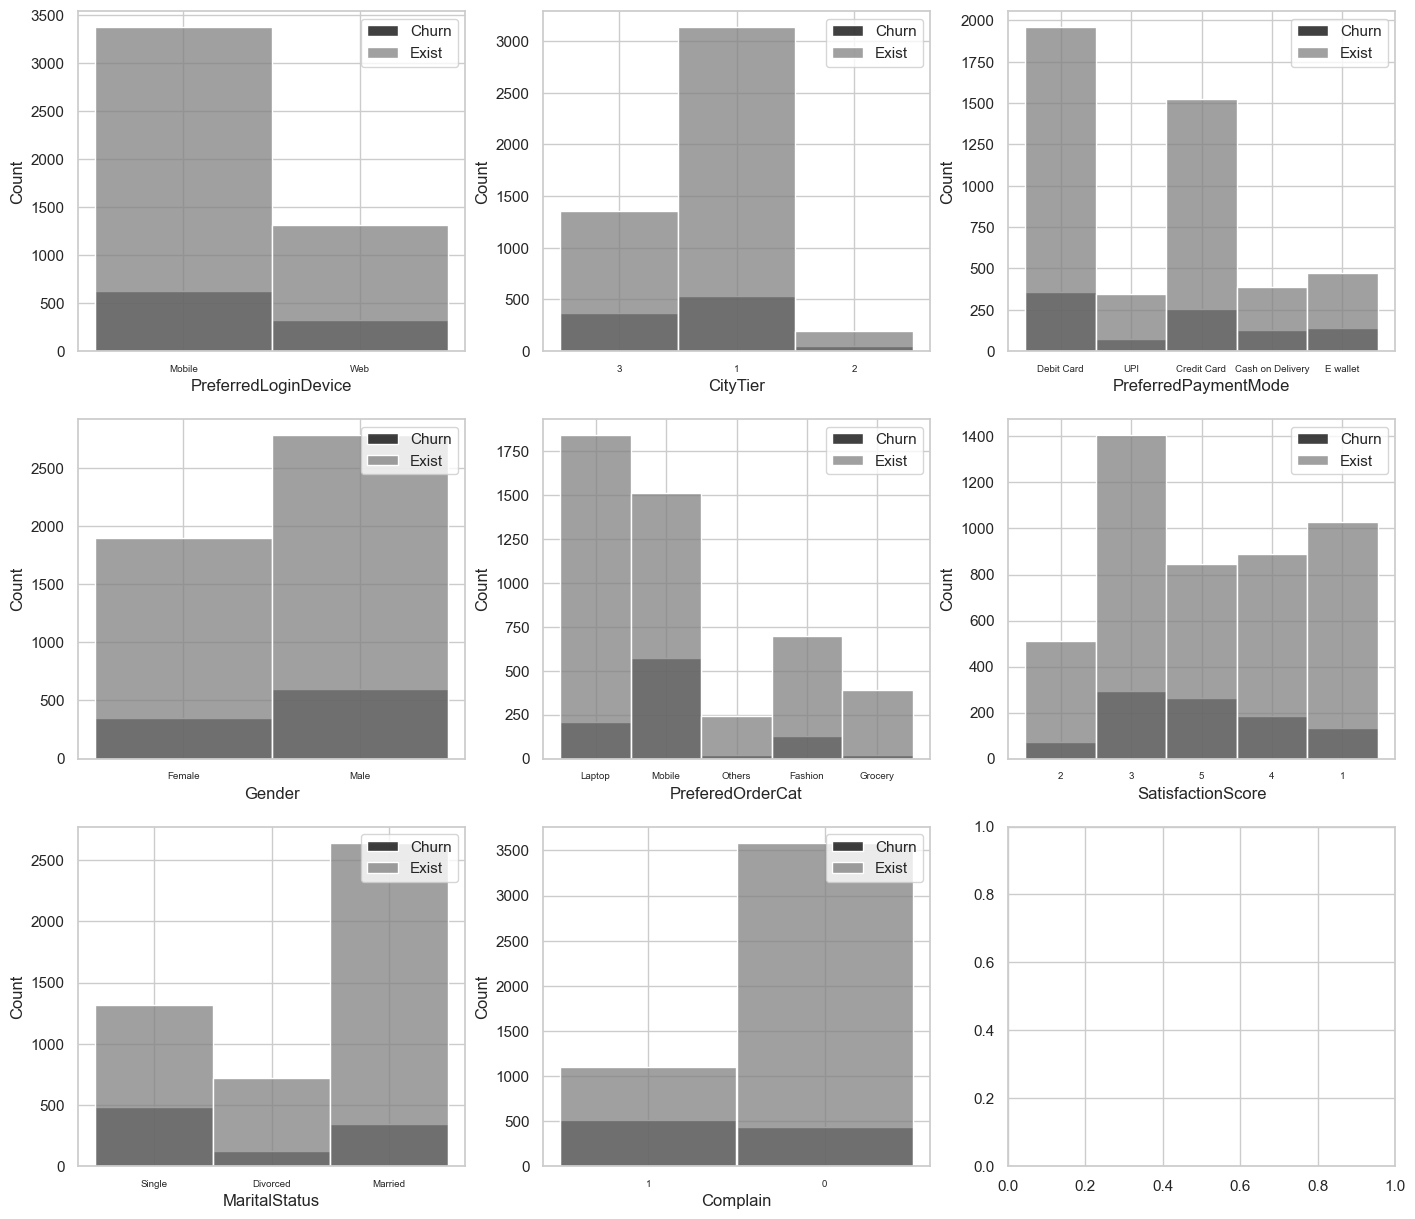

In [1327]:
fig, ax = plt.subplots(3, 3, figsize=(17, 15))

for i, c in enumerate(ob_cols):
    sns.histplot(churn_custom[c], label='Churn', ax=ax[i // 3, i % 3], color='black')
    sns.histplot(exist_custom[c], label='Exist', ax=ax[i // 3, i % 3], color='grey')

    ax[i // 3, i % 3].legend(loc='upper right')
    ax[i // 3, i % 3].set_xticks(ax[i // 3, i % 3].get_xticks())  # x-축 눈금 설정
    ax[i // 3, i % 3].set_xticklabels(ax[i // 3, i % 3].get_xticklabels(), size=7) 

plt.show()

In [247]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

### 3-1.1.성별에 따른 이탈 

In [1261]:
# 성별 value 확인 
print(df['Gender'].value_counts())

# 성별에 따른 주문 건수 확인 
print(df.groupby('Gender')['OrderCount'].sum())

# 성별에 따른 주문 건수 비율 확인 
print(df.groupby('Gender')['OrderCount'].sum()/df['OrderCount'].sum())

# 성별에 따른 주문 건수 비율 확인 
print(df.groupby('Gender')['OrderAmountHikeFromlastYear'].sum()/df['OrderAmountHikeFromlastYear'].sum())

Gender
Male      3384
Female    2246
Name: count, dtype: int64
Gender
Female    6604.0
Male      9555.0
Name: OrderCount, dtype: float64
Gender
Female    0.408689
Male      0.591311
Name: OrderCount, dtype: float64
Gender
Female    0.402644
Male      0.597356
Name: OrderAmountHikeFromlastYear, dtype: float64


- 여성 고객 대비 남성 고객의 비율이 더 높은 편이다. 
- 남성 고객은 전체 주문 건수의 59% 점유, 여성 고객은 전체 주문 건수의 40% 점유 

In [1262]:
# 성별에 따른 이탈 확인 
pd.crosstab(df['Gender'],df['Churn'],margins=True).style.background_gradient(cmap='Pastel1')

Churn,0,1,All
Gender,,,
Female,1898,348,2246
Male,2784,600,3384
All,4682,948,5630


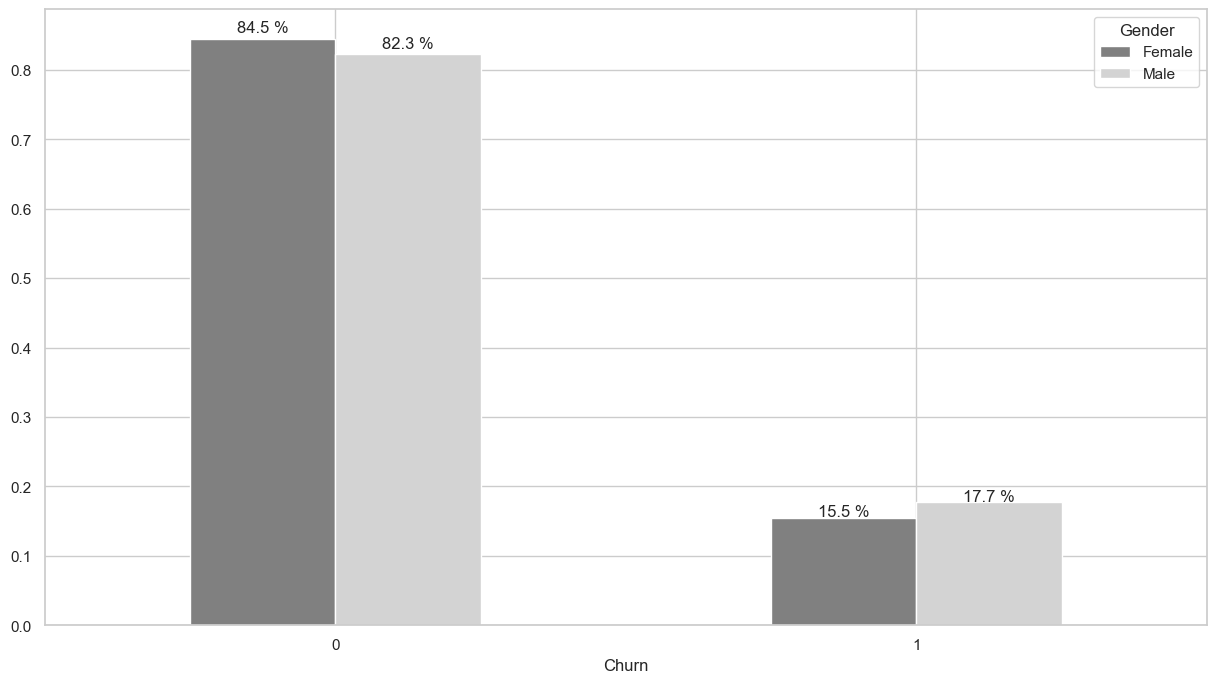

In [1263]:
# 성별에 따른 이탈율 시각화 

fig, ax = plt.subplots(figsize=(15, 8))

# crosstab을 사용하여 정규화된 교차표 생성 및 시각화
pd.crosstab(df['Gender'], df['Churn'], normalize='index').T.plot.bar(rot=0, color=['grey', 'lightgrey'], ax=ax)

# 퍼센트 값 표시
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f %%" % (height * 100), (left + width / 2, height * 1.01), ha='center')

plt.show()

- 남성 => 존재 고객 82.3% > 이탈 고객 17.7%
- 여성 => 존재 고객 84.5% > 이탈 고객 15.5%

성별에 따른 이탈의 분포의 차이는 없다.

### 3-1.2.로그인 디바이스에 따른 이탈 

In [1264]:
# 로그인 디바이스에 따른 점유 비율 확인 
df['PreferredLoginDevice'].value_counts(normalize=True)

PreferredLoginDevice
Mobile    0.709769
Web       0.290231
Name: proportion, dtype: float64

In [1265]:
# 로그인 디바이스에 따른 이탈 
pd.crosstab(df['PreferredLoginDevice'],df['Churn'],margins=True).style.background_gradient(cmap='Pastel1')

Churn,0,1,All
PreferredLoginDevice,,,
Mobile,3372,624,3996
Web,1310,324,1634
All,4682,948,5630


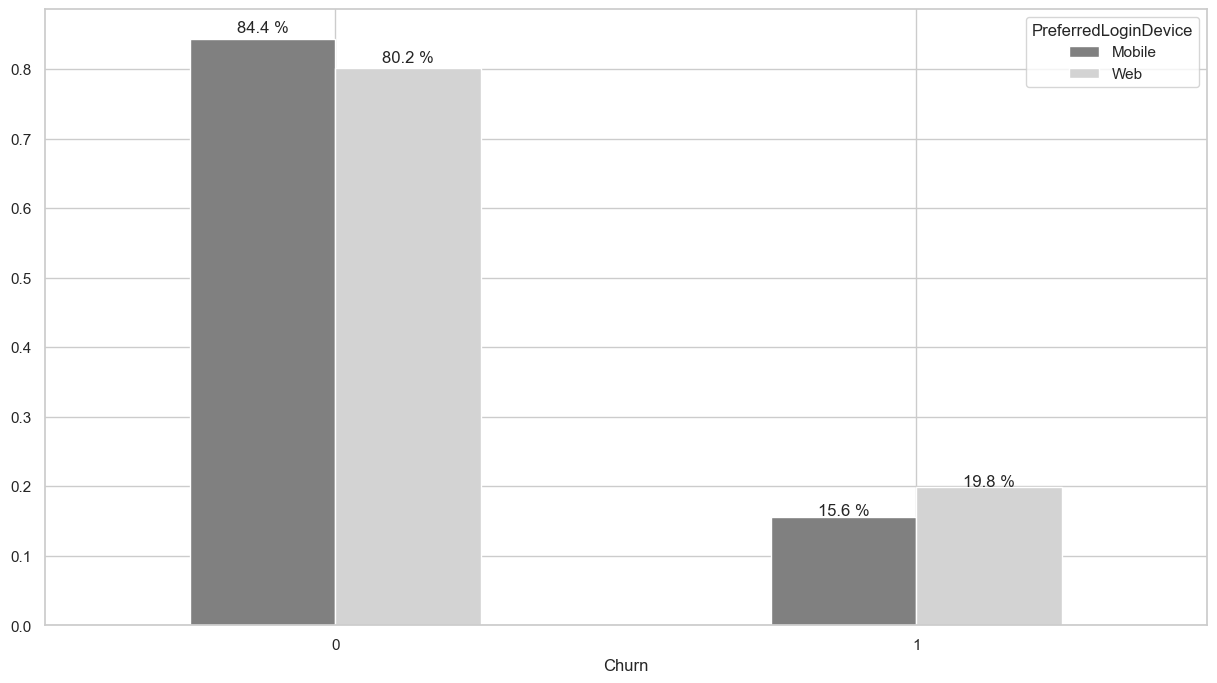

In [1266]:
fig, ax = plt.subplots(figsize=(15, 8))

# crosstab을 사용하여 정규화된 교차표 생성 및 시각화
pd.crosstab(df['PreferredLoginDevice'], df['Churn'], normalize='index').T.plot.bar(rot=0, color=['grey', 'lightgrey'], ax=ax)

# 퍼센트 값 표시
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f %%" % (height * 100), (left + width / 2, height * 1.01), ha='center')

plt.show()

- 대부분의 고객들은 web 대비 Mobile로 로그인하는것을 더욱 선호한다.
- Mobile 대비 Web은 약 4% 정도 더 이탈율이 높다 .

### 3-1.3.선호하는 결제 방식에 따른 이탈 

In [1267]:
df['PreferredPaymentMode'].value_counts(normalize=True)

PreferredPaymentMode
Debit Card          0.411012
Credit Card         0.315098
E wallet            0.109059
Cash on Delivery    0.091297
UPI                 0.073535
Name: proportion, dtype: float64

- 고객들은  직불 카드>신용 카드 >전자 지갑 시스템 >배송 후 대금 지불 > 은행 간 계좌이체 순으로 결제방식을 선호한다. 


In [1304]:
# 결제 방식에 따른 이탈 확인 
pd.crosstab(df['PreferredPaymentMode'],df['Churn'],margins=True,normalize='index').style.background_gradient(cmap='Pastel1')

Churn,0,1
PreferredPaymentMode,,
Cash on Delivery,0.750973,0.249027
Credit Card,0.857948,0.142052
Debit Card,0.846154,0.153846
E wallet,0.771987,0.228013
UPI,0.826087,0.173913
All,0.831616,0.168384


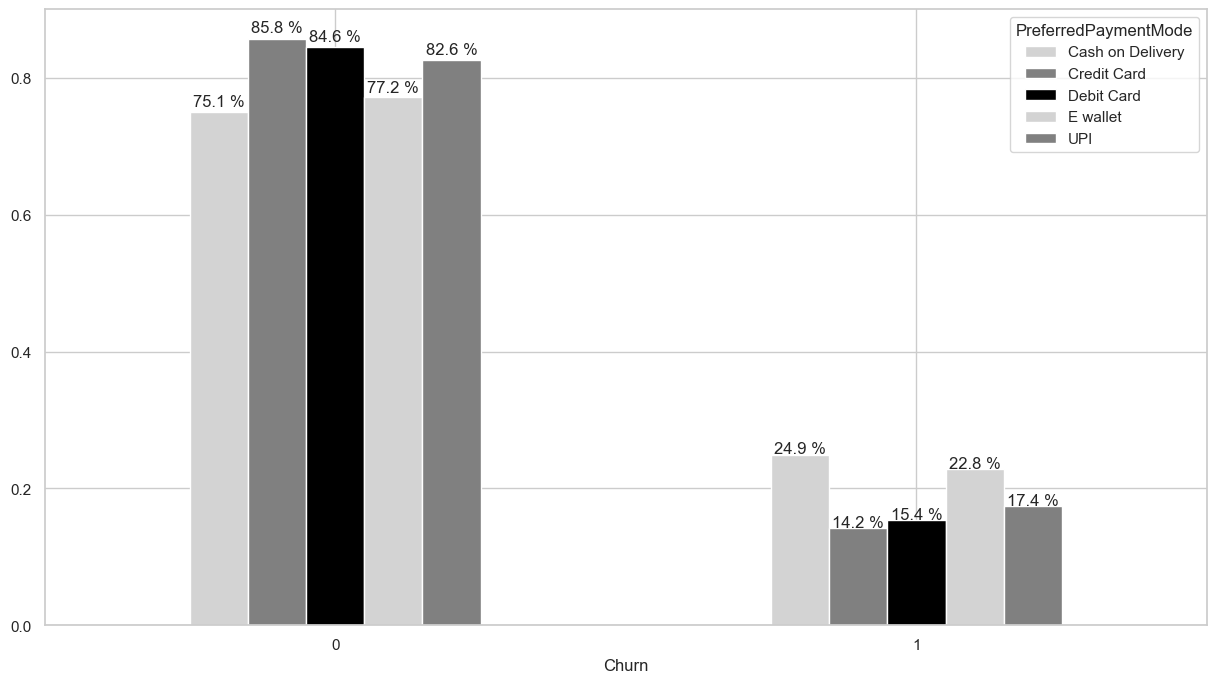

In [1305]:
fig, ax = plt.subplots(figsize=(15, 8))

# crosstab을 사용하여 정규화된 교차표 생성 및 시각화
pd.crosstab(df['PreferredPaymentMode'], df['Churn'], normalize='index').T.plot.bar(rot=0, color=['lightgrey','grey', 'black'], ax=ax)

# 퍼센트 값 표시
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f %%" % (height * 100), (left + width / 2, height * 1.01), ha='center')

plt.show()

- 이탈율이 가장 높은 결제 방식은 Cash on Delivery

In [1306]:
# 결제 방식 별 만족도 확인 
df.groupby(['PreferredPaymentMode'])['SatisfactionScore'].describe()

,count,unique,top,freq
PreferredPaymentMode,,,,
Cash on Delivery,514,5,3,166
Credit Card,1774,5,3,570
Debit Card,2314,5,3,720
E wallet,614,5,4,156
UPI,414,5,3,104


In [1307]:
# 결제 방법 별 선호하는 디바이스 별 만족도 
preprer_device=df.groupby(['PreferredPaymentMode','PreferredLoginDevice','SatisfactionScore'])['SatisfactionScore'].size().reset_index(name='cnt').sort_values(['PreferredPaymentMode','PreferredLoginDevice','cnt'],ascending=False)
preprer_device.groupby(['PreferredPaymentMode','PreferredLoginDevice']).head(1)

,PreferredPaymentMode,PreferredLoginDevice,SatisfactionScore,cnt
45,UPI,Web,1,34
42,UPI,Mobile,3,70
38,E wallet,Web,4,38
33,E wallet,Mobile,4,118
27,Debit Card,Web,3,242
22,Debit Card,Mobile,3,478
17,Credit Card,Web,3,176
12,Credit Card,Mobile,3,394
7,Cash on Delivery,Web,3,52
2,Cash on Delivery,Mobile,3,114


In [1308]:
device_method=df.groupby(['PreferredLoginDevice','PreferredPaymentMode','SatisfactionScore'])['SatisfactionScore'].size().reset_index(name='cnt').\
sort_values(by=['PreferredLoginDevice','PreferredPaymentMode','cnt'],ascending=False)
device_method.groupby(['PreferredLoginDevice','PreferredPaymentMode']).head(1)

,PreferredLoginDevice,PreferredPaymentMode,SatisfactionScore,cnt
45,Web,UPI,1,34
43,Web,E wallet,4,38
37,Web,Debit Card,3,242
32,Web,Credit Card,3,176
27,Web,Cash on Delivery,3,52
22,Mobile,UPI,3,70
18,Mobile,E wallet,4,118
12,Mobile,Debit Card,3,478
7,Mobile,Credit Card,3,394
2,Mobile,Cash on Delivery,3,114


In [1309]:
# 결제수단 별 선호하는 로그인 디바이스의 이탈율 
pd.crosstab(index=[df['PreferredPaymentMode'],df['PreferredLoginDevice']],columns=df['Churn'],margins=True,normalize='index')*100

Churn                                              0          1
PreferredPaymentMode PreferredLoginDevice                      
Cash on Delivery     Mobile                78.723404  21.276596
                     Web                   65.217391  34.782609
Credit Card          Mobile                85.326954  14.673046
                     Web                   86.923077  13.076923
Debit Card           Mobile                86.783042  13.216958
                     Web                   79.718310  20.281690
E wallet             Mobile                77.682403  22.317597
                     Web                   75.675676  24.324324
UPI                  Mobile                85.135135  14.864865
                     Web                   76.271186  23.728814
All                                        83.161634  16.838366

- 고객들은 주로 직불카드로 결제하는것을 가장 선호하며,mobile기기로 로그인 하는 것을 선호한다.
- 배송 후 대금 결제하는 방식의 이탈율은 24.9%로 가장 높다. 
- 다른 결제 방식은 평균적으로 3점의 비율이 가장 많으나,E- wallet은 4점의 비율이 가장 많다. 

### 3-1.4.컴플레인 유무에 따른 이탈 

In [1310]:
pd.crosstab(df['Complain'],df['Churn'],margins=True).style.background_gradient(cmap='Pastel1')

Churn,0,1,All
Complain,,,
0,3586,440,4026
1,1096,508,1604
All,4682,948,5630


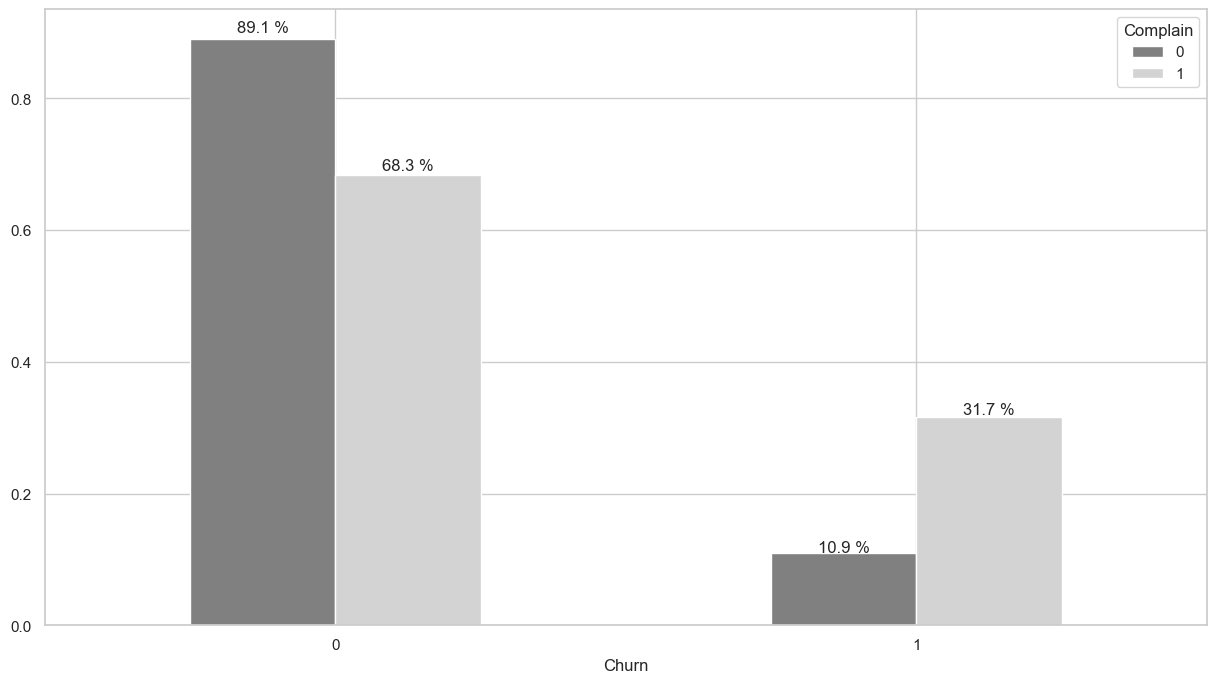

In [1311]:
fig, ax = plt.subplots(figsize=(15, 8))

# crosstab을 사용하여 정규화된 교차표 생성 및 시각화
pd.crosstab(df['Complain'], df['Churn'], normalize='index').T.plot.bar(rot=0, color=['grey', 'lightgrey'], ax=ax)

# 퍼센트 값 표시
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f %%" % (height * 100), (left + width / 2, height * 1.01), ha='center')

plt.show()

In [1276]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [1277]:
# 컴플레인 유무 별 이탈 별 마지막 주문 이후 경과 일수의 평균 
df.groupby(['Complain','Churn'])['DaySinceLastOrder'].mean()

Complain  Churn
0         0        4.815557
          1        3.218137
1         0        4.780676
          1        3.251029
Name: DaySinceLastOrder, dtype: float64

- 컴플레인이 있는 고객의 이탈율이 31% 더 높다 .
- 컴플레인이 있는 고객은 마지막 주문 이후 경과 일수가 비교적 더 길다 . 

### 3-1.5.선호하는 카테고리에 따른 이탈 

In [1280]:
pd.crosstab(df['PreferedOrderCat'],df['Churn'],margins=True).style.background_gradient(cmap='Pastel1')

Churn,0,1,All
PreferedOrderCat,,,
Fashion,698,128,826
Grocery,390,20,410
Laptop,1840,210,2050
Mobile,1510,570,2080
Others,244,20,264
All,4682,948,5630


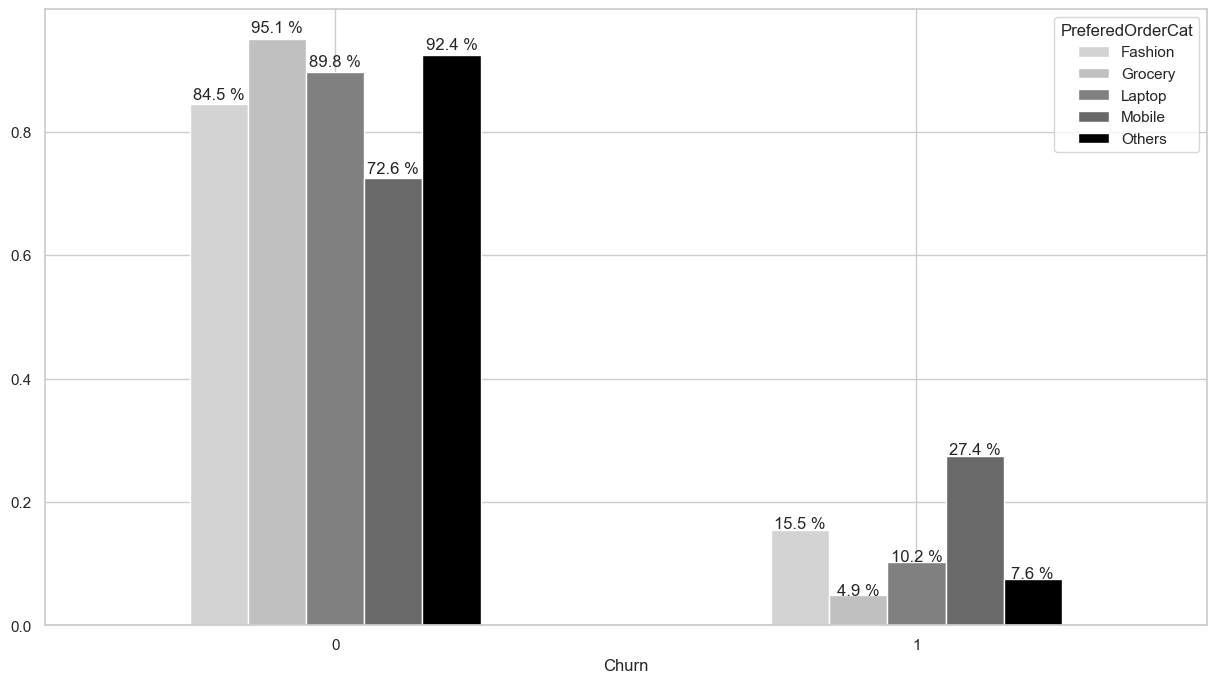

In [1281]:
fig, ax = plt.subplots(figsize=(15, 8))

# crosstab을 사용하여 정규화된 교차표 생성 및 시각화
pd.crosstab(df['PreferedOrderCat'], df['Churn'], normalize='index').T.plot.bar(rot=0, color=['lightgrey','silver', 'grey','dimgrey','black'], ax=ax)

# 퍼센트 값 표시
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f %%" % (height * 100), (left + width / 2, height * 1.01), ha='center')

plt.show()

In [1282]:
### Mobile 카테고리를 선호하는 이탈 고객과 존재고객의 차이 확인 

Text(0.5, 1.0, 'Exist customer (MaritalStatus)')

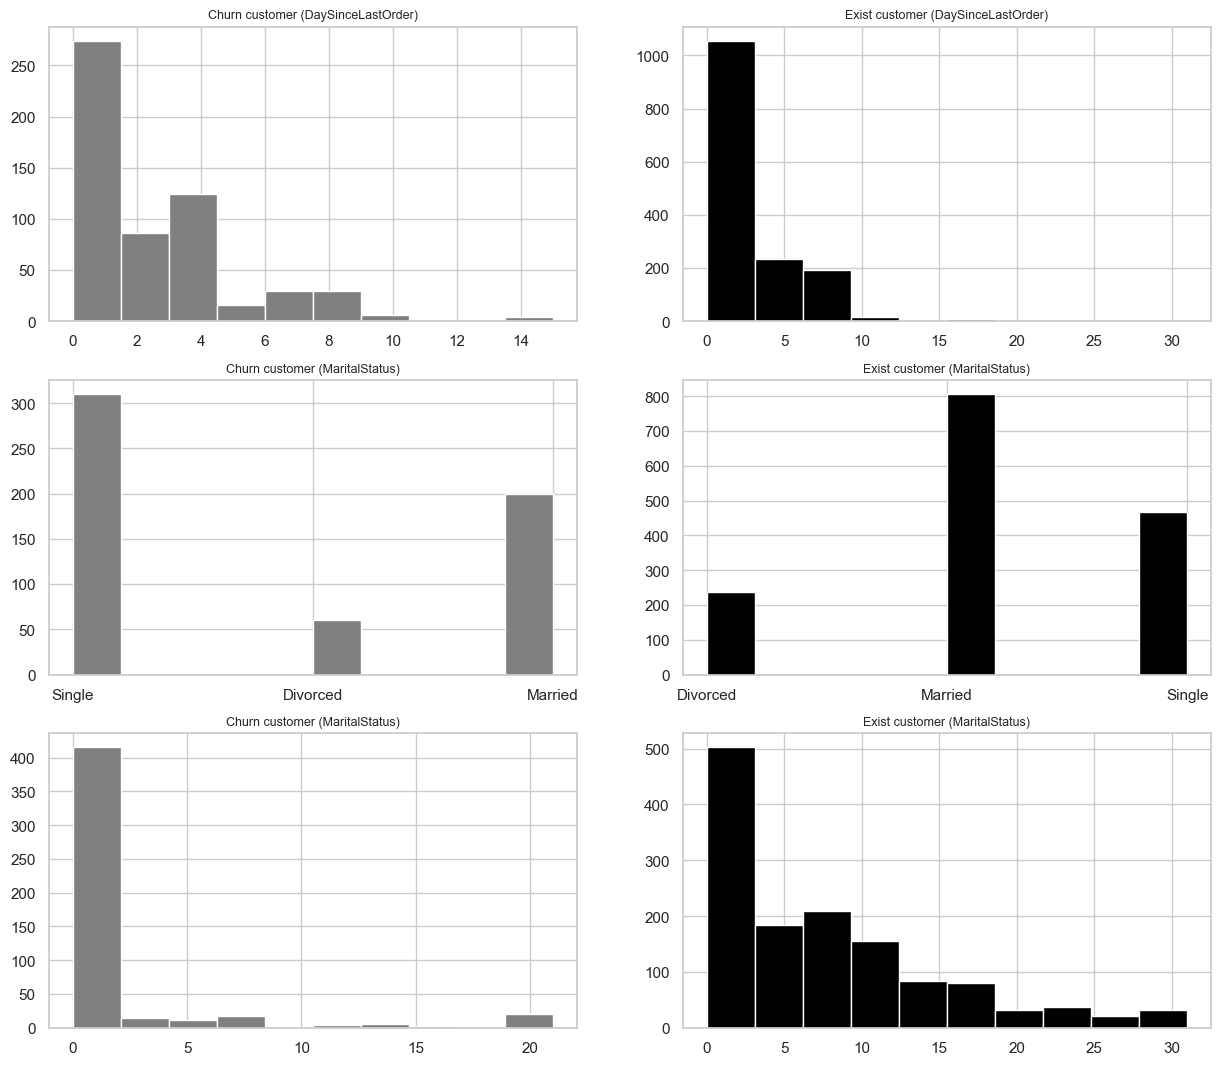

In [1283]:

fig,ax=plt.subplots(3,2,figsize=(15,13))
df[(df['PreferedOrderCat']=='Mobile')&(df['Churn']=='1')]['DaySinceLastOrder'].hist(ax=ax[0,0],color='grey')
ax[0,0].set_title('Churn customer (DaySinceLastOrder)',fontsize=9)
df[(df['PreferedOrderCat']=='Mobile')&(df['Churn']=='0')]['DaySinceLastOrder'].hist(ax=ax[0,1],color='black')
ax[0,1].set_title('Exist customer (DaySinceLastOrder)',fontsize=9)
df[(df['PreferedOrderCat']=='Mobile')&(df['Churn']=='1')]['MaritalStatus'].hist(ax=ax[1,0],color='grey')
ax[1,0].set_title('Churn customer (MaritalStatus)',fontsize=9)
df[(df['PreferedOrderCat']=='Mobile')&(df['Churn']=='0')]['MaritalStatus'].hist(ax=ax[1,1],color='black')
ax[1,1].set_title('Exist customer (MaritalStatus)',fontsize=9)
df[(df['PreferedOrderCat']=='Mobile')&(df['Churn']=='1')]['Tenure'].hist(ax=ax[2,0],color='grey')
ax[2,0].set_title('Churn customer (MaritalStatus)',fontsize=9)
df[(df['PreferedOrderCat']=='Mobile')&(df['Churn']=='0')]['Tenure'].hist(ax=ax[2,1],color='black')
ax[2,1].set_title('Exist customer (MaritalStatus)',fontsize=9)




- 고객의 선호하는 카테고리 중 가장 인기 있는 카테고리는 Mobile 카테고리로, 약 37% 점유
- 이탈율이 가장 많은 카테고리는 Mobile (모바일 관련 상품) 카테고리 ,이탈율이 가장 적은 카테고리는 Grocery (식품) 카테고리
-  Mobile 카테고리는 고객들이 가장 선호하는 카테고리 인 동시에, 가장 이탈율이 높은 카테고리이다. 
- Mobile 카테고리를 선호하는 고객을 이탈 고객과 존재 고객 비교 시,
- => 이탈 고객의 서비스 사용기간은 비교적 더 짧고, 마지막 주문 이후 경과 일수가 더 짧으며, 싱글인 고객의 이탈이 보다 높다 . 

### 3-1.6.결혼상태에 따른 이탈

#### MaritalStatus

In [1284]:
pd.crosstab(df['MaritalStatus'],df['Churn'],margins=True).style.background_gradient(cmap='Pastel1')

Churn,0,1,All
MaritalStatus,,,
Divorced,724,124,848
Married,2642,344,2986
Single,1316,480,1796
All,4682,948,5630


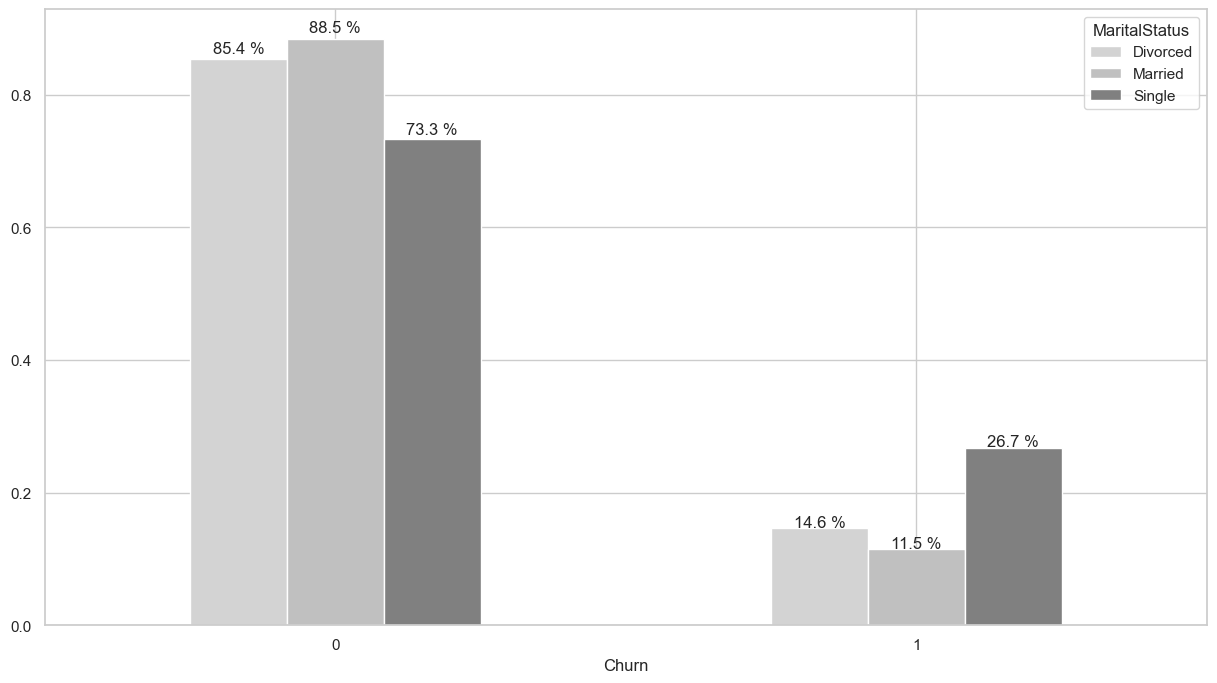

In [1285]:
fig, ax = plt.subplots(figsize=(15, 8))

# crosstab을 사용하여 정규화된 교차표 생성 및 시각화
pd.crosstab(df['MaritalStatus'], df['Churn'], normalize='index').T.plot.bar(rot=0, color=['lightgrey','silver', 'grey','dimgrey','black'], ax=ax)

# 퍼센트 값 표시
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f %%" % (height * 100), (left + width / 2, height * 1.01), ha='center')

plt.show()

In [1333]:
df.groupby(['MaritalStatus','PreferedOrderCat'])['PreferedOrderCat'].size().reset_index(name='cnt')

,MaritalStatus,PreferedOrderCat,cnt
0,Divorced,Fashion,126
1,Divorced,Grocery,82
2,Divorced,Laptop,296
3,Divorced,Mobile,296
4,Divorced,Others,48
5,Married,Fashion,466
6,Married,Grocery,224
7,Married,Laptop,1134
8,Married,Mobile,1006
9,Married,Others,156


### 3-1.7.도시등급에 따른 이탈 

In [1286]:
pd.crosstab(df['CityTier'],df['Churn'],margins=True)

Churn,0,1,All
CityTier,,,
1,3134,532,3666
2,194,48,242
3,1354,368,1722
All,4682,948,5630


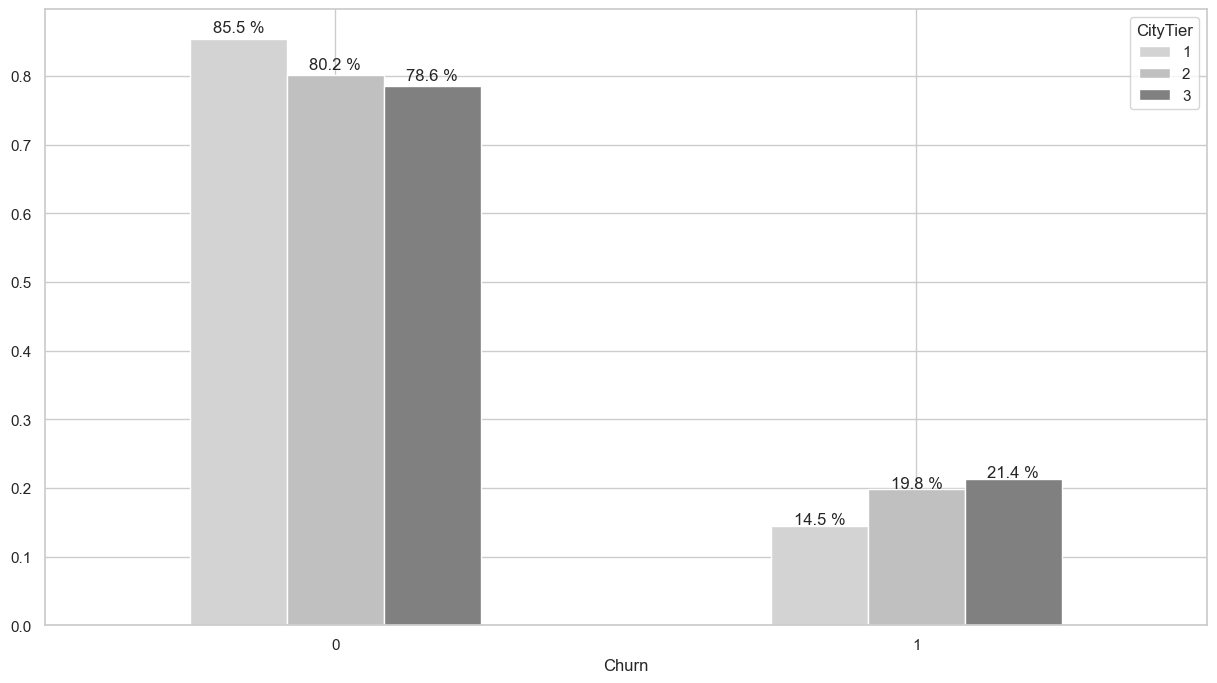

In [1287]:
fig, ax = plt.subplots(figsize=(15, 8))

# crosstab을 사용하여 정규화된 교차표 생성 및 시각화
pd.crosstab(df['CityTier'], df['Churn'], normalize='index').T.plot.bar(rot=0, color=['lightgrey','silver', 'grey','dimgrey','black'], ax=ax)

# 퍼센트 값 표시
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f %%" % (height * 100), (left + width / 2, height * 1.01), ha='center')

plt.show()

In [1288]:
# 도시 등급별 선호하는 카테고리 확인 
df.groupby(['CityTier','PreferedOrderCat'])['PreferedOrderCat'].size().reset_index(name='cnt')

,CityTier,PreferedOrderCat,cnt
0,1,Fashion,486
1,1,Grocery,266
2,1,Laptop,1074
3,1,Mobile,1652
4,1,Others,188
5,2,Fashion,24
6,2,Grocery,14
7,2,Laptop,48
8,2,Mobile,130
9,2,Others,26


In [1357]:
# 도시 등급별 선호하는 결제 방식 확인 
df.groupby(['CityTier','PreferredPaymentMode'])['PreferredPaymentMode'].size().reset_index(name='cnt')


,CityTier,PreferredPaymentMode,cnt
0,1,Cash on Delivery,366
1,1,Credit Card,1382
2,1,Debit Card,1676
3,1,UPI,242
4,2,Cash on Delivery,16
5,2,Credit Card,50
6,2,Debit Card,62
7,2,UPI,114
8,3,Cash on Delivery,132
9,3,Credit Card,342


In [1328]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [1332]:
# 도시 등급별 선호하는 카테고리 
df.groupby(['CityTier','PreferedOrderCat'])['PreferedOrderCat'].count().reset_index(name='cnt')

,CityTier,PreferedOrderCat,cnt
0,1,Fashion,486
1,1,Grocery,266
2,1,Laptop,1074
3,1,Mobile,1652
4,1,Others,188
5,2,Fashion,24
6,2,Grocery,14
7,2,Laptop,48
8,2,Mobile,130
9,2,Others,26


In [1290]:
# 도시 등급에 따른 주문 건수, 결제 금액 확인 
df.groupby('CityTier')[['OrderCount','OrderAmountHikeFromlastYear']].sum()

,OrderCount,OrderAmountHikeFromlastYear
CityTier,,
1,10298.0,54921.0
2,615.0,3322.0
3,5246.0,26030.0


- 도시등급 3은 이탈율이 가장 높은 지역으로, 이탈율은 약 21.4%
- 도시등급  1,2는 Mobile 카테고리를 가장 선호하며, 도시등급 3은 Laptop을 가장 선호한다. 
- 도시등급 1은 직불카드 결제 방식을 가장 선호한다. 
- 도시 등급 2는 은행 간 계좌이체 결제 방식을가장 선호한다. 
- 도시 등급 3은  전자 지갑 시스템 결제 방식을 가장 선호한다. 
- 도시등급에서 가장 많은 주문과 가장 많은 결제 금액이 발생한 도시 등급은 1등급이다.


### 3-1.8.만족도 점수에 따른 이탈 

In [1291]:
pd.crosstab(df['Churn'],df['SatisfactionScore'],margins=True,normalize='index')*100

SatisfactionScore,1,2,3,4,5
Churn,,,,,
0,21.999146,10.935498,30.029902,19.008971,18.026484
1,14.135021,7.805907,30.801688,19.409283,27.848101
All,20.674956,10.408526,30.159858,19.076377,19.680284


<Axes: xlabel='SatisfactionScore', ylabel='OrderCount'>

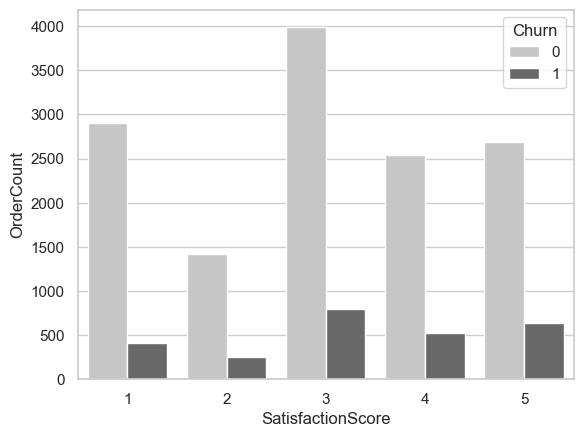

In [1292]:
# 만족도 점수에 따른 주문 건수 확인 
ordercount_by_satisfaction=df.groupby(['SatisfactionScore','Churn'])[['OrderCount']].sum().reset_index()
sns.barplot(x='SatisfactionScore',y='OrderCount',data=ordercount_by_satisfaction,hue='Churn',palette='Greys')

<Axes: xlabel='SatisfactionScore', ylabel='HourSpendOnApp'>

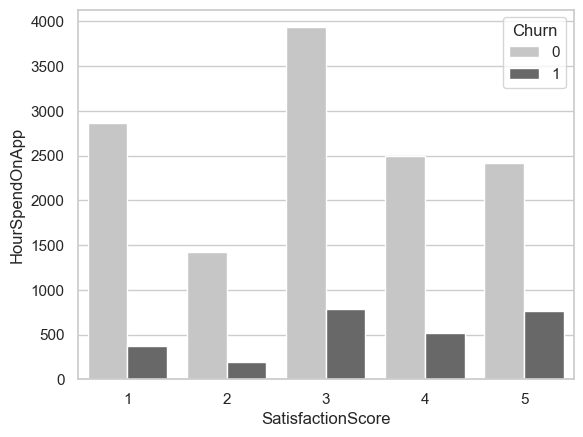

In [1293]:
# 만족도 점수에 따른 앱/웹 이용시간  확인 
ordercount_by_spendHour=df.groupby(['SatisfactionScore','Churn'])[['HourSpendOnApp']].sum().reset_index()
sns.barplot(x='SatisfactionScore',y='HourSpendOnApp',data=ordercount_by_spendHour,hue='Churn',palette='Greys')

- 만족도와 이탈간의 관계는 없으며, 앱/웹 사용시간 혹은 주문건수와도 관계가 없는것으로 확인된다. 

## 3-2.연속형 변수 EDA

In [1313]:
num_cols=num_cols[1:]

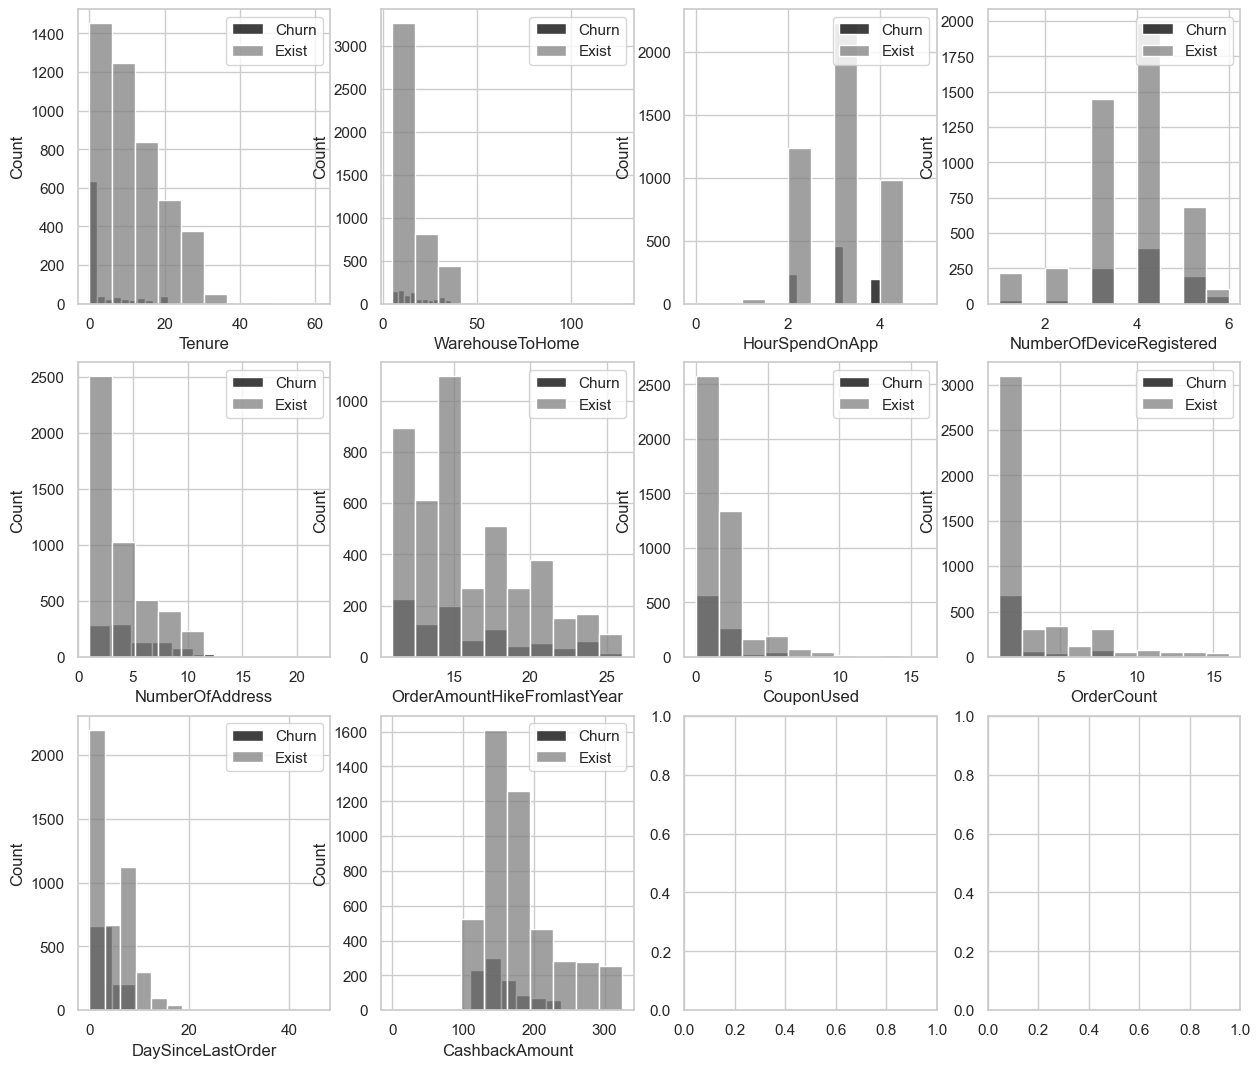

In [1314]:
# 수치형 변수 분포 확인 
fig, ax = plt.subplots(3, 4, figsize=(15, 13))

# Flatten the 3x4 array to a 1D array
ax = ax.flatten()

for i, c in enumerate(num_cols):
    sns.histplot(churn_custom[c], label='Churn', ax=ax[i], color='black', bins=10)
    sns.histplot(exist_custom[c], label='Exist', ax=ax[i], color='grey', bins=10)

    ax[i].legend(loc='upper right')

plt.show()

## 3-2.1 고객 사용기간에 따른 이탈 

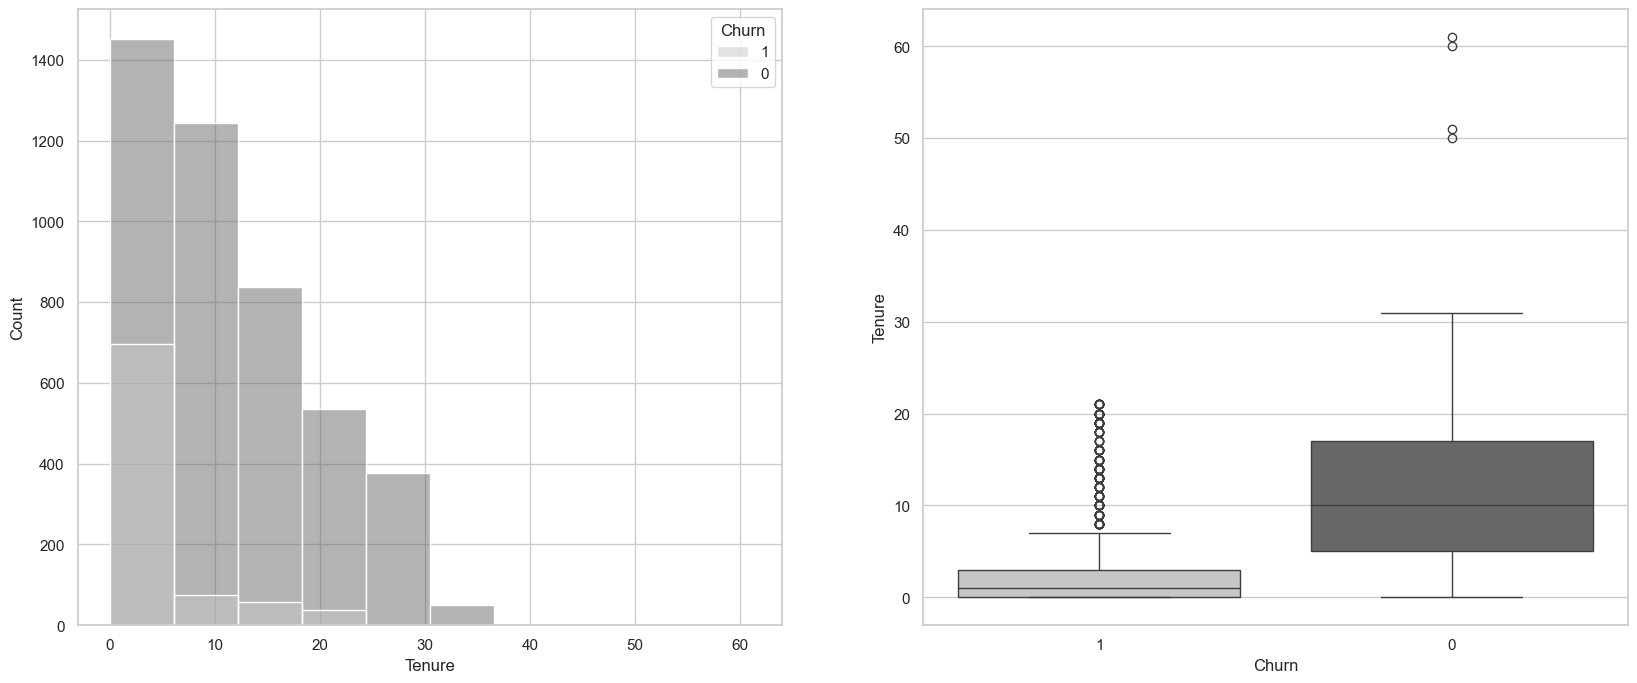

In [1295]:
fig,ax=plt.subplots(1,2,figsize=(20,8))

sns.histplot(x=df['Tenure'],ax=ax[0],hue=df['Churn'],bins=10,palette='Greys')
sns.boxplot(y=df['Tenure'],x=df['Churn'],ax=ax[1],palette='Greys')
plt.show()


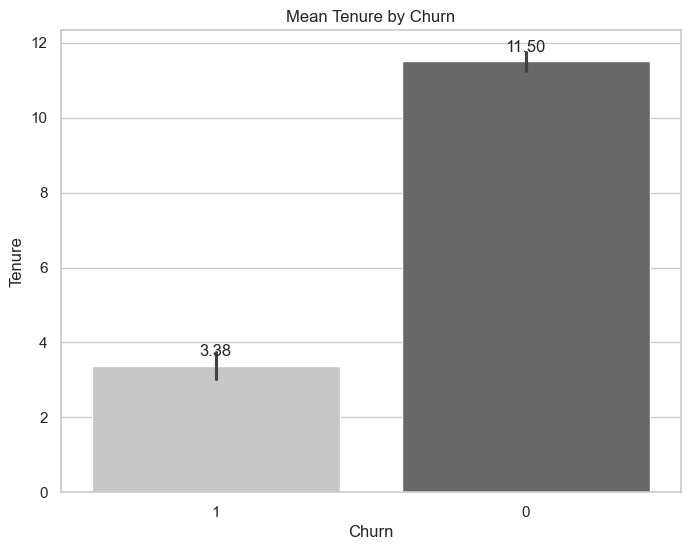

In [1296]:
# 이탈 여부에 따른 사용기간 
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.barplot(x='Churn', y='Tenure', data=df, palette='Greys')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Mean Tenure by Churn')
plt.show()

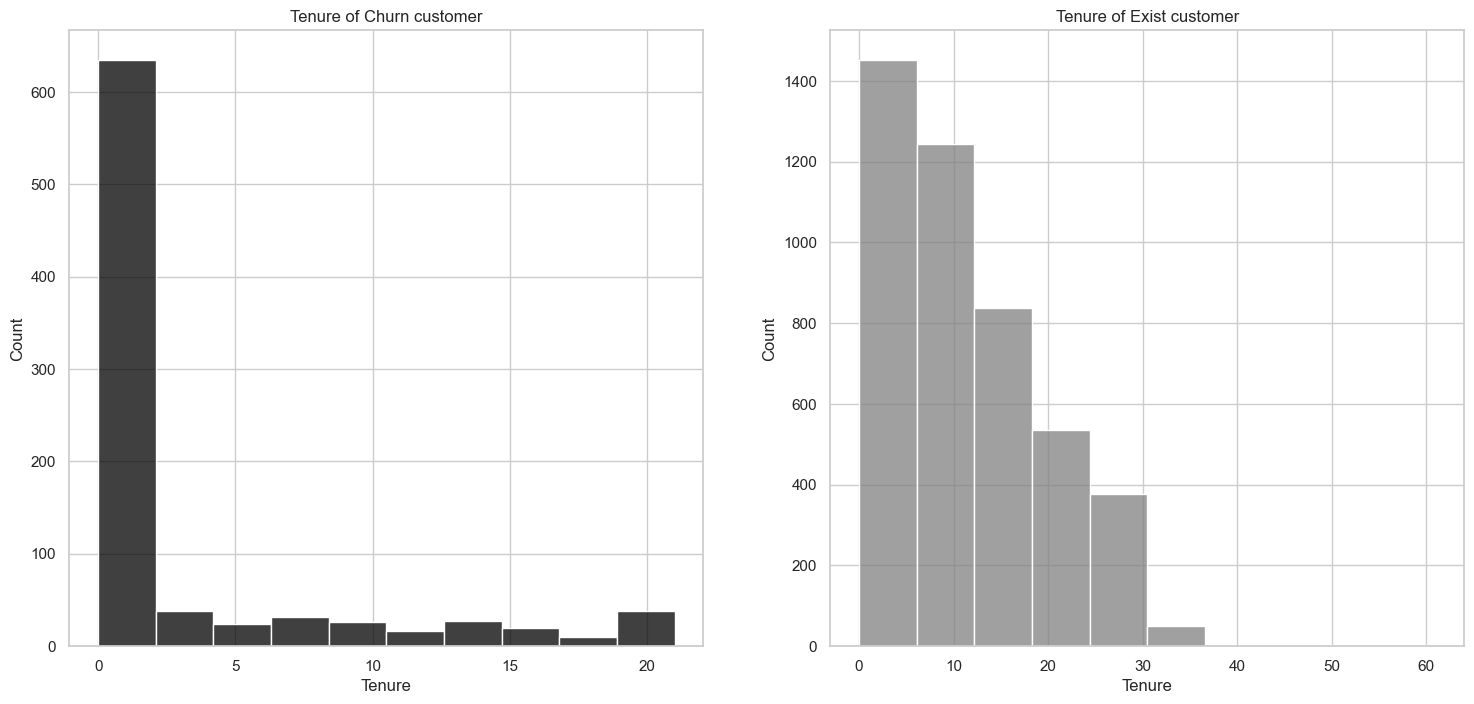

In [1297]:
# 이탈고객 vs 존재고객의 사용기간  분포 
fig,ax=plt.subplots(1,2,figsize=(18,8))
sns.histplot(x=churn_custom['Tenure'],bins=10,ax=ax[0],color='black')
ax[0].set_title('Tenure of Churn customer')
sns.histplot(x=exist_custom['Tenure'],bins=10,color='grey')
ax[1].set_title('Tenure of Exist customer')

plt.show()

In [1298]:
# 수치형 변수 바이닝을 위한 copy df 생성
df_ex=df.copy()

In [1299]:
# Tenure 변수 바이닝을 위해 pd.cut사용 
pd.cut(df_ex.loc[df_ex['Tenure'].notnull(),'Tenure'],6)

0       (-0.061, 10.167]
3       (-0.061, 10.167]
4       (-0.061, 10.167]
5       (-0.061, 10.167]
8       (10.167, 20.333]
              ...       
5625    (-0.061, 10.167]
5626    (10.167, 20.333]
5627    (-0.061, 10.167]
5628      (20.333, 30.5]
5629    (-0.061, 10.167]
Name: Tenure, Length: 5366, dtype: category
Categories (6, interval[float64, right]): [(-0.061, 10.167] < (10.167, 20.333] < (20.333, 30.5] < (30.5, 40.667] < (40.667, 50.833] < (50.833, 61.0]]

In [1300]:
df_ex['Tenure_cat'] = 0
df_ex.loc[df_ex['Tenure'] <= 10.167, 'Tenure_cat'] = 1
df_ex.loc[(df_ex['Tenure'] > 10.167) & (df_ex['Tenure'] <= 20.333), 'Tenure_cat'] = 2
df_ex.loc[(df_ex['Tenure'] > 20.333) & (df_ex['Tenure'] <= 30.5), 'Tenure_cat'] = 3
df_ex.loc[(df_ex['Tenure'] > 30.5) & (df_ex['Tenure'] <= 40.667), 'Tenure_cat'] = 4
df_ex.loc[(df_ex['Tenure'] > 40.667) & (df_ex['Tenure'] <= 50.833), 'Tenure_cat'] = 5
df_ex.loc[(df_ex['Tenure'] > 50.833) & (df_ex['Tenure'] <= 61.0), 'Tenure_cat'] = 6


In [1301]:
df_ex=df_ex[df_ex['Tenure_cat']!=0]

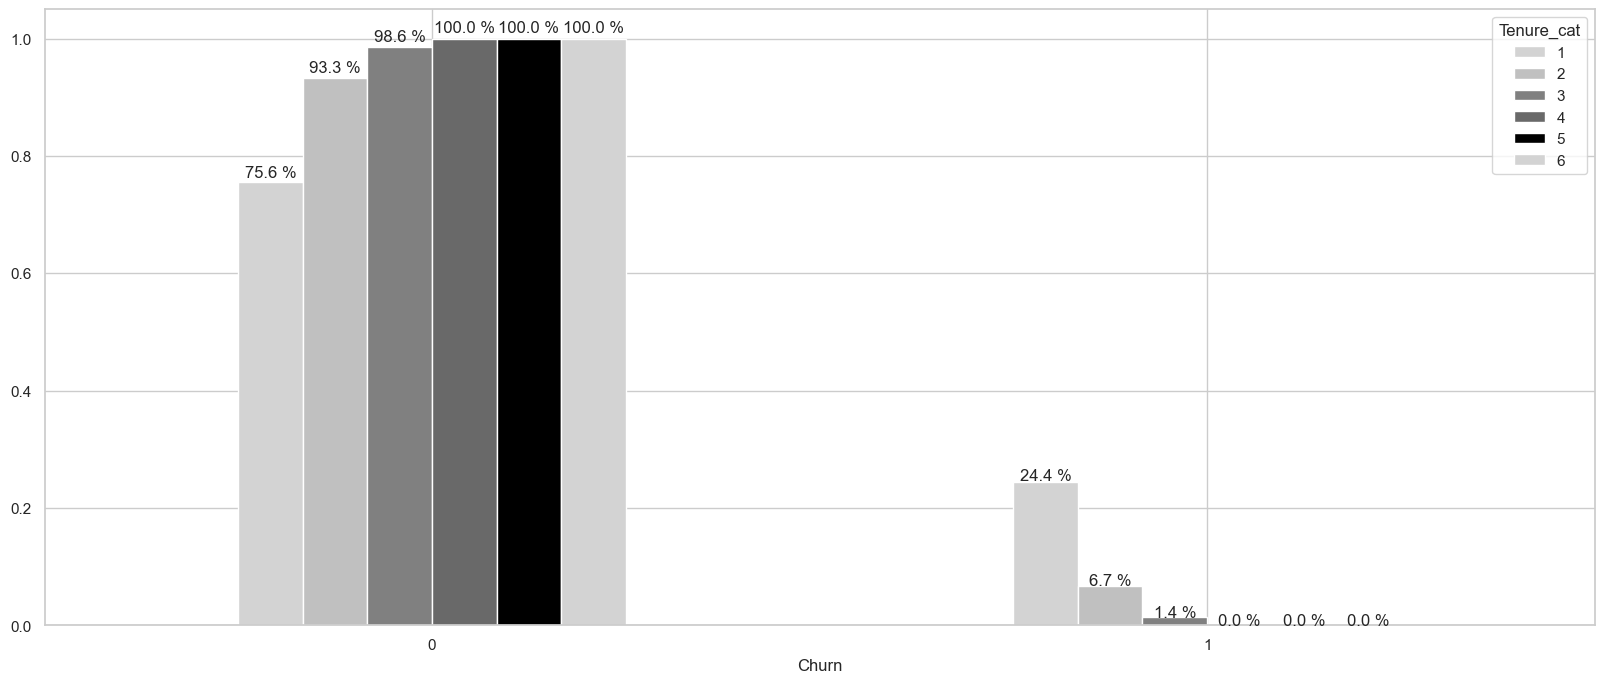

In [1302]:
fig, ax = plt.subplots(figsize=(20, 8))

# crosstab을 사용하여 정규화된 교차표 생성 및 시각화
pd.crosstab(df_ex['Tenure_cat'], df_ex['Churn'], normalize='index').T.plot.bar(rot=0, color=['lightgrey','silver', 'grey','dimgrey','black'], ax=ax)

# 퍼센트 값 표시
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f %%" % (height * 100), (left + width / 2, height * 1.01), ha='center')

plt.show()

<Axes: xlabel='Tenure', ylabel='Churn'>

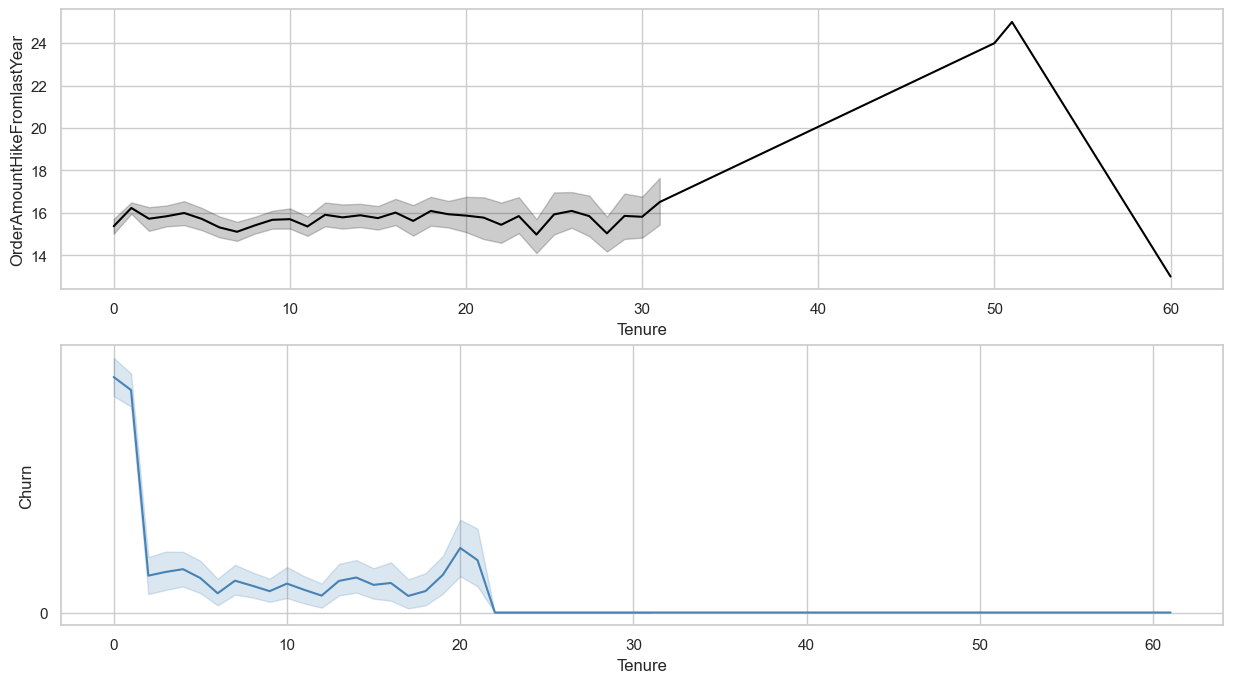

In [1303]:
fig,ax=plt.subplots(2,1,figsize=(15,8))
# 사용기간에 따른 총 주문금액 
sns.lineplot(x='Tenure',y='OrderAmountHikeFromlastYear',data=df,ax=ax[0],color='black')

# 사용기간에 따른 총 이탈  
sns.lineplot(x='Tenure',y='Churn',data=df,ax=ax[1],color='steelblue')

- 사용기간이 짧을수록 이탈율이 높다. => 사용 기간이 10일 이내인 고객의 이탈율이 24.4%로 가장 높다.
- 사용 기간이 30일이 넘어가는 고객부터는 이탈율이 없는 충성적인 고객으로 변환되는 것을 알 수 있다. 
- 사용기간이 길어질수록 총주문금액은 증가하는 추세를 확인할 수 있다. 

## 3-2.2.고객 집에서 창고까지 거리에 따른 이탈 

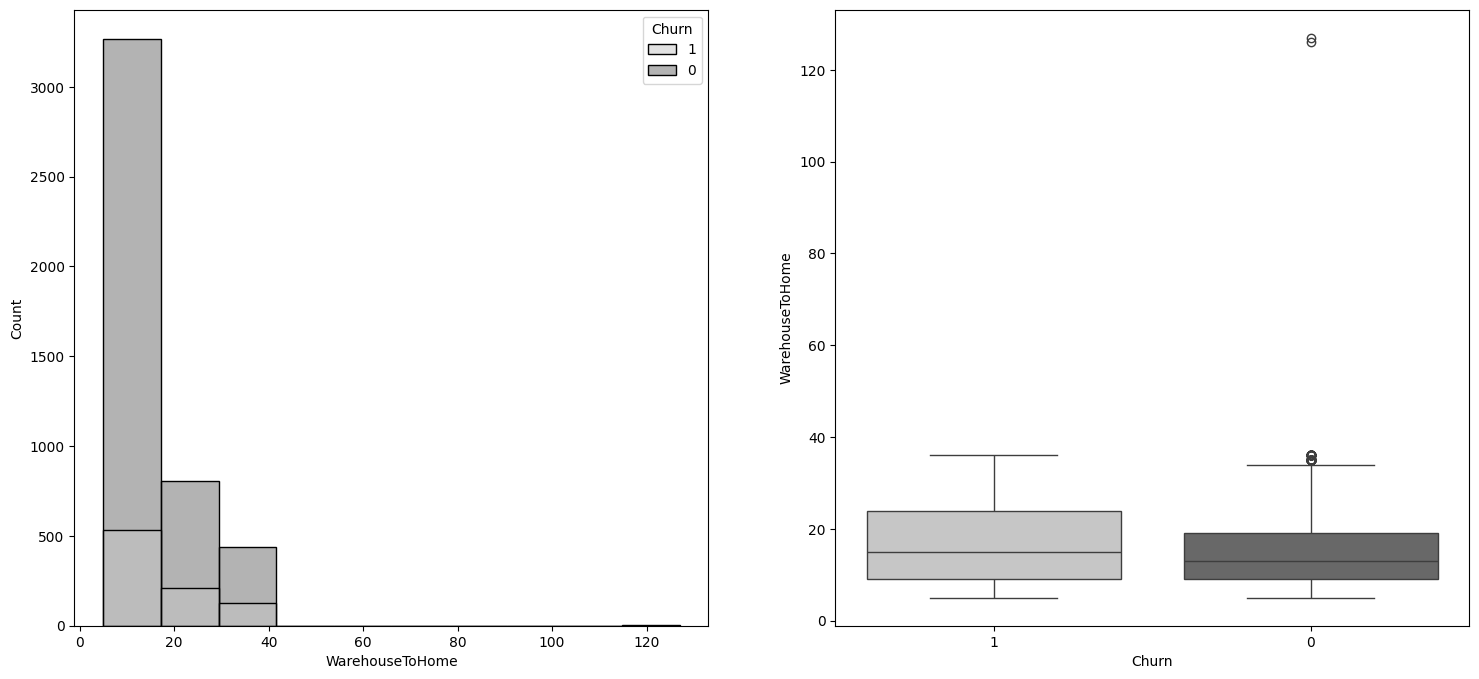

In [965]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
sns.histplot(x=df['WarehouseToHome'],palette='Greys',hue=df['Churn'],ax=ax[0],bins=10)
sns.boxplot(x=df['Churn'], y=df['WarehouseToHome'], palette='Greys', orient='v',hue=df['Churn'])
plt.show()


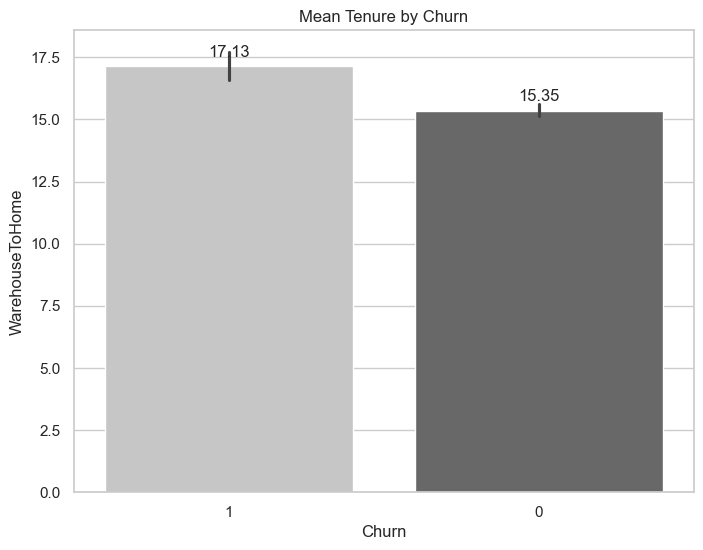

In [1197]:
# 창고에서 고객집까지의 거리에  따른 사용기간 
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.barplot(x='Churn', y='WarehouseToHome', data=df, palette='Greys')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Mean Tenure by Churn')
plt.show()

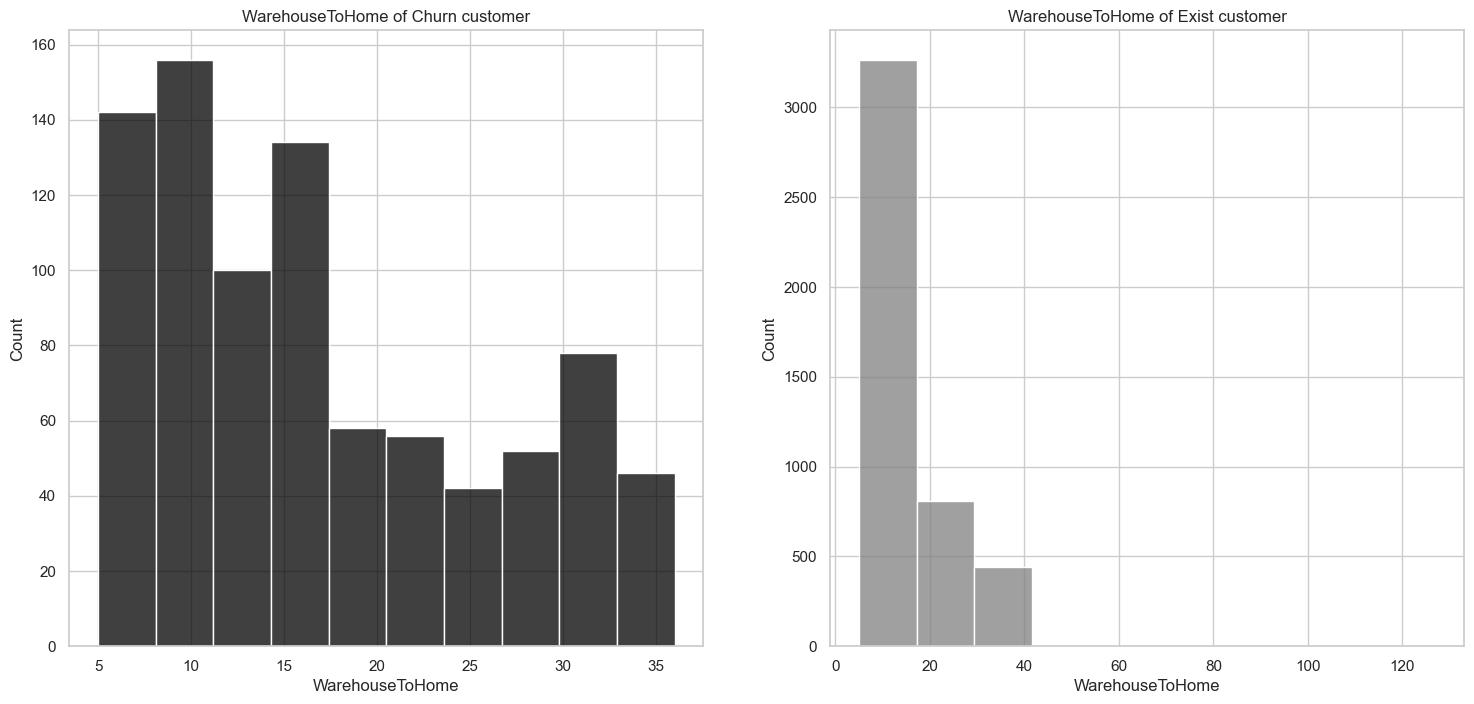

In [1244]:
# 이탈고객 vs 존재고객의 창고에서 집까지의 거리  분포 
fig,ax=plt.subplots(1,2,figsize=(18,8))
sns.histplot(x=churn_custom['WarehouseToHome'],bins=10,ax=ax[0],color='black')
ax[0].set_title('WarehouseToHome of Churn customer')
sns.histplot(x=exist_custom['WarehouseToHome'],bins=10,color='grey')
ax[1].set_title('WarehouseToHome of Exist customer')

plt.show()

In [966]:
pd.cut(df_ex.loc[df_ex['WarehouseToHome'].notnull(),'WarehouseToHome'],6)

0        (4.878, 25.333]
3        (4.878, 25.333]
4        (4.878, 25.333]
5        (4.878, 25.333]
8        (4.878, 25.333]
              ...       
5625    (25.333, 45.667]
5626     (4.878, 25.333]
5627     (4.878, 25.333]
5628     (4.878, 25.333]
5629     (4.878, 25.333]
Name: WarehouseToHome, Length: 5115, dtype: category
Categories (6, interval[float64, right]): [(4.878, 25.333] < (25.333, 45.667] < (45.667, 66.0] < (66.0, 86.333] < (86.333, 106.667] < (106.667, 127.0]]

In [971]:
df_ex['WarehouseToHome_cat'].value_counts()

WarehouseToHome_cat
1    4268
2     845
6       2
Name: count, dtype: int64

In [967]:
df_ex['WarehouseToHome_cat'] = 0
df_ex.loc[df_ex['WarehouseToHome'] <= 25.333, 'WarehouseToHome_cat'] = 1
df_ex.loc[(df_ex['WarehouseToHome'] > 25.333) & (df_ex['WarehouseToHome'] <= 45.667), 'WarehouseToHome_cat'] = 2
df_ex.loc[(df_ex['WarehouseToHome'] > 45.667) & (df_ex['WarehouseToHome'] <= 66.0), 'WarehouseToHome_cat'] = 3
df_ex.loc[(df_ex['WarehouseToHome'] > 66.0) & (df_ex['WarehouseToHome'] <= 86.333), 'WarehouseToHome_cat'] = 4
df_ex.loc[(df_ex['WarehouseToHome'] > 86.333) & (df_ex['WarehouseToHome'] <= 106.667), 'WarehouseToHome_cat'] = 5
df_ex.loc[(df_ex['WarehouseToHome'] > 106.667) & (df_ex['WarehouseToHome'] <= 127.0), 'WarehouseToHome_cat'] = 6


In [968]:
df_ex=df_ex[df_ex['WarehouseToHome_cat']!=0]

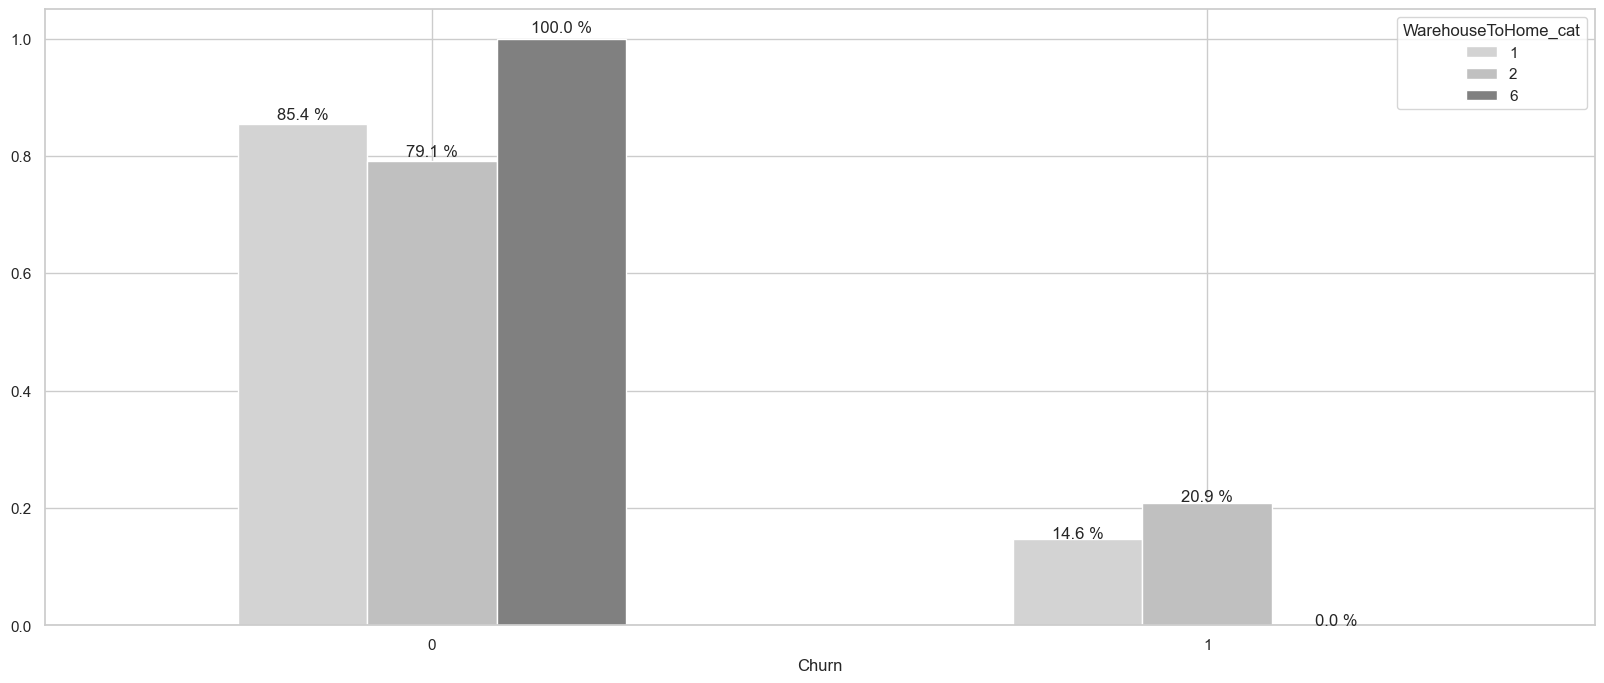

In [1201]:
fig, ax = plt.subplots(figsize=(20, 8))

# crosstab을 사용하여 정규화된 교차표 생성 및 시각화
pd.crosstab(df_ex['WarehouseToHome_cat'], df_ex['Churn'], normalize='index').T.plot.bar(rot=0, color=['lightgrey','silver', 'grey','dimgrey','black'], ax=ax)

# 퍼센트 값 표시
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f %%" % (height * 100), (left + width / 2, height * 1.01), ha='center')

plt.show()

- 고객의 집에서 창고까지의 거리의 분포는 매우 불균형하며, 대부분 25km 이내에 있다.
- 이탈과는 관계가 없다.

## 3-2.3. 디바이스 사용 기간에 따른 이탈 

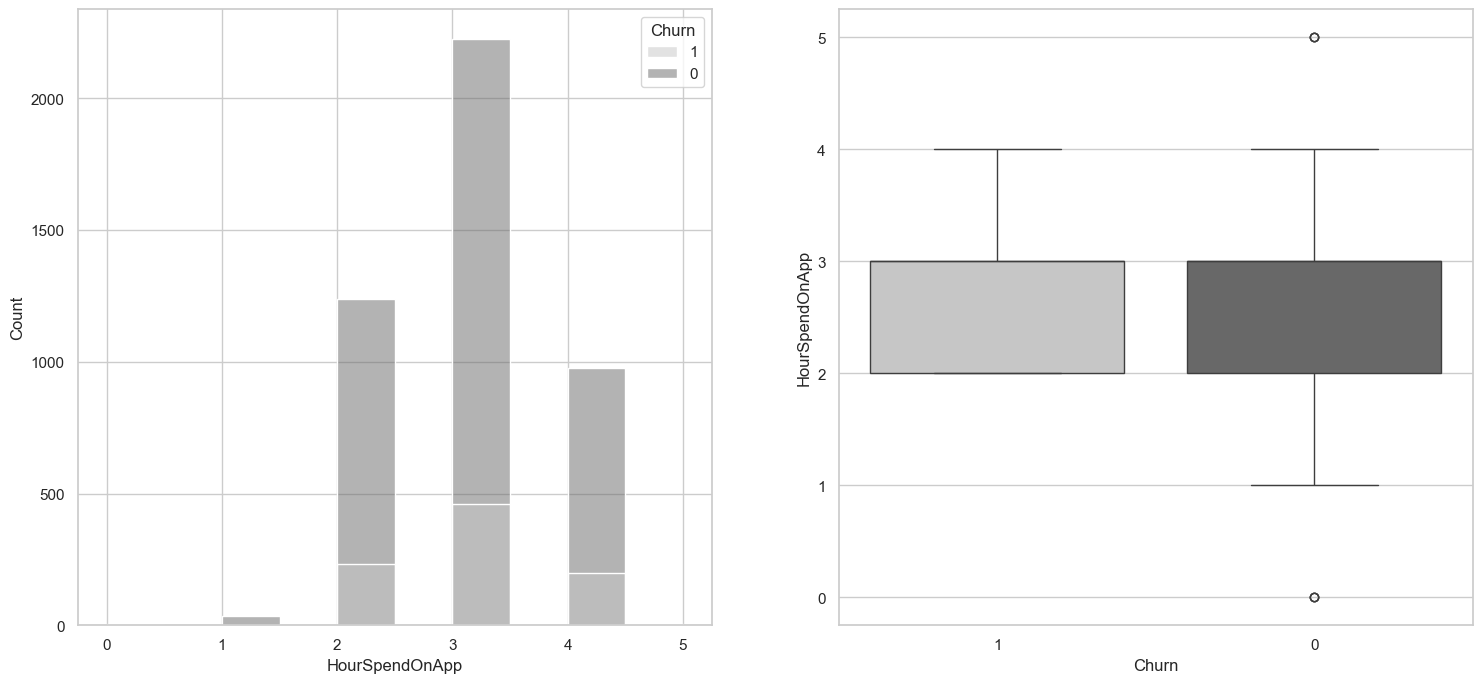

In [1202]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
sns.histplot(x=df['HourSpendOnApp'],palette='Greys',hue=df['Churn'],ax=ax[0],bins=10)
sns.boxplot(x=df['Churn'], y=df['HourSpendOnApp'], palette='Greys', orient='v',hue=df['Churn'])
plt.show()


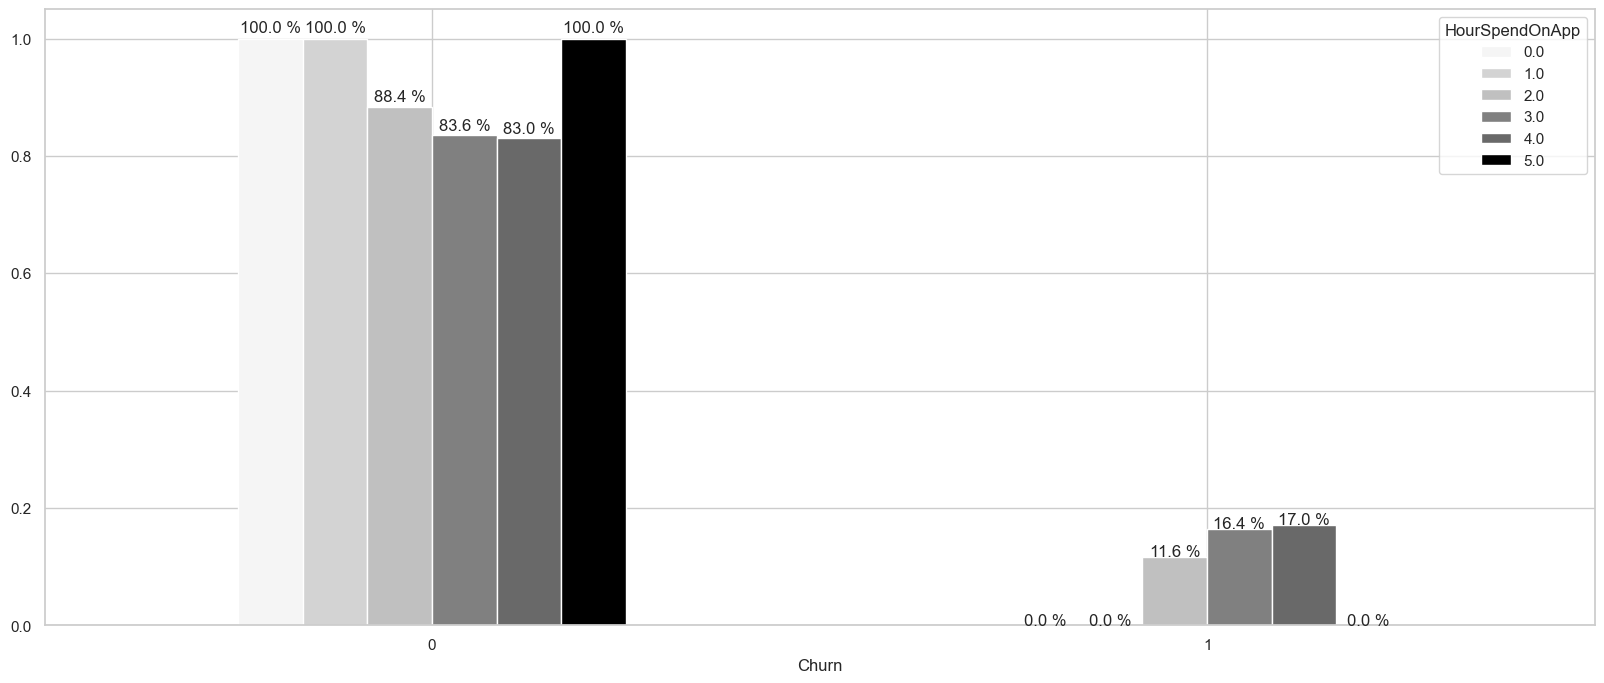

In [1203]:
fig, ax = plt.subplots(figsize=(20, 8))

# crosstab을 사용하여 정규화된 교차표 생성 및 시각화
pd.crosstab(df_ex['HourSpendOnApp'], df_ex['Churn'], normalize='index').T.plot.bar(rot=0, color=['whitesmoke','lightgrey','silver', 'grey','dimgrey','black'], ax=ax)

# 퍼센트 값 표시
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f %%" % (height * 100), (left + width / 2, height * 1.01), ha='center')

plt.show()

In [991]:
df.groupby(['PreferredLoginDevice'])['HourSpendOnApp'].value_counts(normalize=True)

PreferredLoginDevice  HourSpendOnApp
Mobile                3.0               0.502096
                      2.0               0.270964
                      4.0               0.220912
                      1.0               0.004979
                      5.0               0.000786
                      0.0               0.000262
Web                   3.0               0.494548
                      2.0               0.280308
                      4.0               0.213598
                      1.0               0.010263
                      0.0               0.001283
Name: proportion, dtype: float64

- 대부분의 고객은 3-4시간 앱/웹 디바이스를 사용하는 것을 알 수 있다. 

## 3-2.4.쿠폰 사용 갯수에 따른 이탈 

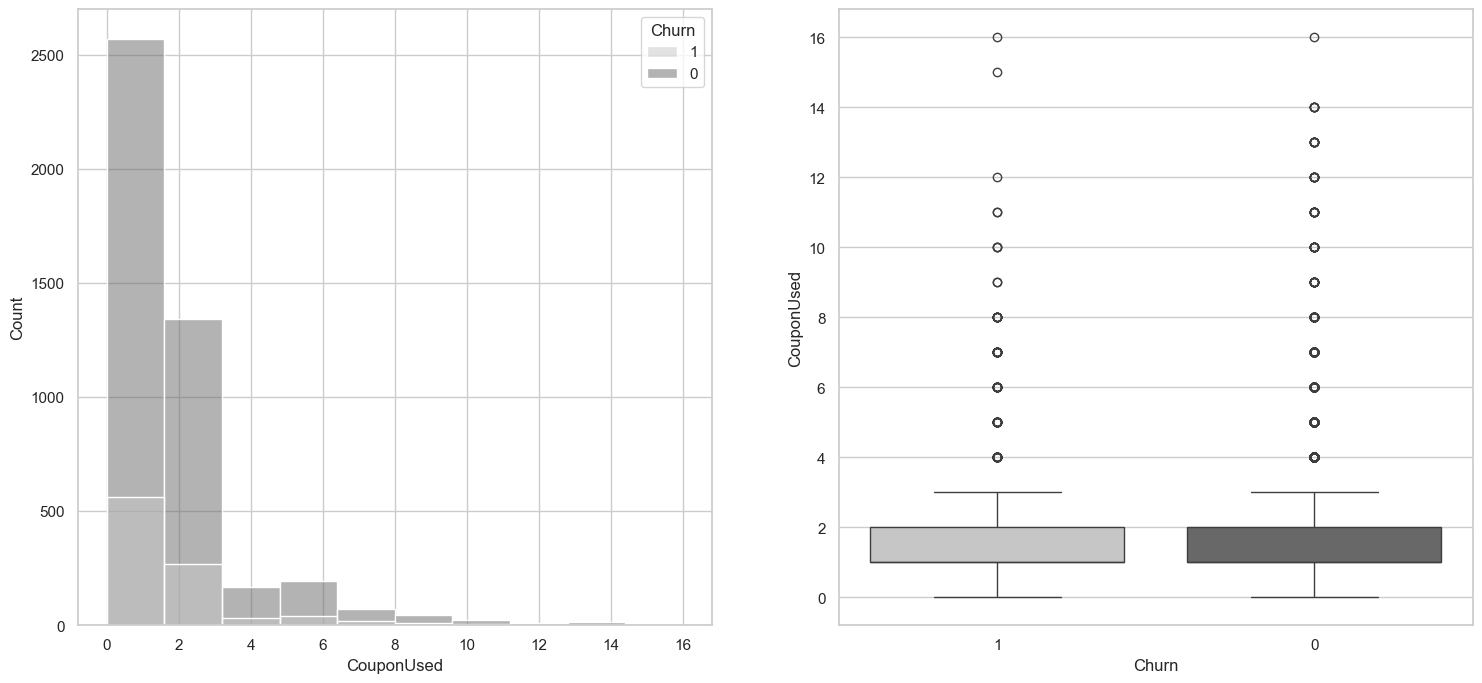

In [1199]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
sns.histplot(x=df['CouponUsed'],palette='Greys',hue=df['Churn'],ax=ax[0],bins=10)
sns.boxplot(x=df['Churn'], y=df['CouponUsed'], palette='Greys', orient='v',hue=df['Churn'])
plt.show()


In [1205]:
pd.cut(df_ex.loc[df_ex['CouponUsed'].notnull(),'CouponUsed'],6)

0       (-0.016, 2.667]
3       (-0.016, 2.667]
4       (-0.016, 2.667]
5        (2.667, 5.333]
8       (-0.016, 2.667]
             ...       
5624    (-0.016, 2.667]
5625    (-0.016, 2.667]
5627    (-0.016, 2.667]
5628    (-0.016, 2.667]
5629    (-0.016, 2.667]
Name: CouponUsed, Length: 4291, dtype: category
Categories (6, interval[float64, right]): [(-0.016, 2.667] < (2.667, 5.333] < (5.333, 8.0] < (8.0, 10.667] < (10.667, 13.333] < (13.333, 16.0]]

In [1206]:
df_ex['CouponUsed_cat']=0
df_ex.loc[df_ex['CouponUsed_cat']<=2.667,'CouponUsed_cat']=1
df_ex.loc[(df_ex['CouponUsed']>2.667)&(df_ex['CouponUsed']<=5.333),'CouponUsed_cat']=2
df_ex.loc[(df_ex['CouponUsed']>5.333)&(df_ex['CouponUsed']<=8.0),'CouponUsed_cat']=3
df_ex.loc[(df_ex['CouponUsed']>8.0)&(df_ex['CouponUsed']<=10.667),'CouponUsed_cat']=4
df_ex.loc[(df_ex['CouponUsed']>10.667)&(df_ex['CouponUsed']<=13.333),'CouponUsed_cat']=5
df_ex.loc[(df_ex['CouponUsed']>13.333)&(df_ex['CouponUsed']<=16.0),'CouponUsed_cat']=6

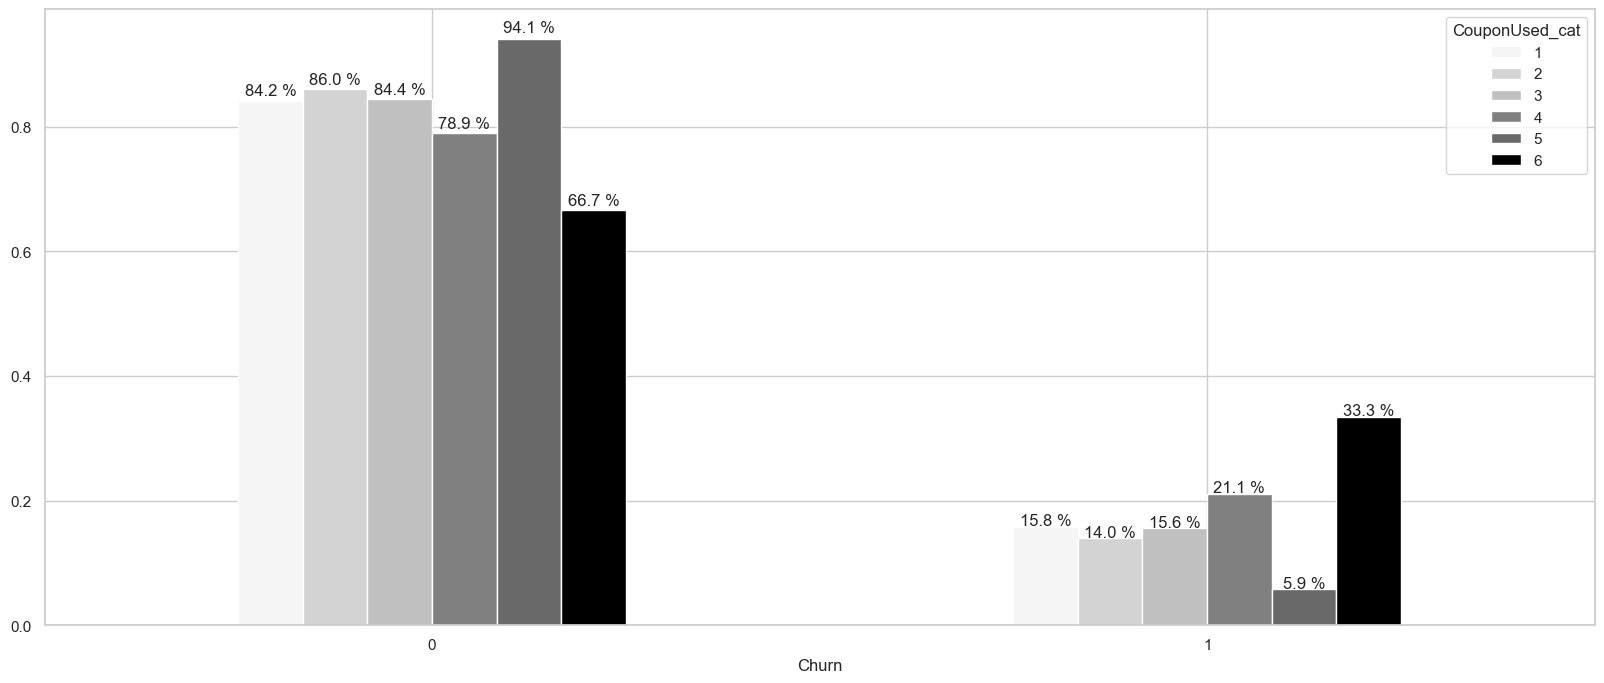

In [1207]:
fig, ax = plt.subplots(figsize=(20, 8))

# crosstab을 사용하여 정규화된 교차표 생성 및 시각화
pd.crosstab(df_ex['CouponUsed_cat'], df_ex['Churn'],normalize='index').T.plot.bar(rot=0, color=['whitesmoke','lightgrey','silver', 'grey','dimgrey','black'], ax=ax)

# 퍼센트 값 표시
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f %%" % (height * 100), (left + width / 2, height * 1.01), ha='center')

plt.show()

- 쿠폰 사용에 따른 이탈의 차이는 없다 

## 3-2.5.캐시백 금액에 따른 이탈 

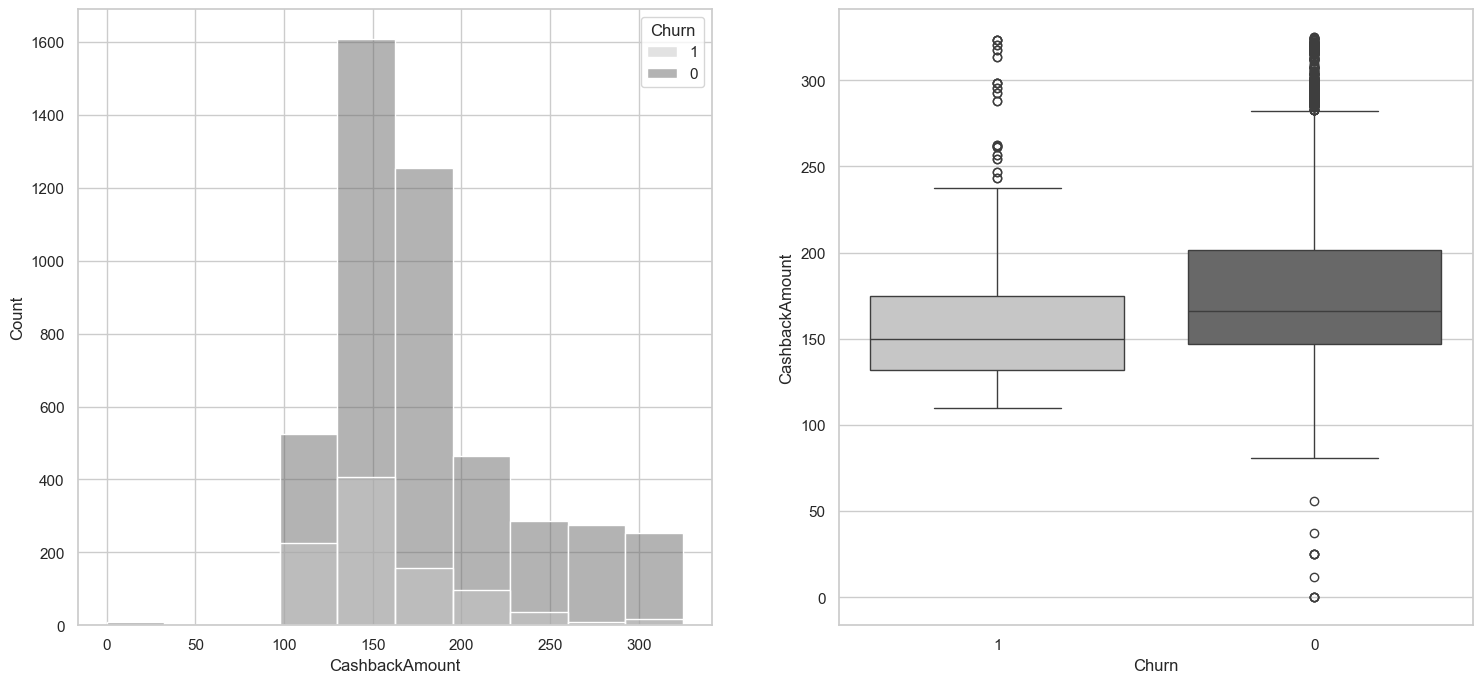

In [1210]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
sns.histplot(x=df['CashbackAmount'],palette='Greys',hue=df['Churn'],ax=ax[0],bins=10)
sns.boxplot(x=df['Churn'], y=df['CashbackAmount'], palette='Greys', orient='v',hue=df['Churn'])
plt.show()


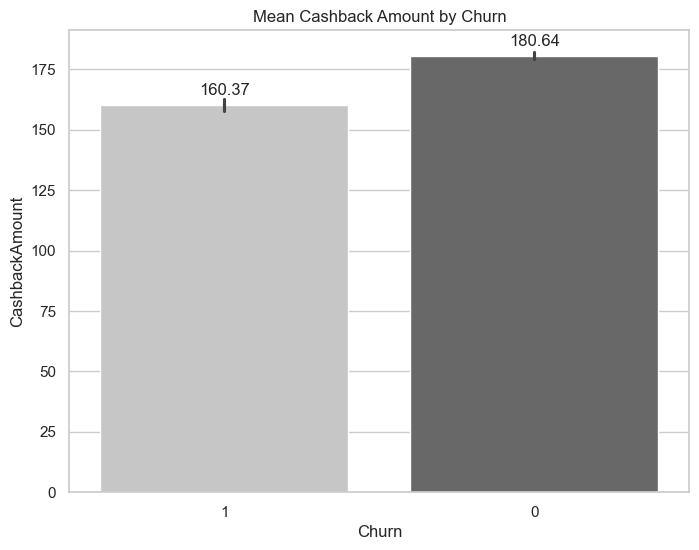

In [1177]:
# 캐시백 금액에 따른 이탈 확인 

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.barplot(x='Churn', y='CashbackAmount', data=df, palette='Greys')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Mean Cashback Amount by Churn')
plt.show()

In [1037]:
pd.cut(df_ex.loc[df_ex['CashbackAmount'].notnull(),'CashbackAmount'],6)

0       (108.33, 162.495]
3       (108.33, 162.495]
4       (108.33, 162.495]
5       (108.33, 162.495]
8       (108.33, 162.495]
              ...        
5625    (108.33, 162.495]
5626    (216.66, 270.825]
5627    (162.495, 216.66]
5628    (162.495, 216.66]
5629    (162.495, 216.66]
Name: CashbackAmount, Length: 5115, dtype: category
Categories (6, interval[float64, right]): [(-0.325, 54.165] < (54.165, 108.33] < (108.33, 162.495] < (162.495, 216.66] < (216.66, 270.825] < (270.825, 324.99]]

In [1038]:
df_ex['CashbackAmount_cat']=0
df_ex.loc[df_ex['CashbackAmount']<=54.165,'CashbackAmount_cat']=1
df_ex.loc[(df_ex['CashbackAmount']>54.165)&(df_ex['CashbackAmount']<=108.33),'CashbackAmount_cat']=2
df_ex.loc[(df_ex['CashbackAmount']>108.33)&(df_ex['CashbackAmount']<=162.495),'CashbackAmount_cat']=3
df_ex.loc[(df_ex['CashbackAmount']>162.495)&(df_ex['CashbackAmount']<=216.66),'CashbackAmount_cat']=4
df_ex.loc[(df_ex['CashbackAmount']>216.66)&(df_ex['CashbackAmount']<=270.825),'CashbackAmount_cat']=5
df_ex.loc[(df_ex['CashbackAmount']>270.825)&(df_ex['CashbackAmount']<=324.99),'CashbackAmount_cat']=6

- 캐시백 금액과 이탈간의 관계 확인 시,이탈 고객의 캐시백 금액이 더 작다. 

## 3-2.6.주문 건수에 따른 이탈 

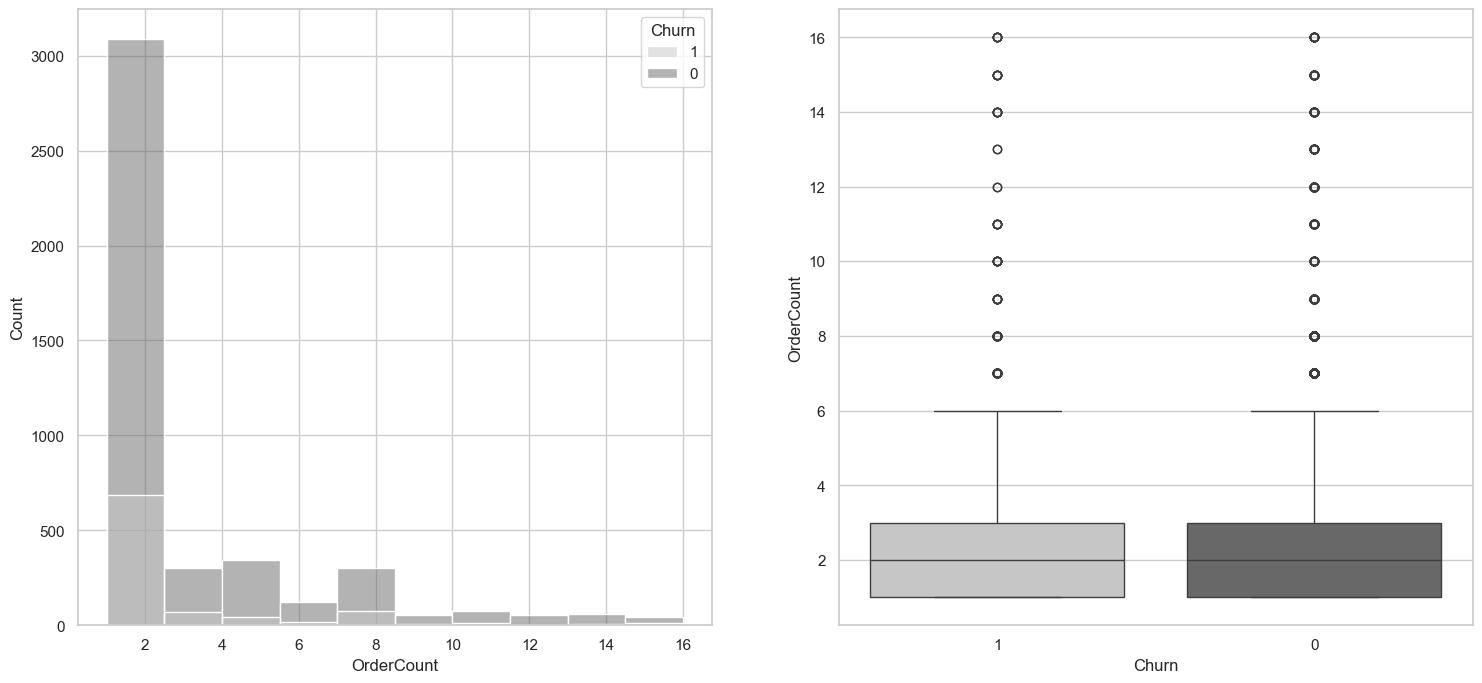

In [1213]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
sns.histplot(x=df['OrderCount'],palette='Greys',hue=df['Churn'],ax=ax[0],bins=10)
sns.boxplot(x=df['Churn'], y=df['OrderCount'], palette='Greys', orient='v',hue=df['Churn'])
plt.show()


In [1214]:
pd.cut(df_ex.loc[df_ex['OrderCount'].notnull(),'OrderCount'],6)

0       (0.985, 3.5]
3       (0.985, 3.5]
4       (0.985, 3.5]
5         (3.5, 6.0]
8       (0.985, 3.5]
            ...     
5624    (0.985, 3.5]
5625    (0.985, 3.5]
5627    (0.985, 3.5]
5628    (0.985, 3.5]
5629    (0.985, 3.5]
Name: OrderCount, Length: 4547, dtype: category
Categories (6, interval[float64, right]): [(0.985, 3.5] < (3.5, 6.0] < (6.0, 8.5] < (8.5, 11.0] < (11.0, 13.5] < (13.5, 16.0]]

In [1215]:
df_ex['OrderCount_cat']=0
df_ex.loc[df_ex['OrderCount']<=3.5,'OrderCount_cat']=1
df_ex.loc[(df_ex['OrderCount']>3.5)&(df_ex['OrderCount']<=6.0),'OrderCount_cat']=2
df_ex.loc[(df_ex['OrderCount']>6.0)&(df_ex['OrderCount']<=8.5),'OrderCount_cat']=3
df_ex.loc[(df_ex['OrderCount']>8.5)&(df_ex['OrderCount']<=11.0),'OrderCount_cat']=4
df_ex.loc[(df_ex['OrderCount']>11.0)&(df_ex['OrderCount']<=13.5),'OrderCount_cat']=5
df_ex.loc[(df_ex['OrderCount']>13.5)&(df_ex['OrderCount']<=16.0),'OrderCount_cat']=6

In [1216]:
df_ex=df_ex[df_ex['OrderCount_cat']!=0]


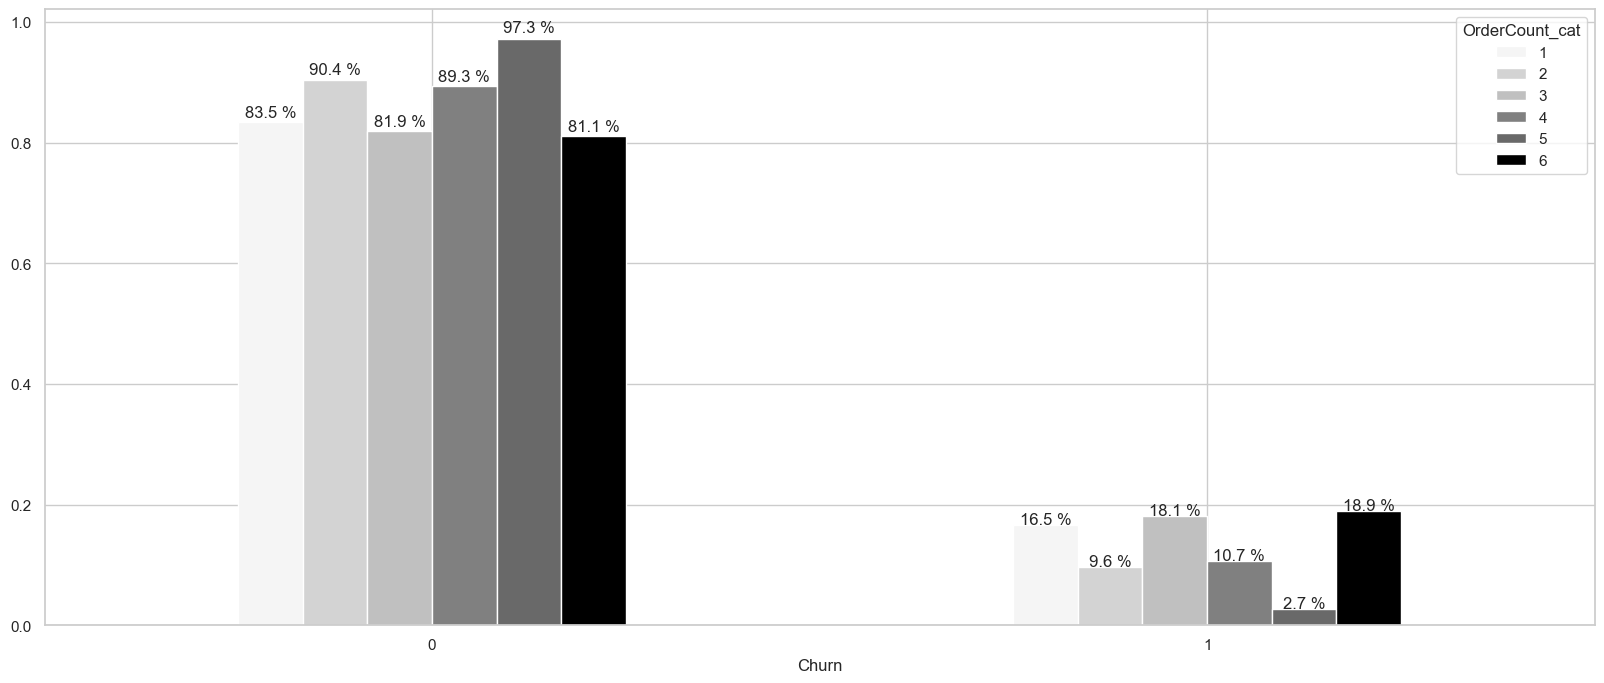

In [1217]:
fig, ax = plt.subplots(figsize=(20, 8))

# crosstab을 사용하여 정규화된 교차표 생성 및 시각화
pd.crosstab(df_ex['OrderCount_cat'], df_ex['Churn'], normalize='index').T.plot.bar(rot=0, color=['whitesmoke','lightgrey','silver', 'grey','dimgrey','black'], ax=ax)

# 퍼센트 값 표시
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f %%" % (height * 100), (left + width / 2, height * 1.01), ha='center')

plt.show()

## 3-2.7.마지막 주문후 소요기간에 따른 이탈 

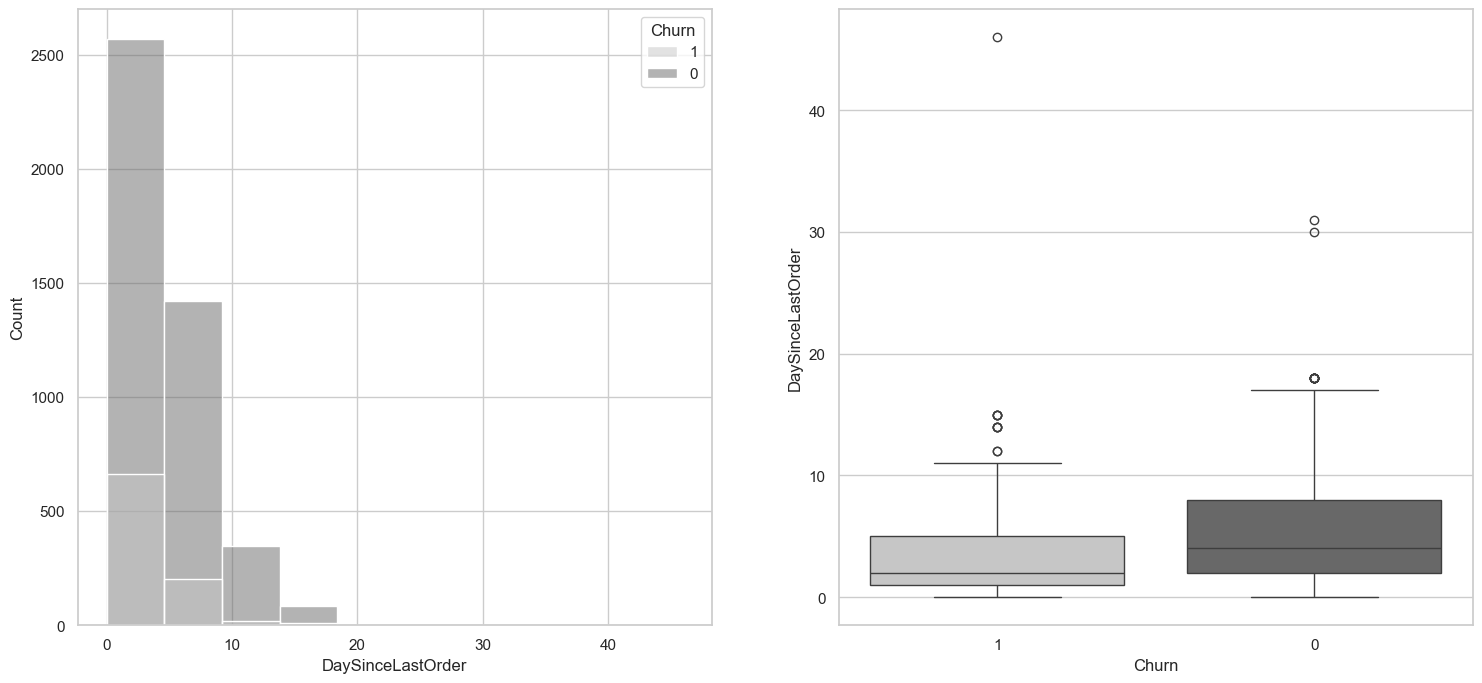

In [1219]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
sns.histplot(x=df['DaySinceLastOrder'],palette='Greys',hue=df['Churn'],ax=ax[0],bins=10)
sns.boxplot(x=df['Churn'], y=df['DaySinceLastOrder'], palette='Greys', orient='v',hue=df['Churn'])
plt.show()


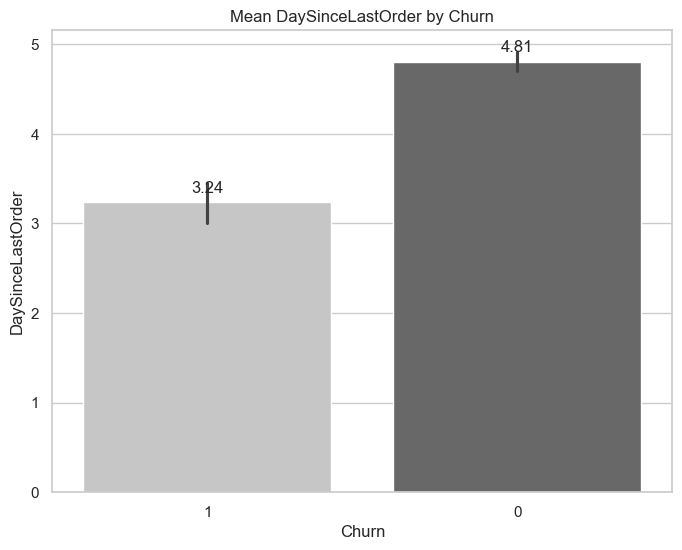

In [1220]:
# 이탈 여부에 따른 사용기간 
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.barplot(x='Churn', y='DaySinceLastOrder', data=df, palette='Greys')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Mean DaySinceLastOrder by Churn')
plt.show()

In [1221]:
pd.cut(df_ex.loc[df_ex['DaySinceLastOrder'].notnull(),'DaySinceLastOrder'],6)

0          (3.0, 6.0]
3       (-0.018, 3.0]
4       (-0.018, 3.0]
5          (6.0, 9.0]
8       (-0.018, 3.0]
            ...      
5624    (-0.018, 3.0]
5625       (3.0, 6.0]
5627       (3.0, 6.0]
5628       (6.0, 9.0]
5629    (-0.018, 3.0]
Name: DaySinceLastOrder, Length: 4547, dtype: category
Categories (6, interval[float64, right]): [(-0.018, 3.0] < (3.0, 6.0] < (6.0, 9.0] < (9.0, 12.0] < (12.0, 15.0] < (15.0, 18.0]]

In [1222]:
df_ex['DaySinceLastOrder_cat']=0
df_ex.loc[df_ex['DaySinceLastOrder']<=3.0,'DaySinceLastOrder_cat']=1
df_ex.loc[(df_ex['DaySinceLastOrder']>3.0)&(df_ex['DaySinceLastOrder']<=6.0),'DaySinceLastOrder_cat']=2
df_ex.loc[(df_ex['DaySinceLastOrder']>6.0)&(df_ex['DaySinceLastOrder']<=9.0),'DaySinceLastOrder_cat']=3
df_ex.loc[(df_ex['DaySinceLastOrder']>9.0)&(df_ex['DaySinceLastOrder']<=12.0),'DaySinceLastOrder_cat']=4
df_ex.loc[(df_ex['DaySinceLastOrder']>12.0)&(df_ex['DaySinceLastOrder']<=15.0),'DaySinceLastOrder_cat']=5
df_ex.loc[(df_ex['DaySinceLastOrder']>15.0)&(df_ex['DaySinceLastOrder']<=18.0),'DaySinceLastOrder_cat']=6

In [1223]:
df_ex=df_ex[df_ex['DaySinceLastOrder_cat']!=0]

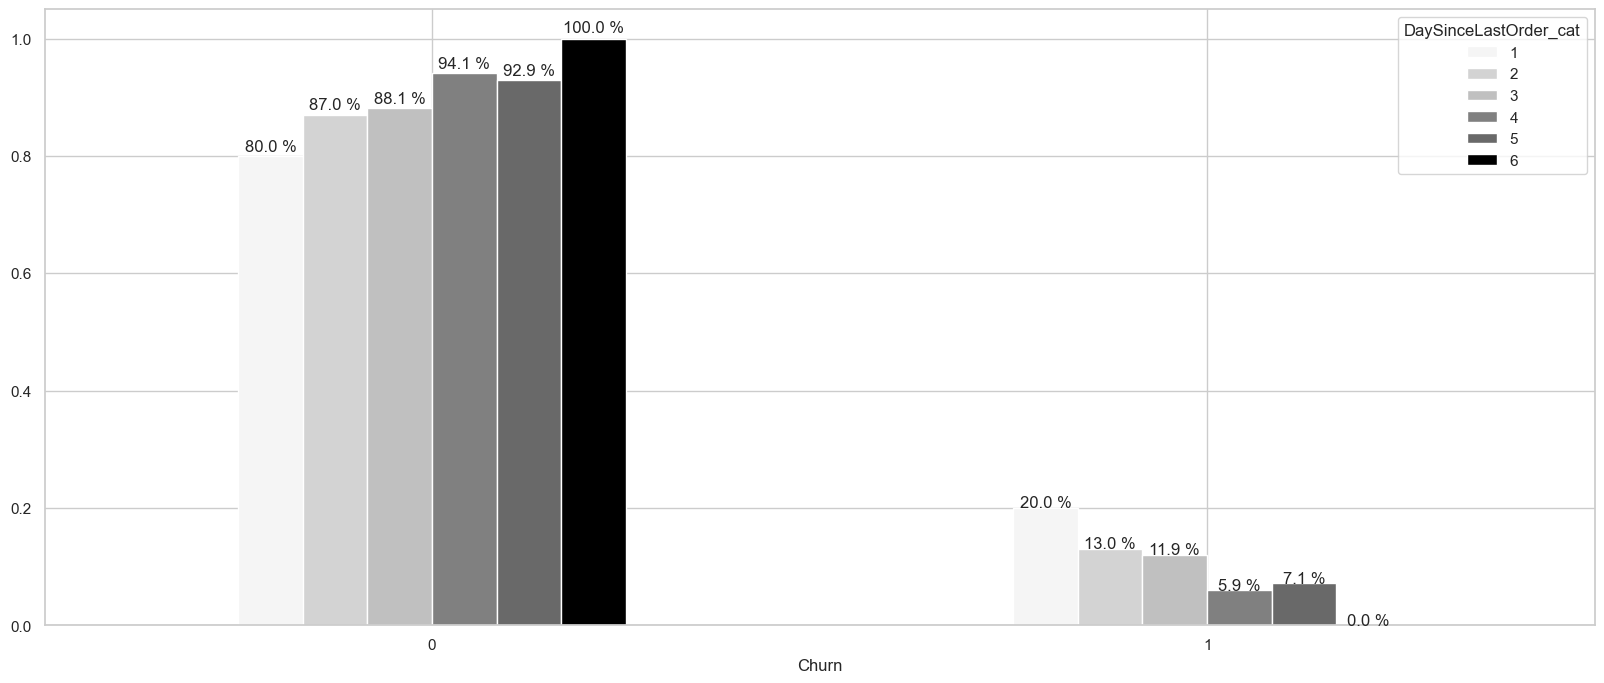

In [1224]:
fig, ax = plt.subplots(figsize=(20, 8))

# crosstab을 사용하여 정규화된 교차표 생성 및 시각화
pd.crosstab(df_ex['DaySinceLastOrder_cat'], df_ex['Churn'], normalize='index').T.plot.bar(rot=0, color=['whitesmoke','lightgrey','silver', 'grey','dimgrey','black'], ax=ax)

# 퍼센트 값 표시
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f %%" % (height * 100), (left + width / 2, height * 1.01), ha='center')

plt.show()

## 3-2.8.주소 등록 갯수에 따른 이탈 

In [1336]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

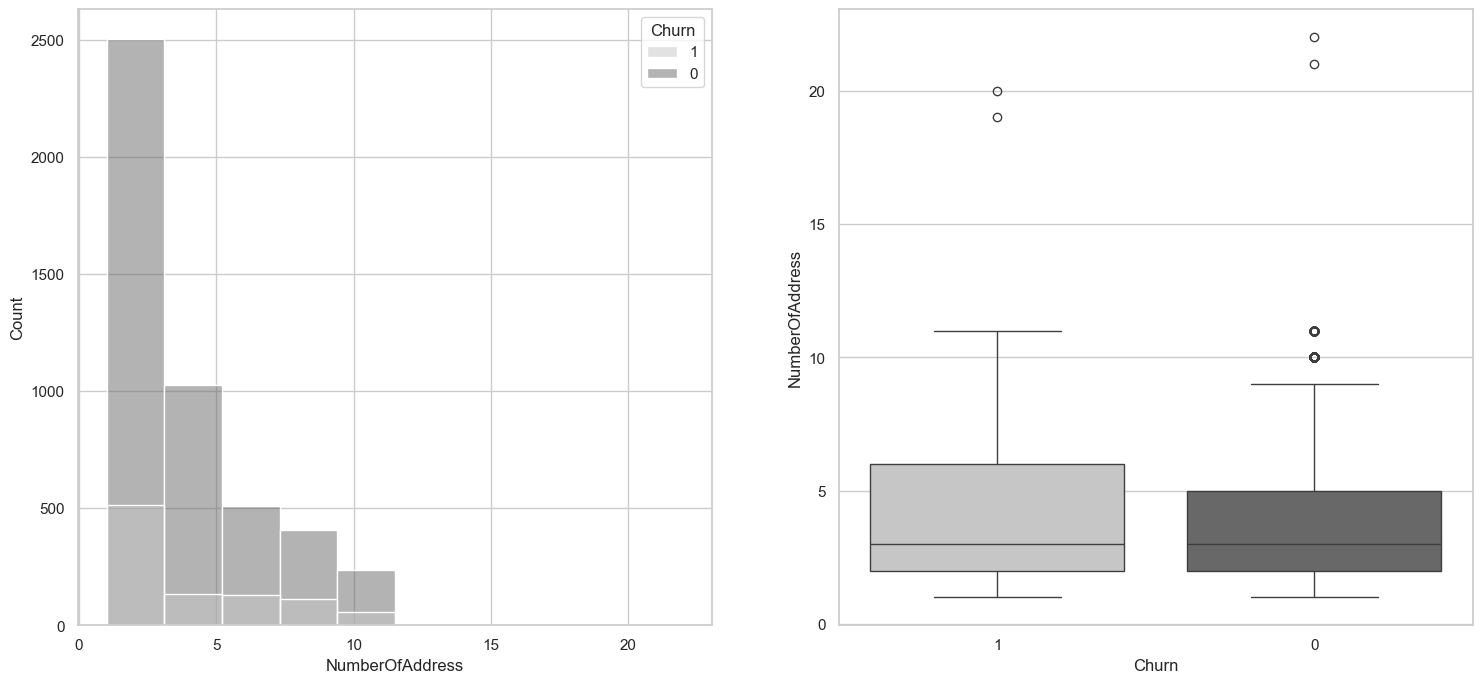

In [1225]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
sns.histplot(x=df['NumberOfAddress'],palette='Greys',hue=df['Churn'],ax=ax[0],bins=10)
sns.boxplot(x=df['Churn'], y=df['NumberOfAddress'], palette='Greys', orient='v',hue=df['Churn'])
plt.show()


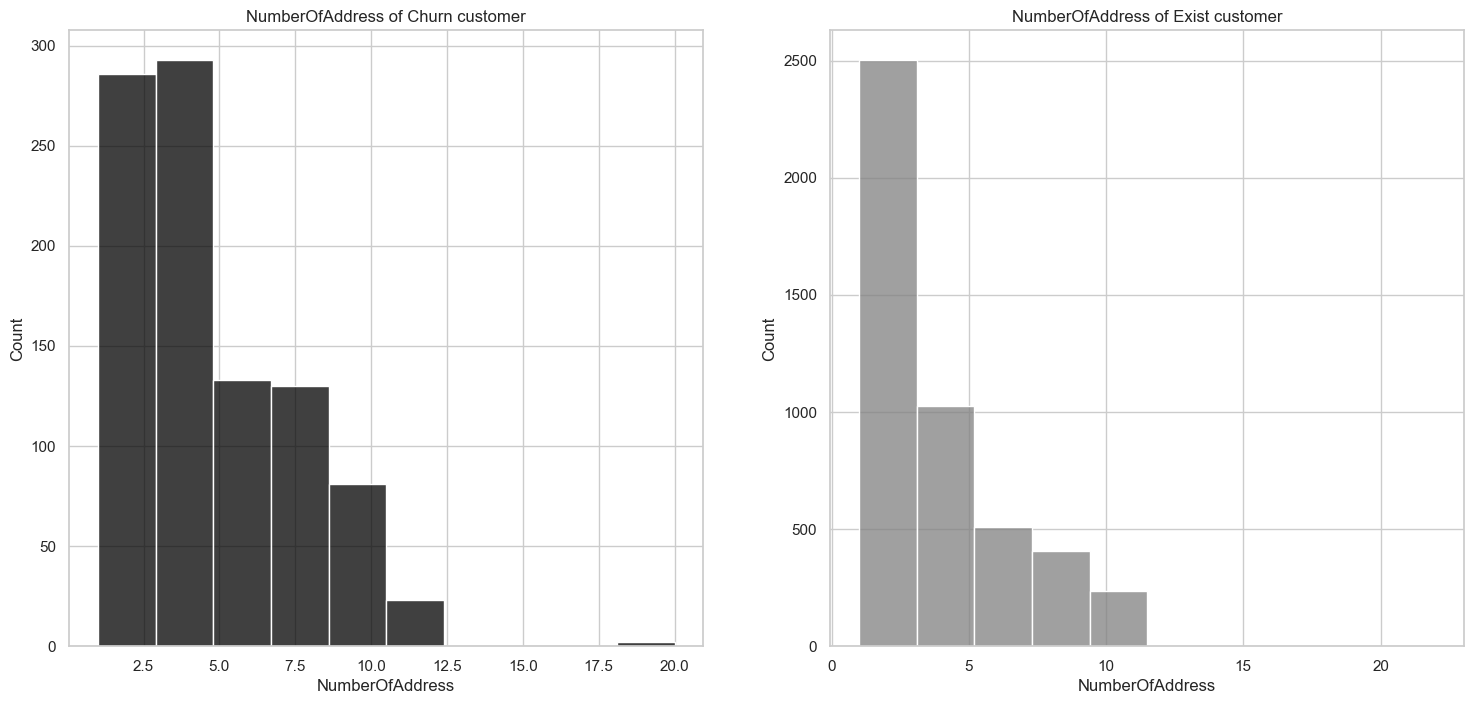

In [1242]:
# 이탈고객 vs 존재고객의 주소등록갯수 분포 
fig,ax=plt.subplots(1,2,figsize=(18,8))
sns.histplot(x=churn_custom['NumberOfAddress'],bins=10,ax=ax[0],color='black')
ax[0].set_title('NumberOfAddress of Churn customer')
sns.histplot(x=exist_custom['NumberOfAddress'],bins=10,color='grey')
ax[1].set_title('NumberOfAddress of Exist customer')

plt.show()

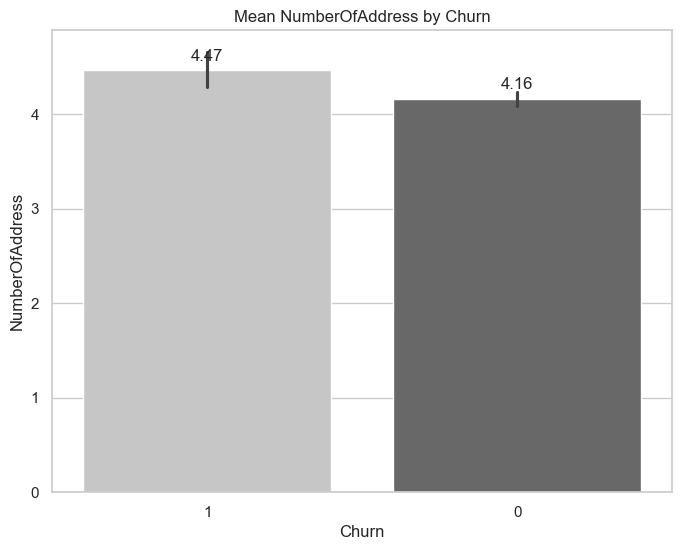

In [1230]:
# 이탈 여부에 따른 주소등록갯수 평균 
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.barplot(x='Churn', y='NumberOfAddress', data=df, palette='Greys')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Mean NumberOfAddress by Churn')
plt.show()

In [1247]:
pd.cut(df_ex.loc[df_ex['NumberOfAddress'].notnull(),'NumberOfAddress'],6)

0        (8.0, 11.5]
3         (4.5, 8.0]
4       (0.979, 4.5]
5       (0.979, 4.5]
8       (0.979, 4.5]
            ...     
5624    (0.979, 4.5]
5625      (4.5, 8.0]
5627    (0.979, 4.5]
5628    (0.979, 4.5]
5629    (0.979, 4.5]
Name: NumberOfAddress, Length: 4547, dtype: category
Categories (6, interval[float64, right]): [(0.979, 4.5] < (4.5, 8.0] < (8.0, 11.5] < (11.5, 15.0] < (15.0, 18.5] < (18.5, 22.0]]

In [1248]:
df_ex['NumberOfAddress_cat']=0
df_ex.loc[df_ex['NumberOfAddress']<=4.5,'NumberOfAddress_cat']=1
df_ex.loc[(df_ex['NumberOfAddress']>4.5)&(df_ex['NumberOfAddress']<=8.0),'NumberOfAddress_cat']=2
df_ex.loc[(df_ex['NumberOfAddress']>8.0)&(df_ex['NumberOfAddress']<=11.5),'NumberOfAddress_cat']=3
df_ex.loc[(df_ex['NumberOfAddress']>11.5)&(df_ex['NumberOfAddress']<=15.0),'NumberOfAddress_cat']=4
df_ex.loc[(df_ex['NumberOfAddress']>15.0)&(df_ex['NumberOfAddress']<=18.5),'NumberOfAddress_cat']=5
df_ex.loc[(df_ex['NumberOfAddress']>18.5)&(df_ex['NumberOfAddress']<=22.0),'NumberOfAddress_cat']=6

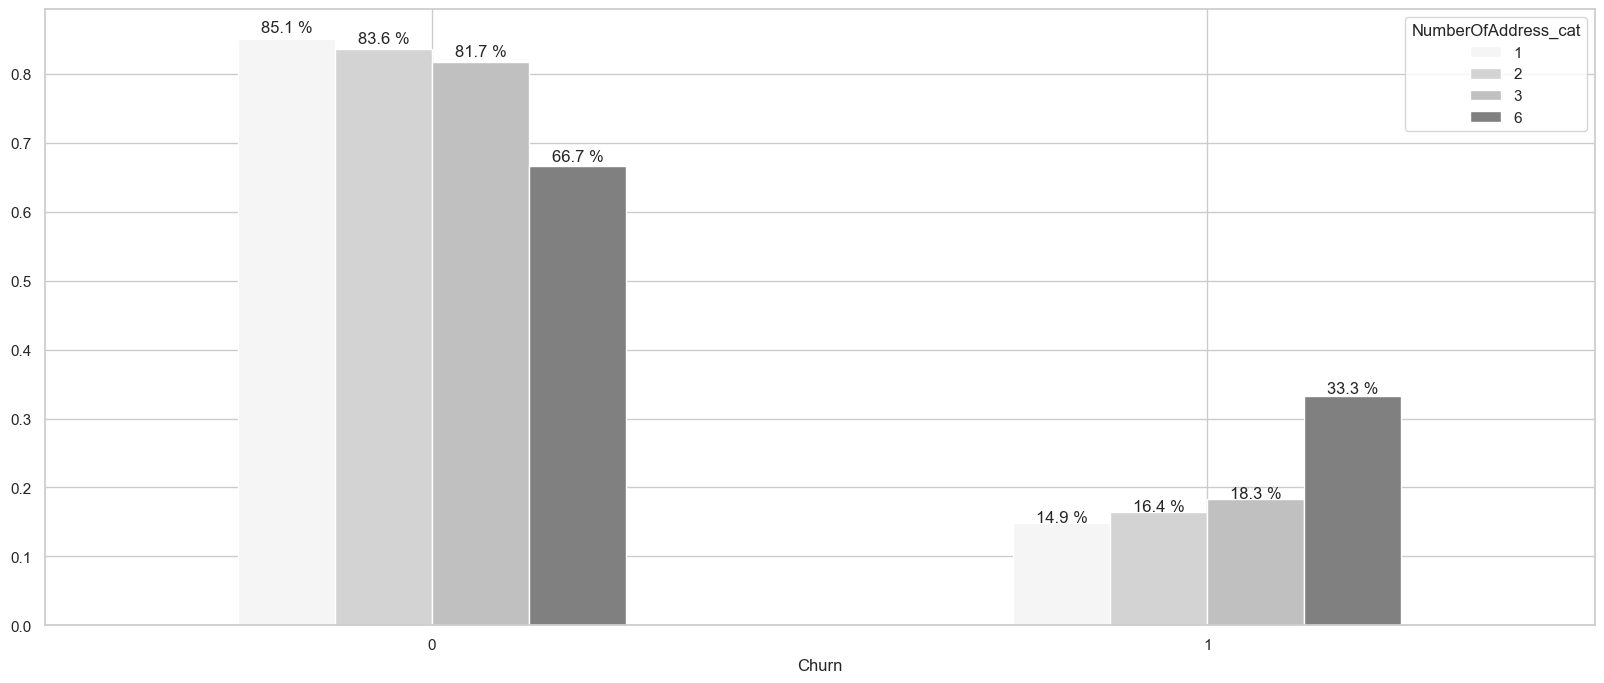

In [1249]:
fig, ax = plt.subplots(figsize=(20, 8))

# crosstab을 사용하여 정규화된 교차표 생성 및 시각화
pd.crosstab(df_ex['NumberOfAddress_cat'], df_ex['Churn'], normalize='index').T.plot.bar(rot=0, color=['whitesmoke','lightgrey','silver', 'grey','dimgrey','black'], ax=ax)

# 퍼센트 값 표시
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f %%" % (height * 100), (left + width / 2, height * 1.01), ha='center')

plt.show()

## 3-2.9.디바이스 등록 갯수에 따른 이탈 

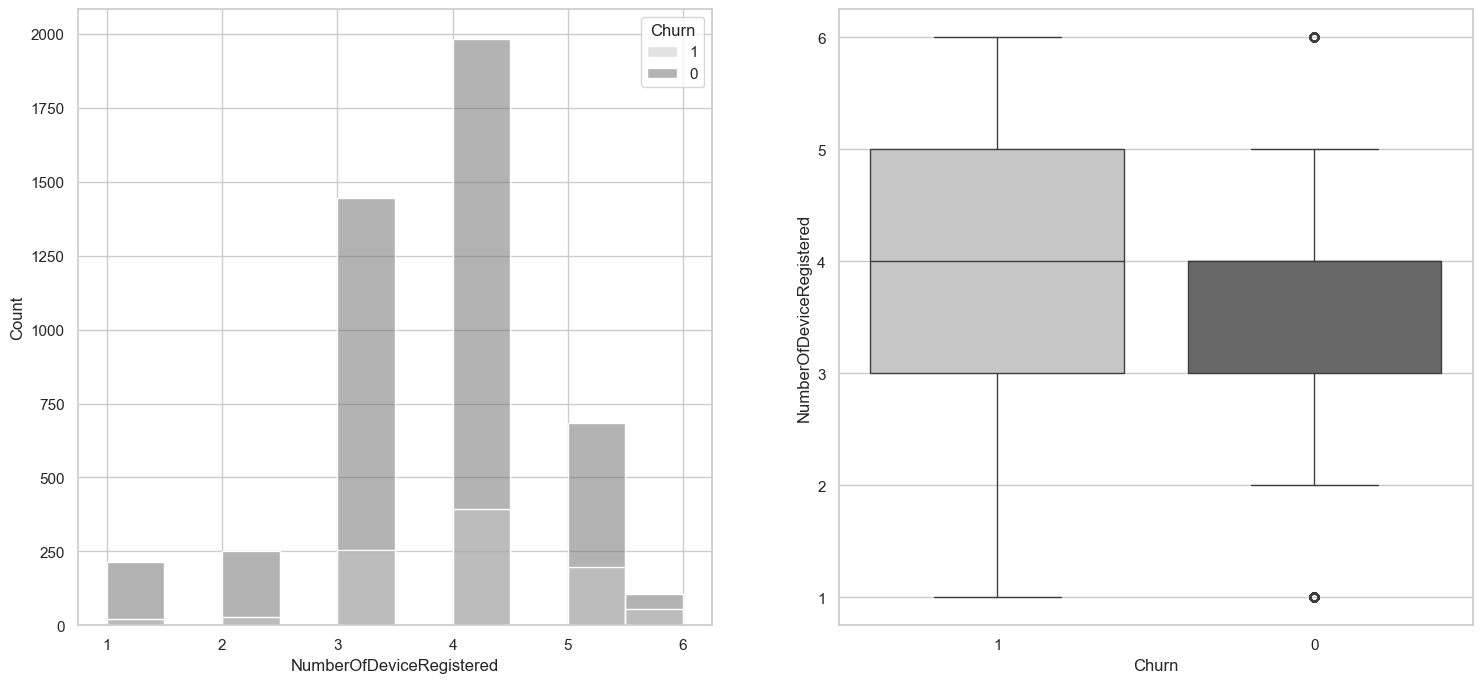

In [1250]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
sns.histplot(x=df['NumberOfDeviceRegistered'],palette='Greys',hue=df['Churn'],ax=ax[0],bins=10)
sns.boxplot(x=df['Churn'], y=df['NumberOfDeviceRegistered'], palette='Greys', orient='v',hue=df['Churn'])
plt.show()

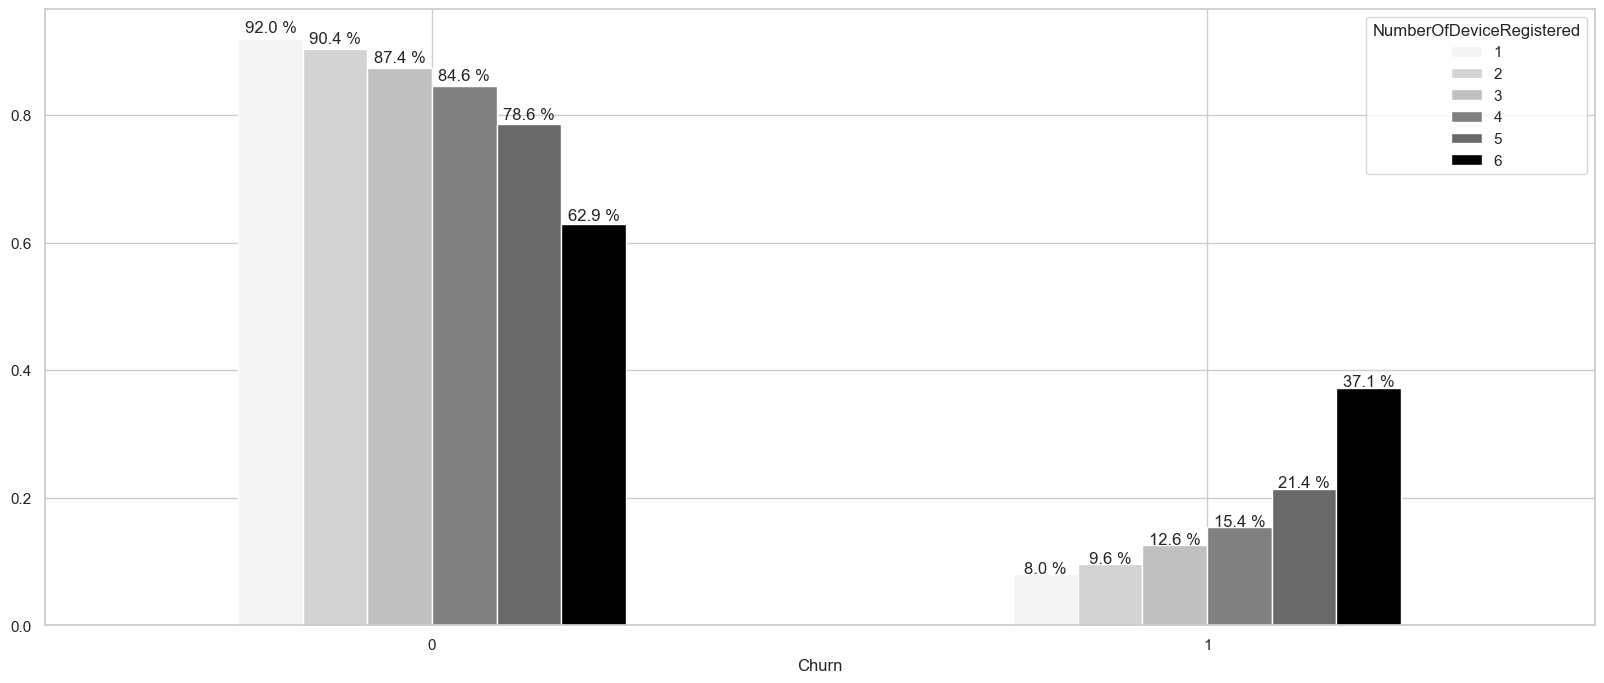

In [1252]:
fig, ax = plt.subplots(figsize=(20, 8))

# crosstab을 사용하여 정규화된 교차표 생성 및 시각화
pd.crosstab(df_ex['NumberOfDeviceRegistered'], df_ex['Churn'], normalize='index').T.plot.bar(rot=0, color=['whitesmoke','lightgrey','silver', 'grey','dimgrey','black'], ax=ax)

# 퍼센트 값 표시
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f %%" % (height * 100), (left + width / 2, height * 1.01), ha='center')

plt.show()

In [1315]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

## 3-2.10.주문금액에 따른 이탈 

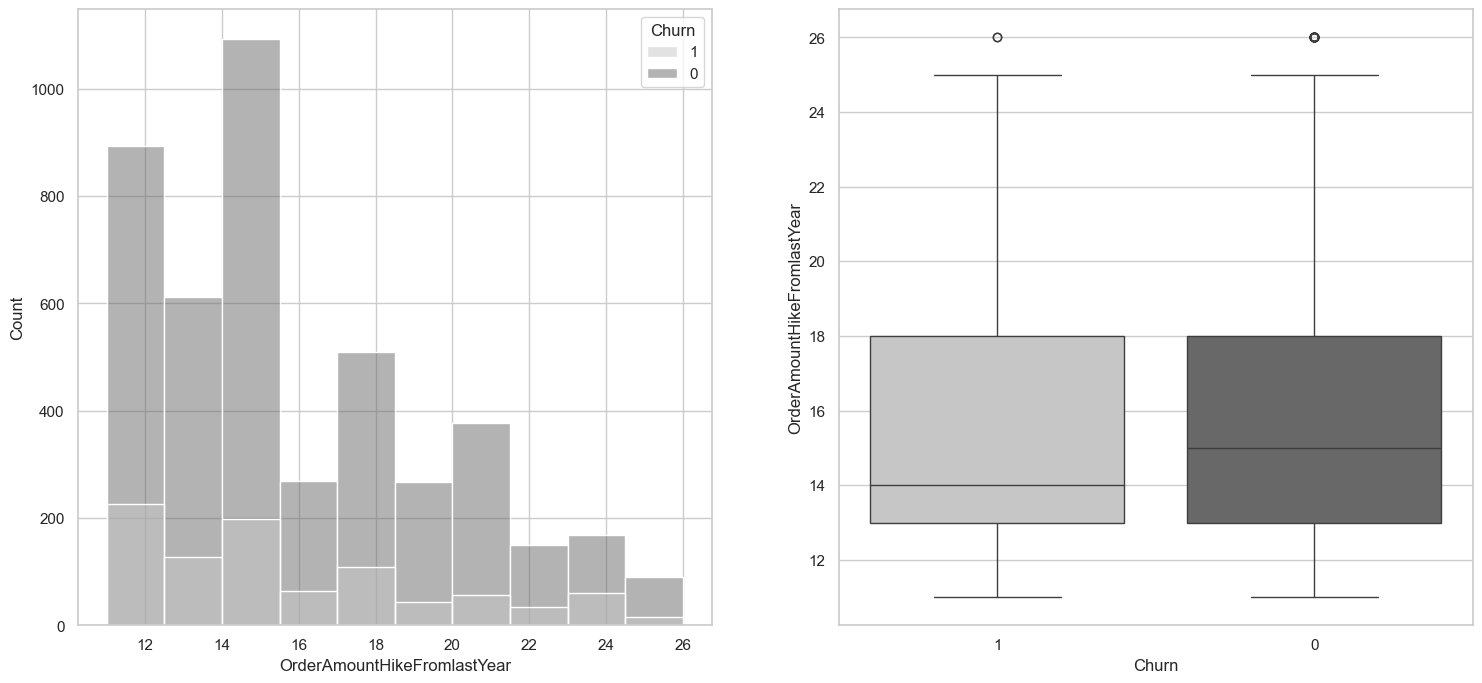

In [1316]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
sns.histplot(x=df['OrderAmountHikeFromlastYear'],palette='Greys',hue=df['Churn'],ax=ax[0],bins=10)
sns.boxplot(x=df['Churn'], y=df['OrderAmountHikeFromlastYear'], palette='Greys', orient='v',hue=df['Churn'])
plt.show()

In [1318]:
pd.cut(df_ex.loc[df_ex['OrderAmountHikeFromlastYear'].notnull(),'OrderAmountHikeFromlastYear'],6)

0       (10.985, 13.5]
3         (21.0, 23.5]
4       (10.985, 13.5]
5         (21.0, 23.5]
8         (13.5, 16.0]
             ...      
5625      (16.0, 18.5]
5626      (13.5, 16.0]
5627      (18.5, 21.0]
5628      (13.5, 16.0]
5629    (10.985, 13.5]
Name: OrderAmountHikeFromlastYear, Length: 5101, dtype: category
Categories (6, interval[float64, right]): [(10.985, 13.5] < (13.5, 16.0] < (16.0, 18.5] < (18.5, 21.0] < (21.0, 23.5] < (23.5, 26.0]]

In [1321]:
df_ex['OrderAmountHikeFromlastYear_cat']=0
df_ex.loc[df_ex['OrderAmountHikeFromlastYear']<=13.5,'OrderAmountHikeFromlastYear_cat']=1
df_ex.loc[(df_ex['OrderAmountHikeFromlastYear']>13.5)&(df_ex['OrderAmountHikeFromlastYear']<=16.0),'OrderAmountHikeFromlastYear_cat']=2
df_ex.loc[(df_ex['OrderAmountHikeFromlastYear']>16.0)&(df_ex['OrderAmountHikeFromlastYear']<=18.5),'OrderAmountHikeFromlastYear_cat']=3
df_ex.loc[(df_ex['OrderAmountHikeFromlastYear']>18.5)&(df_ex['OrderAmountHikeFromlastYear']<=21.0),'OrderAmountHikeFromlastYear_cat']=4
df_ex.loc[(df_ex['OrderAmountHikeFromlastYear']>21.0)&(df_ex['OrderAmountHikeFromlastYear']<=23.5),'OrderAmountHikeFromlastYear_cat']=5
df_ex.loc[(df_ex['OrderAmountHikeFromlastYear']>23.5)&(df_ex['OrderAmountHikeFromlastYear']<=26.0),'OrderAmountHikeFromlastYear_cat']=6

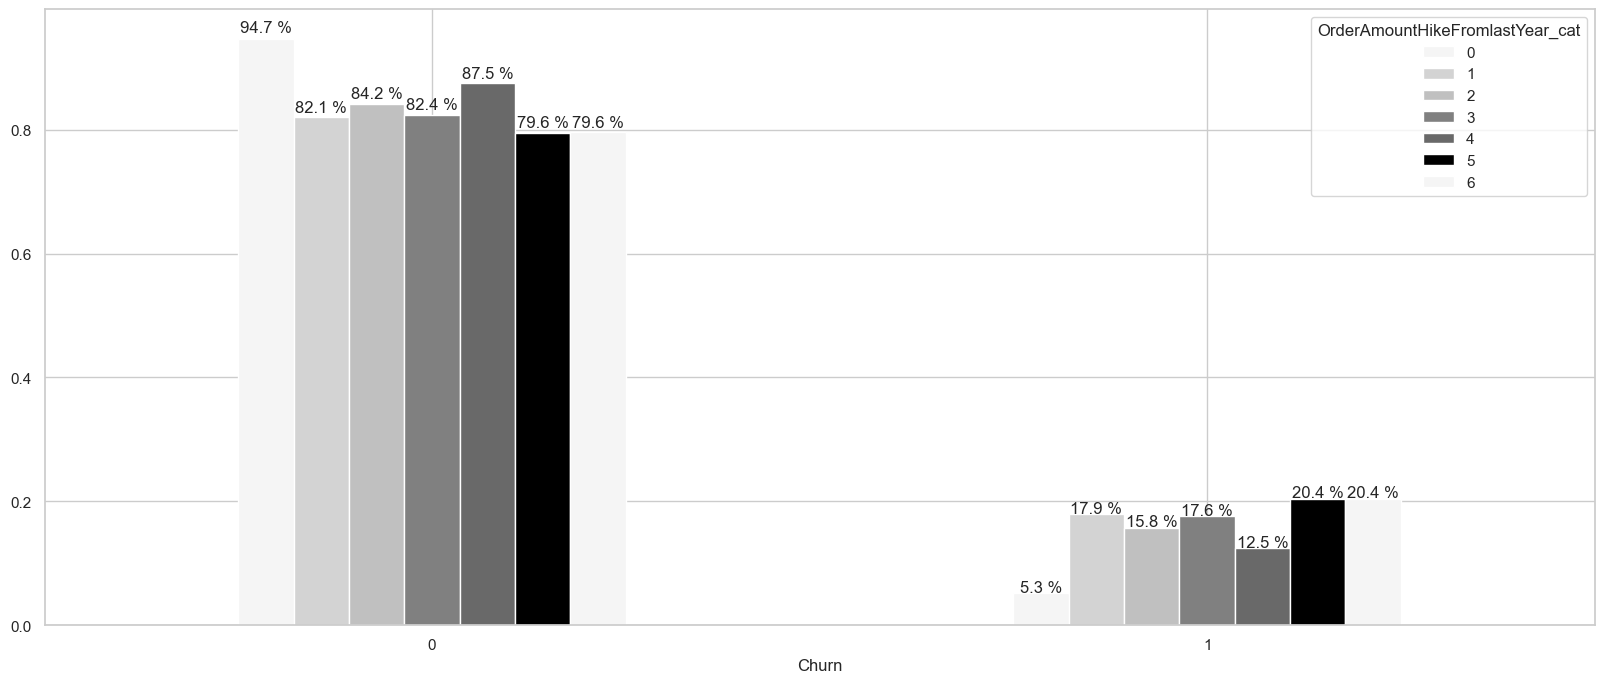

In [1322]:
fig, ax = plt.subplots(figsize=(20, 8))

# crosstab을 사용하여 정규화된 교차표 생성 및 시각화
pd.crosstab(df_ex['OrderAmountHikeFromlastYear_cat'], df_ex['Churn'], normalize='index').T.plot.bar(rot=0, color=['whitesmoke','lightgrey','silver', 'grey','dimgrey','black'], ax=ax)

# 퍼센트 값 표시
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f %%" % (height * 100), (left + width / 2, height * 1.01), ha='center')

plt.show()

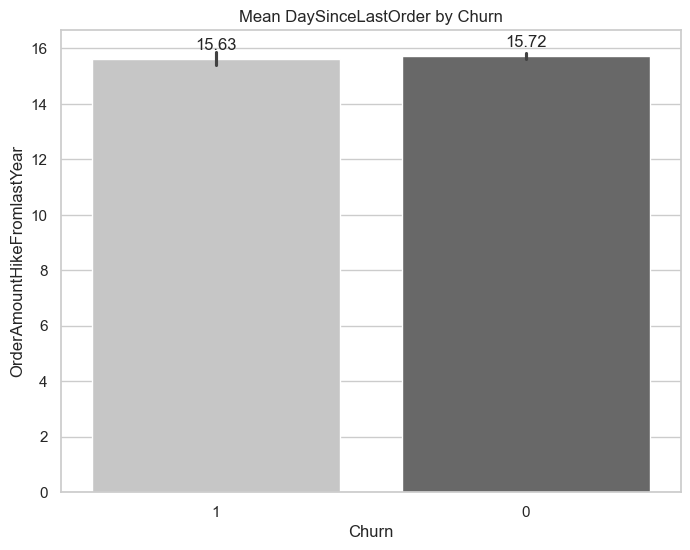

In [1324]:
# 이탈 여부에 따른 사용기간 
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.barplot(x='Churn', y='OrderAmountHikeFromlastYear', data=df, palette='Greys')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Mean DaySinceLastOrder by Churn')
plt.show()

### 3-4.변수간 상관관계 확인 

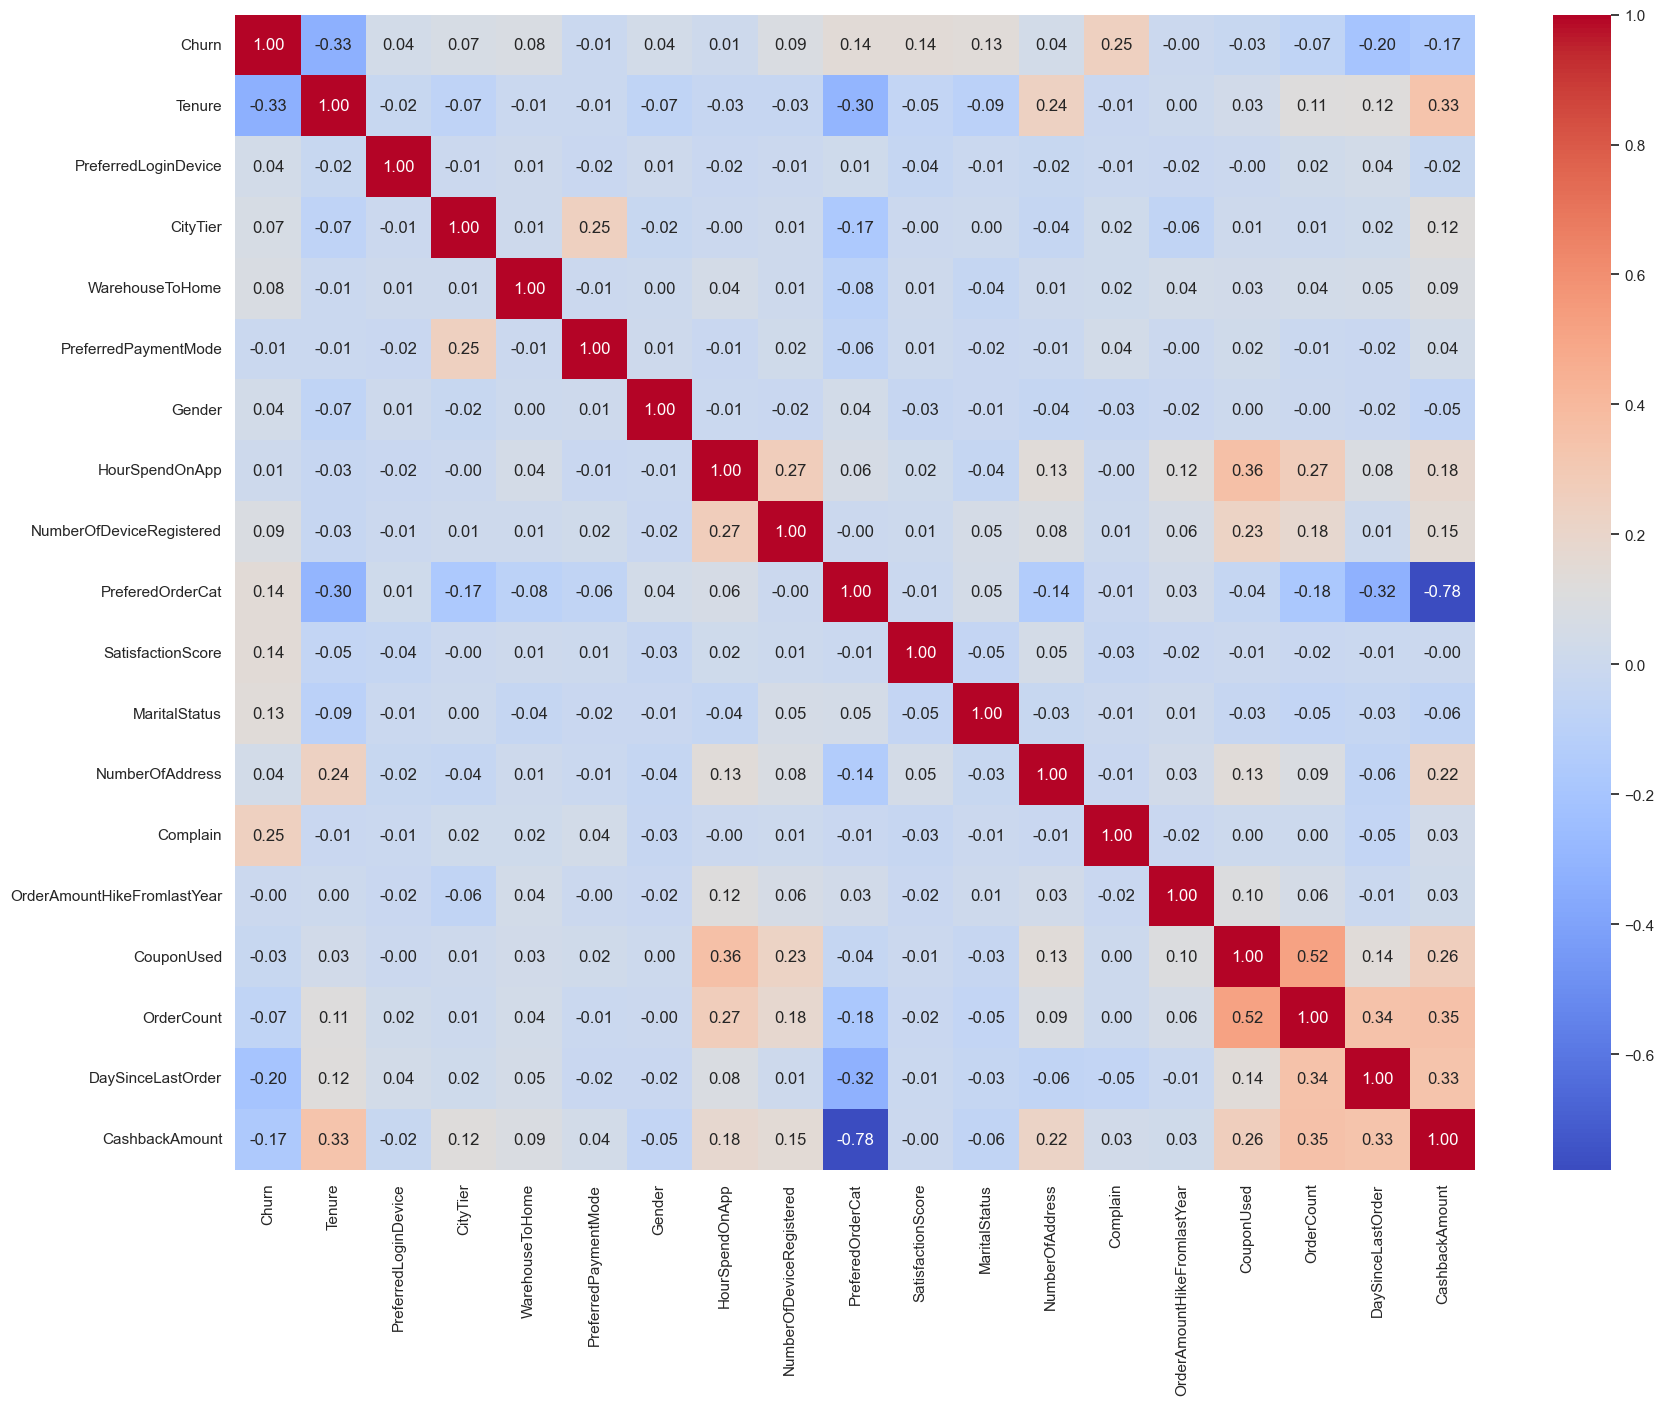

In [1323]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 컬럼 필터링
num_col = df2.select_dtypes(exclude='O').columns[1:]

# 상관관계 확인
fig, ax = plt.subplots(figsize=(20, 15))

# 폰트 크기 조절
annot_kws = {'size': 12}

sns.heatmap(df2[num_col].corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax, annot_kws=annot_kws)

plt.show()


- 이탈여부 'Churn'과 양의 상관관계가 가장 강한 컬럼은 'Complain','NumberOfDeviceRegistered' 와 'SatisfactionScore'이다.
- 이탈여부 'Churn'과 상관관계가 가장 낮은 컬럼은 'Tenure' 이다. 

# 4.데이터 전처리 

#### 4-1.결측치 처리 

In [1083]:
# 결측치 확인 => ['Tenure','WarehouseToHome','HourSpendOnApp','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder']
df.isnull().sum()/df.shape[0]*100

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

In [1084]:
# 결측치는 모두 수치형(연속형) 변수로  => 중간값으로 대체  
df1=df.copy()
df1['Tenure']=df1['Tenure'].fillna(df1['Tenure'].mean())
df1['WarehouseToHome']=df1['WarehouseToHome'].fillna(df1['WarehouseToHome'].mean())
df1['HourSpendOnApp']=df1['HourSpendOnApp'].fillna(df1['HourSpendOnApp'].mean())
df1['OrderAmountHikeFromlastYear']=df1['OrderAmountHikeFromlastYear'].fillna(df1['OrderAmountHikeFromlastYear'].mean())
df1['CouponUsed']=df1['CouponUsed'].fillna(df1['CouponUsed'].mean())
df1['OrderCount']=df1['OrderCount'].fillna(df1['OrderCount'].mean())
df1['DaySinceLastOrder']=df1['DaySinceLastOrder'].fillna(df1['DaySinceLastOrder'].mean())



In [1085]:
display('결측치 처리 전:' ,df.isnull().sum())
display('결측치 처리 후:' ,df1.isnull().sum())

'결측치 처리 전:'

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

'결측치 처리 후:'

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

### 4-2.이상치 처리 

In [1098]:

def detect_outliers_iqr(data, threshold=1.5):

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = ((data < lower_bound) | (data > upper_bound)).any(axis=1)
    return data[outliers]



In [1099]:
# 이상치 탐지
num_cols = df.select_dtypes(exclude='O').columns
outliers = detect_outliers_iqr(df[num_cols])

# 이상치 출력
print("이상치 여부:")
print(outliers)


이상치 여부:
      CustomerID  Tenure  WarehouseToHome  HourSpendOnApp  \
5          50006     0.0             22.0             3.0   
10         50011     4.0             18.0             2.0   
20         50021     0.0             12.0             3.0   
21         50022    20.0             29.0             3.0   
28         50029    18.0              NaN             2.0   
...          ...     ...              ...             ...   
5603       55604    16.0              9.0             3.0   
5604       55605    20.0             14.0             4.0   
5607       55608    10.0             22.0             3.0   
5618       55619     9.0              8.0             4.0   
5622       55623    13.0             31.0             3.0   

      NumberOfDeviceRegistered  NumberOfAddress  OrderAmountHikeFromlastYear  \
5                            5                2                         22.0   
10                           3                2                          NaN   
20                 

In [1097]:
num_col=df.select_dtypes(exclude='O').columns[2:]

detect_outliers_iqr(df[num_col])
print(detect_outliers_iqr(df[num_col]))

0       False
1       False
2       False
3       False
4       False
        ...  
5625    False
5626    False
5627    False
5628    False
5629    False
Length: 5630, dtype: bool


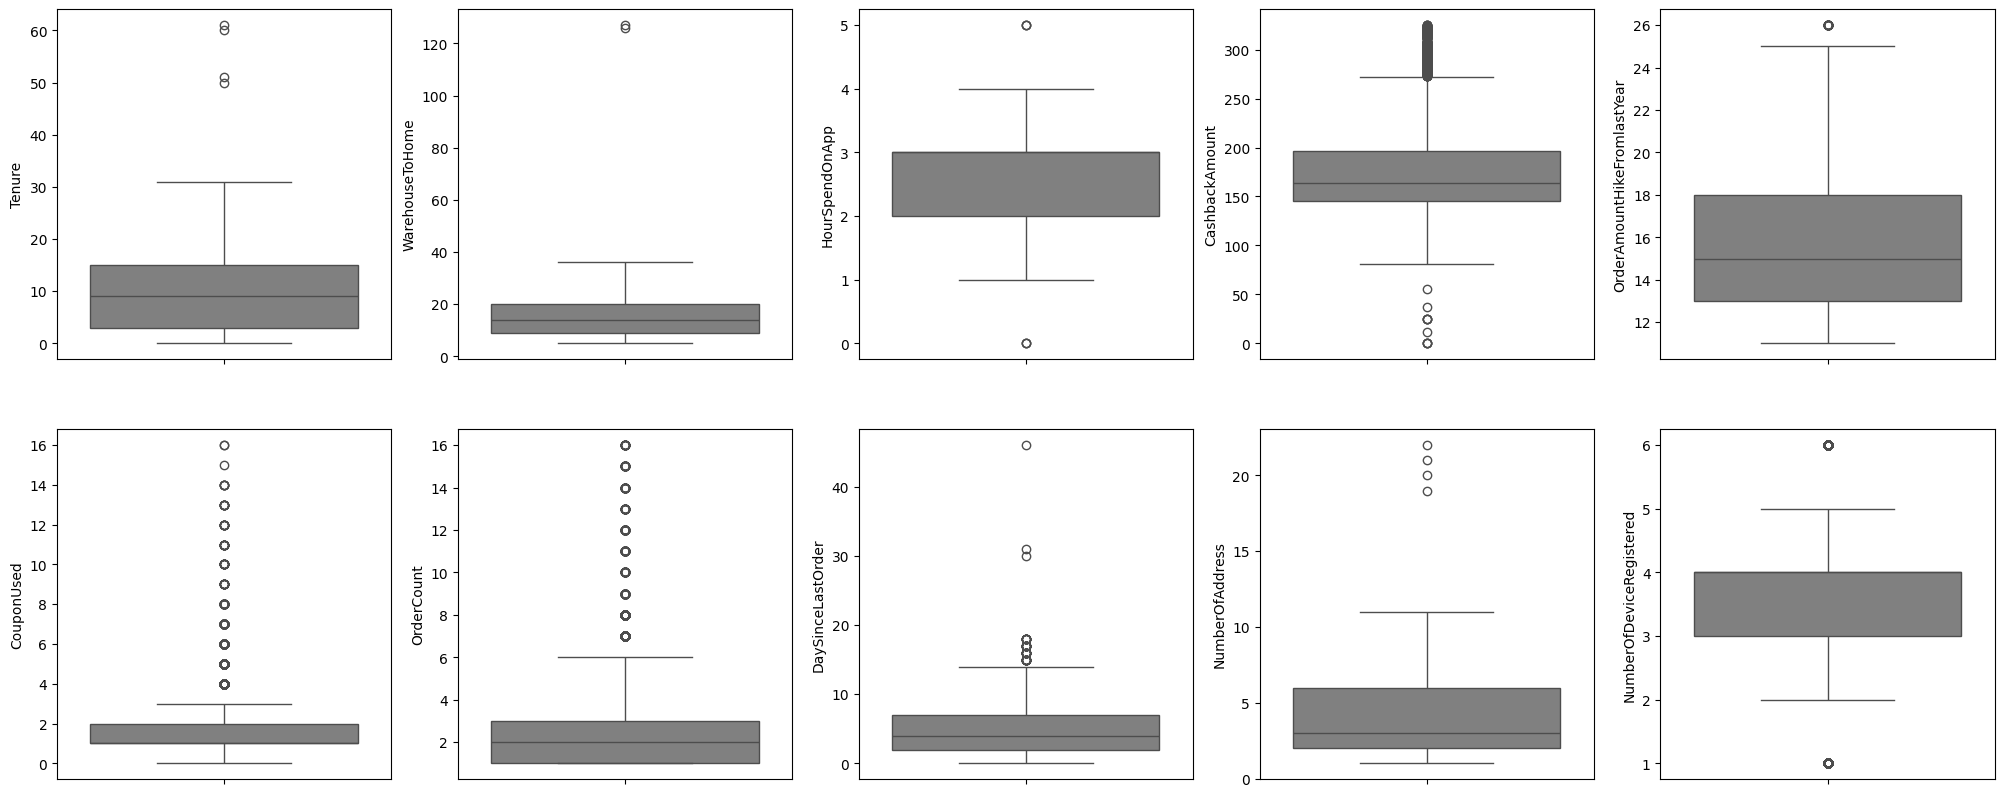

In [1100]:
# 이상치 처리전 (수치형 데이터 boxplot)
fig,ax=plt.subplots(2,5,figsize=(25,10))

sns.boxplot(df1['Tenure'],ax=ax[0,0],color='grey')
sns.boxplot(df1['WarehouseToHome'],ax=ax[0,1],color='grey')
sns.boxplot(df1['HourSpendOnApp'],ax=ax[0,2],color='grey')
sns.boxplot(df1['CashbackAmount'],ax=ax[0,3],color='grey')
sns.boxplot(df1['OrderAmountHikeFromlastYear'],ax=ax[0,4],color='grey')
sns.boxplot(df1['CouponUsed'],ax=ax[1,0],color='grey')
sns.boxplot(df1['OrderCount'],ax=ax[1,1],color='grey')
sns.boxplot(df1['DaySinceLastOrder'],ax=ax[1,2],color='grey')
sns.boxplot(df1['NumberOfAddress'],ax=ax[1,3],color='grey')
sns.boxplot(df1['NumberOfDeviceRegistered'],ax=ax[1,4],color='grey')
plt.show()



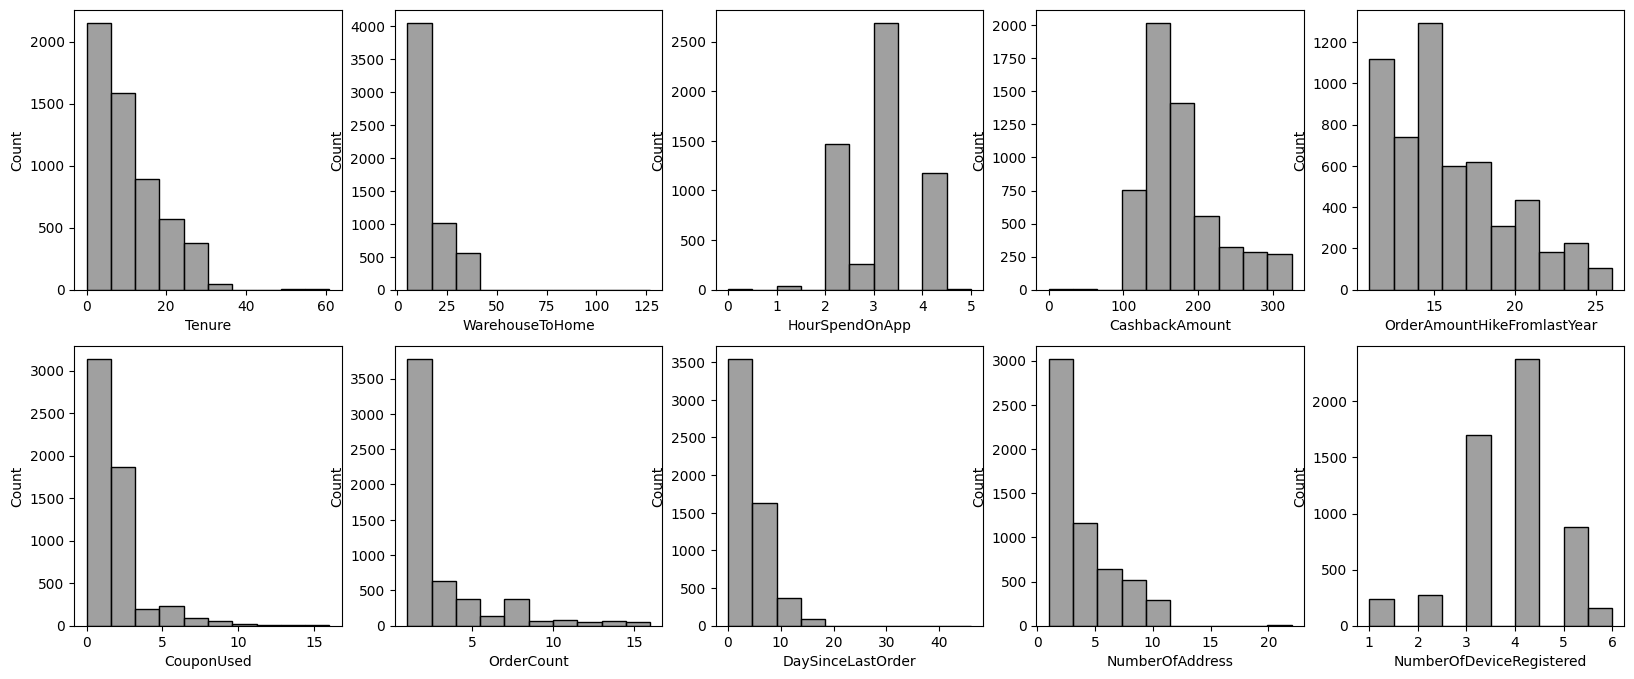

In [1101]:
# 이상치 처리전 (수치형 데이터 histplot)

fig,ax=plt.subplots(2,5,figsize=(20,8))

sns.histplot(df1['Tenure'],ax=ax[0,0],bins=10,color='grey')
sns.histplot(df1['WarehouseToHome'],ax=ax[0,1],bins=10,color='grey')
sns.histplot(df1['HourSpendOnApp'],ax=ax[0,2],bins=10,color='grey')
sns.histplot(df1['CashbackAmount'],ax=ax[0,3],bins=10,color='grey')
sns.histplot(df1['OrderAmountHikeFromlastYear'],ax=ax[0,4],bins=10,color='grey')
sns.histplot(df1['CouponUsed'],ax=ax[1,0],bins=10,color='grey')
sns.histplot(df1['OrderCount'],ax=ax[1,1],bins=10,color='grey')
sns.histplot(df1['DaySinceLastOrder'],ax=ax[1,2],bins=10,color='grey')
sns.histplot(df1['NumberOfAddress'],ax=ax[1,3],bins=10,color='grey')
sns.histplot(df1['NumberOfDeviceRegistered'],ax=ax[1,4],bins=10,color='grey')
plt.show()



In [1102]:
def remove_outliers(df, column):
    data = df[column]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    outliers_index = data[(data < lower_bound) | (data > upper_bound)].index
    
    print('Column:', column)
    print('Outliers Index:', outliers_index)
    return outliers_index



In [1118]:
df2=df1.copy()
num_col = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'CashbackAmount', 'OrderAmountHikeFromlastYear',
    'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'NumberOfAddress', 'NumberOfDeviceRegistered'
]

index=[]
for i in num_col:
    index.append(remove_outliers(df2,i))

index_list=[]
for i,e in enumerate(index):
    for a,b in enumerate(e):
        index_list.append(b)

index_list = pd.Series(index_list).drop_duplicates().tolist()



Column: Tenure
Outliers Index: Index([928, 2719, 3743, 5534], dtype='int64')
Column: WarehouseToHome
Outliers Index: Index([1309, 4124], dtype='int64')
Column: HourSpendOnApp
Outliers Index: Index([150, 950, 1950, 4223, 4248, 4351], dtype='int64')
Column: CashbackAmount
Outliers Index: Index([  10,   40,   61,   62,   65,  101,  106,  108,  112,  119,
       ...
       5470, 5490, 5491, 5508, 5511, 5534, 5537, 5561, 5597, 5603],
      dtype='int64', length=438)
Column: OrderAmountHikeFromlastYear
Outliers Index: Index([2868, 2941, 2971, 3124, 3366, 3543, 3565, 3582, 3761, 3765, 3777, 3856,
       3888, 3997, 4062, 4122, 4280, 4338, 4411, 4441, 4594, 4836, 5013, 5035,
       5052, 5231, 5235, 5247, 5326, 5358, 5467, 5532, 5592],
      dtype='int64')
Column: CouponUsed
Outliers Index: Index([   5,   10,   20,   21,   47,   53,   85,   93,  102,  126,
       ...
       5549, 5563, 5564, 5565, 5569, 5574, 5585, 5604, 5607, 5622],
      dtype='int64', length=629)
Column: OrderCount
Outliers

In [1119]:
df2=df2.drop(index=index_list)

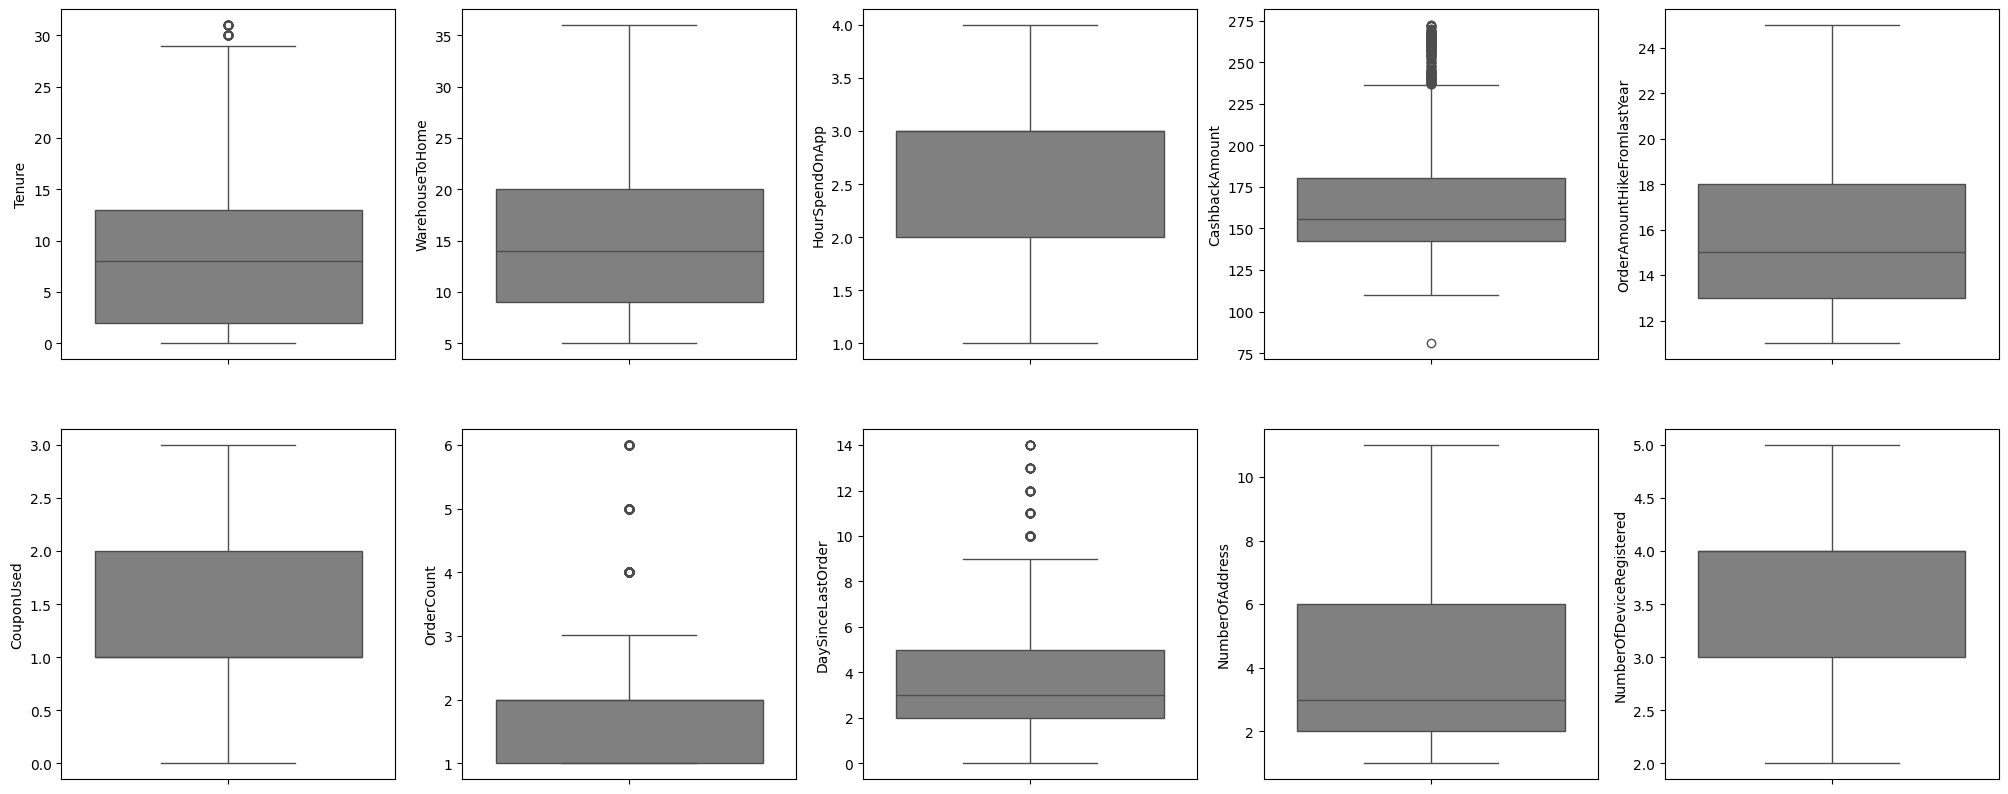

In [1120]:
# 이상치 처리후 (수치형 데이터 boxplot)
fig,ax=plt.subplots(2,5,figsize=(25,10))

sns.boxplot(df2['Tenure'],ax=ax[0,0],color='grey')
sns.boxplot(df2['WarehouseToHome'],ax=ax[0,1],color='grey')
sns.boxplot(df2['HourSpendOnApp'],ax=ax[0,2],color='grey')
sns.boxplot(df2['CashbackAmount'],ax=ax[0,3],color='grey')
sns.boxplot(df2['OrderAmountHikeFromlastYear'],ax=ax[0,4],color='grey')
sns.boxplot(df2['CouponUsed'],ax=ax[1,0],color='grey')
sns.boxplot(df2['OrderCount'],ax=ax[1,1],color='grey')
sns.boxplot(df2['DaySinceLastOrder'],ax=ax[1,2],color='grey')
sns.boxplot(df2['NumberOfAddress'],ax=ax[1,3],color='grey')
sns.boxplot(df2['NumberOfDeviceRegistered'],ax=ax[1,4],color='grey')
plt.show()



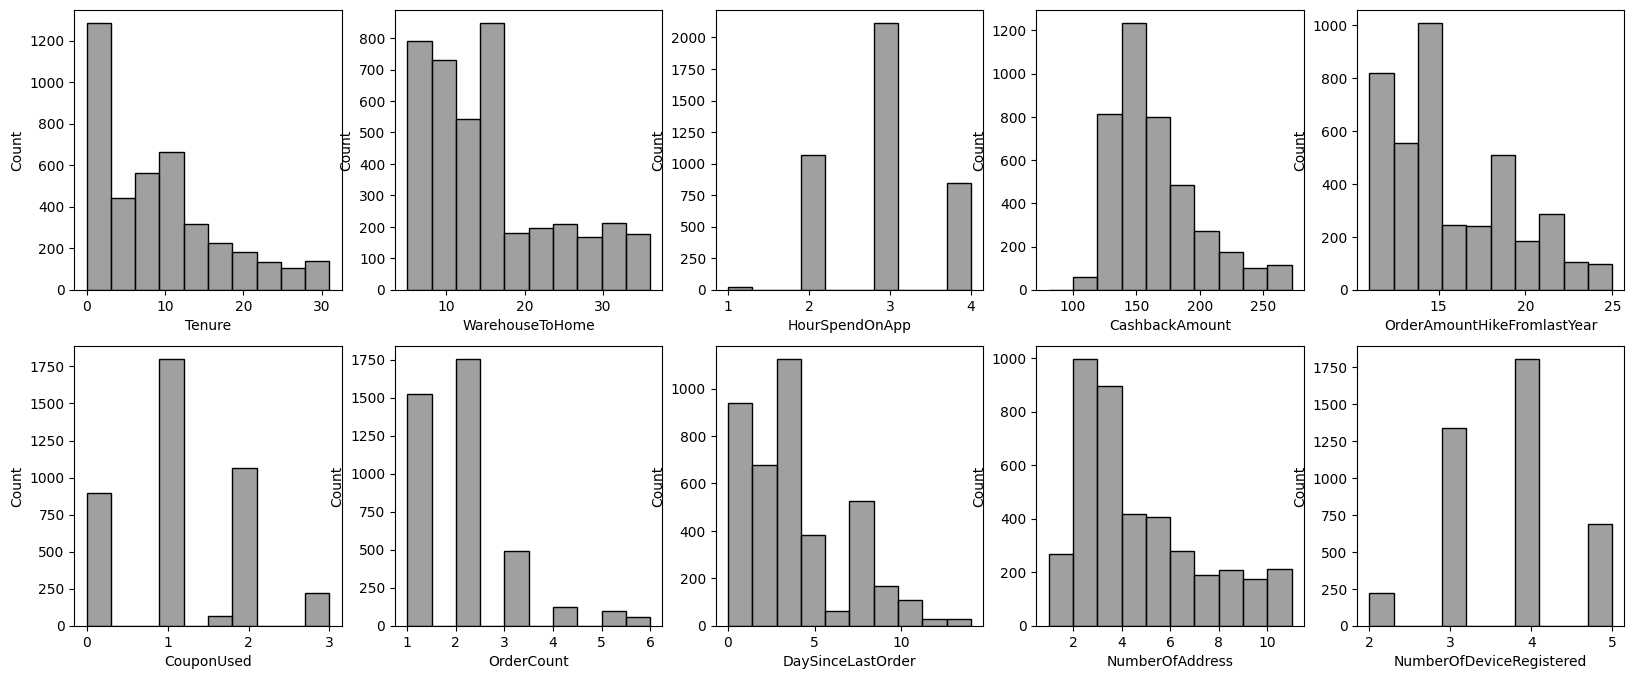

In [1121]:
# 이상치 처리후 (수치형 데이터 histplot)

fig,ax=plt.subplots(2,5,figsize=(20,8))

sns.histplot(df2['Tenure'],ax=ax[0,0],bins=10,color='grey')
sns.histplot(df2['WarehouseToHome'],ax=ax[0,1],bins=10,color='grey')
sns.histplot(df2['HourSpendOnApp'],ax=ax[0,2],bins=10,color='grey')
sns.histplot(df2['CashbackAmount'],ax=ax[0,3],bins=10,color='grey')
sns.histplot(df2['OrderAmountHikeFromlastYear'],ax=ax[0,4],bins=10,color='grey')
sns.histplot(df2['CouponUsed'],ax=ax[1,0],bins=10,color='grey')
sns.histplot(df2['OrderCount'],ax=ax[1,1],bins=10,color='grey')
sns.histplot(df2['DaySinceLastOrder'],ax=ax[1,2],bins=10,color='grey')
sns.histplot(df2['NumberOfAddress'],ax=ax[1,3],bins=10,color='grey')
sns.histplot(df2['NumberOfDeviceRegistered'],ax=ax[1,4],bins=10,color='grey')
plt.show()



## 4-3.범주형 컬럼 인코딩 

In [1122]:
lb = LabelEncoder()
df2['PreferredLoginDevice'] = lb.fit_transform(df2['PreferredLoginDevice'])
df2['PreferredPaymentMode'] = lb.fit_transform(df2['PreferredPaymentMode'])
df2['Gender'] = lb.fit_transform(df2['Gender'])
df2['PreferedOrderCat'] = lb.fit_transform(df2['PreferedOrderCat'])
df2['MaritalStatus'] = lb.fit_transform(df2['MaritalStatus'])
df2['SatisfactionScore'] = lb.fit_transform(df2['SatisfactionScore'])
df2['Churn'] = lb.fit_transform(df2['Churn'])
df2['CityTier'] = lb.fit_transform(df2['CityTier'])
df2['Complain'] = lb.fit_transform(df2['Complain'])



# 5.모델링 

## 5-1.모델링 준비 - SMOTETomek

In [1123]:
X = df2.drop('Churn' , axis = 1)
Y = df2['Churn']
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
x_over , y_over = smt.fit_resample(X , Y)
x_over.shape, y_over.shape


((6410, 19), (6410,))

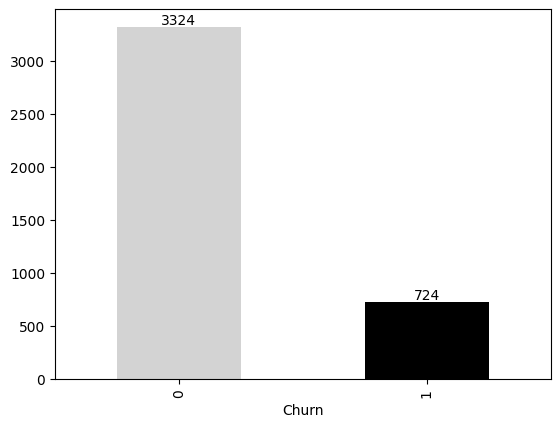

In [1134]:
import matplotlib.pyplot as plt

value_counts_series = Y.value_counts()

ax = value_counts_series.plot(kind='bar', color=['lightgrey', 'black'])

for i, v in enumerate(value_counts_series):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
plt.show()

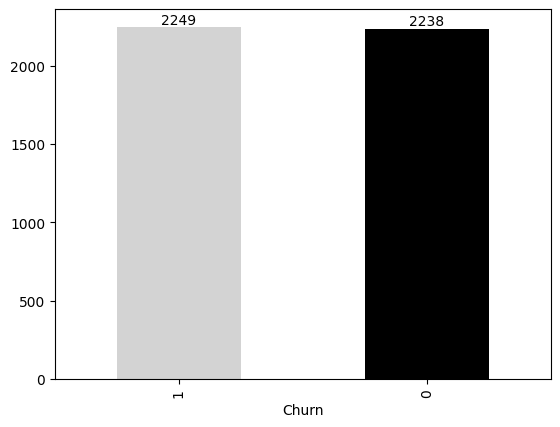

In [1135]:
import matplotlib.pyplot as plt

value_counts_series = y_train.value_counts()

ax = value_counts_series.plot(kind='bar', color=['lightgrey', 'black'])

for i, v in enumerate(value_counts_series):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
plt.show()


In [1124]:
x_train , x_test , y_train , y_test = train_test_split(x_over , y_over , test_size = 0.30 , random_state = 42)


In [1125]:
id=x_test.pop('CustomerID')
x_train.drop('CustomerID',axis=1,inplace=True)

# 5-2.스케일링 

In [1126]:
col=x_train.columns

for i in col:
    MN = MinMaxScaler()
    x_train[col] = MN.fit_transform(x_train[col])
    x_test[col] = MN.fit_transform(x_test[col])



## 5-3.모델링 -1차 시도 

In [1127]:
logisreg_clf = LogisticRegression()
svm_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
XGB_clf = XGBClassifier()
lbg_clf = LGBMClassifier()
grdient_clf=GradientBoostingClassifier()

clf_list = [logisreg_clf, svm_clf, dt_clf, rf_clf, XGB_clf, lbg_clf,grdient_clf]
clf_name_list = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'XGBClassifier' , 'LGBMClassifier','GradientBoostingClassifier']



for clf in clf_list:
    clf.fit(x_train,y_train)
acc_list = []
pre_list = []
recall_list = []
f1_list=[]
roc_list=[]



for clf,name in zip(clf_list,clf_name_list):
    y_pred_test = clf.predict(x_test)
    print(f'Using model: {name}')
    print(f'Test Score: {clf.score(x_test, y_test)}')
    print(f'accuracy_score : {accuracy_score(y_test, y_pred_test)}')
    print(f'precision_score : {precision_score(y_test, y_pred_test)}')
    print(f'recall_score : {recall_score(y_test, y_pred_test)}')
    print(f'f1_score : {f1_score(y_test, y_pred_test)}')
    print(f'roc_auc_score : {roc_auc_score(y_test, y_pred_test)}')
    acc_list.append(accuracy_score(y_test, y_pred_test))
    pre_list.append(precision_score(y_test, y_pred_test))
    recall_list.append(recall_score(y_test, y_pred_test))
    f1_list.append(f1_score(y_test, y_pred_test))
    roc_list.append(roc_auc_score(y_test, y_pred_test))

    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)

Using model: Logistic Regression
Test Score: 0.7623504940197607
accuracy_score : 0.7623504940197607
precision_score : 0.8076448828606658
recall_score : 0.6851464435146444
f1_score : 0.7413695529145444
roc_auc_score : 0.7619113810127514
                                                            
************************************************************
                                                            
Using model: Support Vector Machine
Test Score: 0.8559542381695268
accuracy_score : 0.8559542381695268
precision_score : 0.8915801614763552
recall_score : 0.8085774058577406
f1_score : 0.848052660449808
roc_auc_score : 0.8556847732494494
                                                            
************************************************************
                                                            
Using model: Decision Tree
Test Score: 0.8356734269370775
accuracy_score : 0.8356734269370775
precision_score : 0.8747072599531616
recall_score : 0.781380753138

In [1128]:
# graph to determine best 2 models

all_models = pd.DataFrame({'Accuarcy': acc_list , 'Precision' : pre_list ,'Recall':recall_list,'F1 Score':f1_list,'AUC Score':roc_list}, index = clf_name_list)
all_models=all_models.reset_index()
all_models.rename(columns={'index':'Model'},inplace=True)

In [1129]:
all_models


,Model,Accuarcy,Precision,Recall,F1 Score,AUC Score
0,Logistic Regression,0.762350,0.807645,0.685146,0.741370,0.761911
1,Support Vector Machine,0.855954,0.891580,0.808577,0.848053,0.855685
2,Decision Tree,0.835673,0.874707,0.781381,0.825414,0.835365
3,Random Forest,0.907956,0.947187,0.862971,0.903120,0.907700
4,XGBClassifier,0.931877,0.966102,0.894351,0.928843,0.931664
5,LGBMClassifier,0.921997,0.952809,0.887029,0.918743,0.921798
6,GradientBoostingClassifier,0.890796,0.924829,0.849372,0.885496,0.890560


## 5-4.모델링 1차 시도 -오차 행렬 살펴보기 (best 3 model만)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       967
           1       0.97      0.89      0.93       956

    accuracy                           0.93      1923
   macro avg       0.93      0.93      0.93      1923
weighted avg       0.93      0.93      0.93      1923



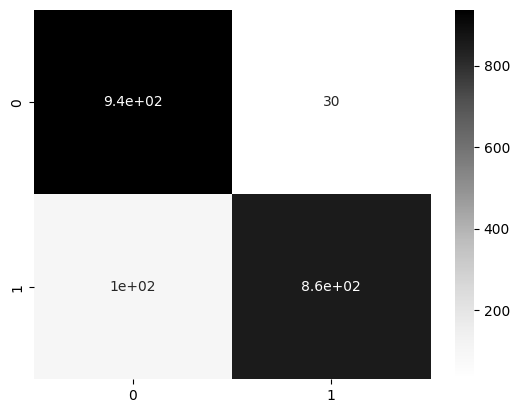

,Predicted: 0,Predicted: 1
Actual: 0,937,30
Actual: 1,101,855


In [1130]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, RocCurveDisplay


xgb=XGBClassifier()




xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)



print(classification_report(y_test, xgb_pred))

# Check the confusion matrix of the model
cm1 = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm1, annot=True,cmap='Greys')
plt.show()

# Create a DataFrame to display the confusion matrix with predicted and actual axis labels
cm_df1 = pd.DataFrame(cm1, columns=['Predicted: 0', 'Predicted: 1'], index=['Actual: 0', 'Actual: 1'])
display(cm_df1)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       967
           1       0.95      0.89      0.92       956

    accuracy                           0.92      1923
   macro avg       0.92      0.92      0.92      1923
weighted avg       0.92      0.92      0.92      1923



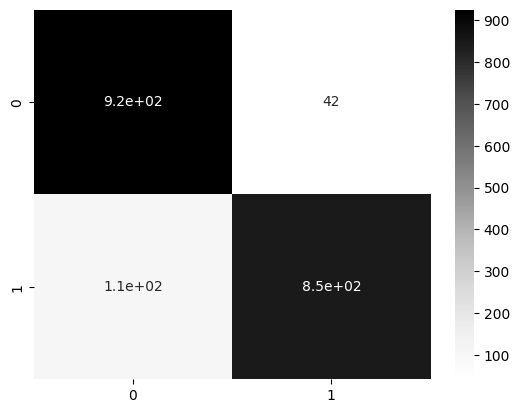

,Predicted: 0,Predicted: 1
Actual: 0,925,42
Actual: 1,108,848


In [1131]:

xgb=LGBMClassifier()




xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)



print(classification_report(y_test, xgb_pred))

# Check the confusion matrix of the model
cm1 = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm1, annot=True,cmap='Greys')
plt.show()

# Create a DataFrame to display the confusion matrix with predicted and actual axis labels
cm_df1 = pd.DataFrame(cm1, columns=['Predicted: 0', 'Predicted: 1'], index=['Actual: 0', 'Actual: 1'])
display(cm_df1)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       967
           1       0.95      0.87      0.91       956

    accuracy                           0.91      1923
   macro avg       0.92      0.91      0.91      1923
weighted avg       0.92      0.91      0.91      1923



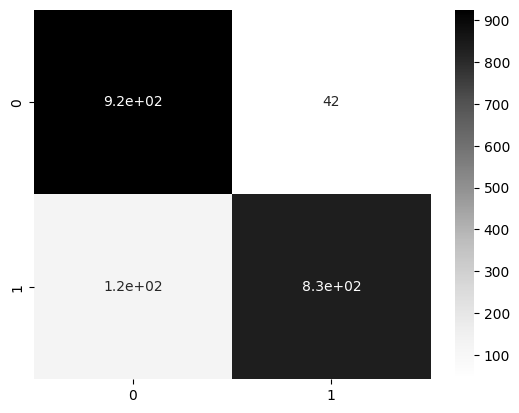

,Predicted: 0,Predicted: 1
Actual: 0,925,42
Actual: 1,123,833


In [1132]:

xgb=RandomForestClassifier()




xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)



print(classification_report(y_test, xgb_pred))

# Check the confusion matrix of the model
cm1 = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm1, annot=True,cmap='Greys')
plt.show()

# Create a DataFrame to display the confusion matrix with predicted and actual axis labels
cm_df1 = pd.DataFrame(cm1, columns=['Predicted: 0', 'Predicted: 1'], index=['Actual: 0', 'Actual: 1'])
display(cm_df1)

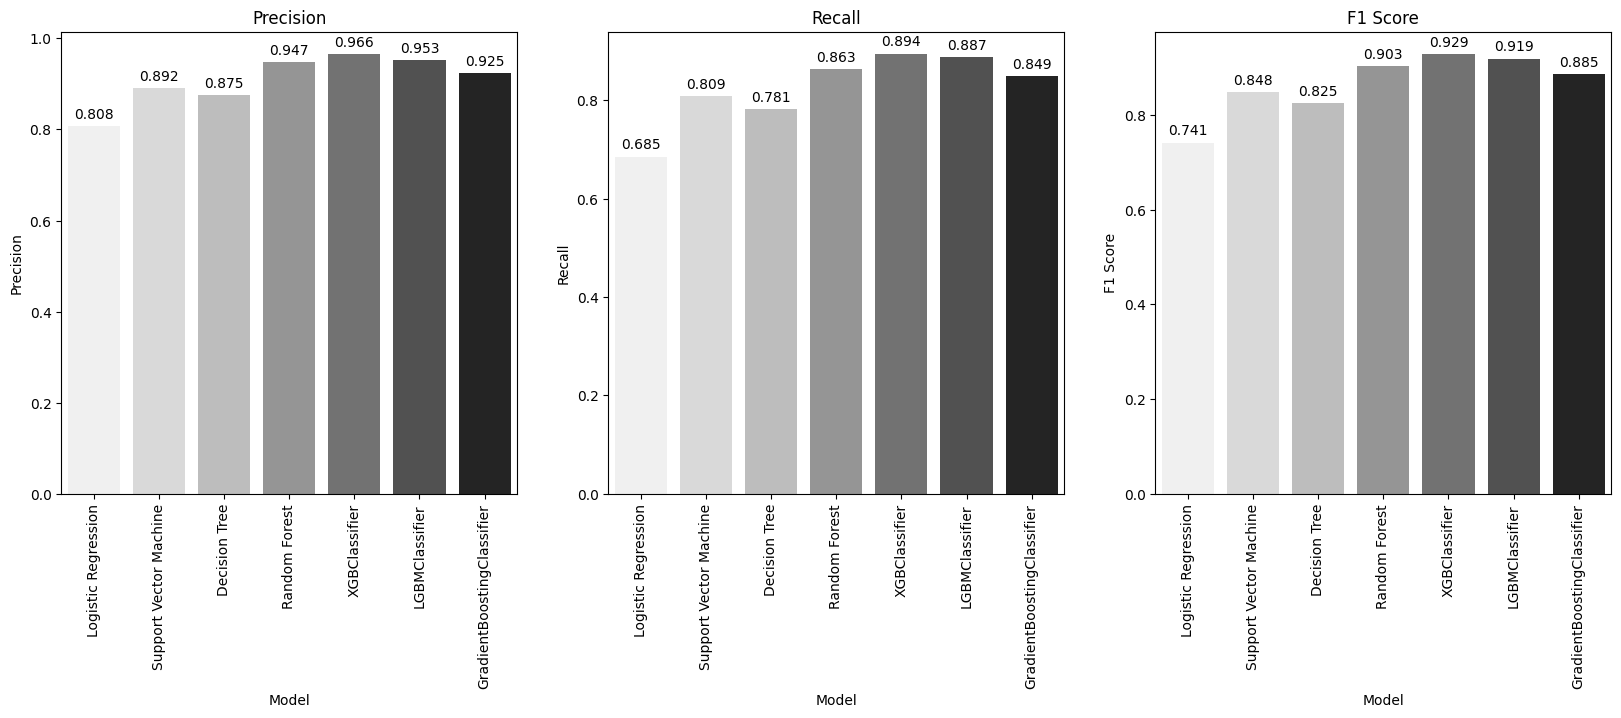

In [1133]:

fig,ax=plt.subplots(1,3,figsize=(20,6))
sns.barplot(y=all_models['Precision'],x=all_models['Model'],hue=all_models['Model'],ax=ax[0],palette='Greys')
ax[0].set_title('Precision')
ax[0].set_xticks(ax[0].get_xticks()) 
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90) 

for i, v in enumerate(all_models['Precision']):
    ax[0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')



sns.barplot(y=all_models['Recall'],x=all_models['Model'],hue=all_models['Model'],ax=ax[1],palette='Greys')
ax[1].set_xticks(ax[1].get_xticks()) 
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90) 
ax[1].set_title('Recall')

for i, v in enumerate(all_models['Recall']):
    ax[1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

sns.barplot(y=all_models['F1 Score'],x=all_models['Model'],hue=all_models['Model'],ax=ax[2],palette='Greys')
ax[2].set_xticks(ax[2].get_xticks()) 
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90) 
ax[2].set_title('F1 Score')

for i, v in enumerate(all_models['F1 Score']):
    ax[2].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.show()

# 5.모델링

- 오차행렬도 확인 시,XGBClassifier의 이탈 예측 정밀도와 재현율이 가장 우수하다 

In [1136]:
X=df2.drop(['Churn'],axis=1)
y=df2['Churn']



xgb=XGBClassifier(random_state=156)





scores=cross_val_score(xgb,X,y,scoring='accuracy',cv=3)
print('교차 검증별 정확도:',np.round(scores,4))
print('평균 검증 정확도:',np.round(np.mean(scores),4))

교차 검증별 정확도: [0.9511 0.9859 0.9014]
평균 검증 정확도: 0.9461


## 5-6.파라미터 튜닝 

In [1137]:
xgb_model = XGBClassifier()

# 후보 파라미터 선정
params = {'max_depth':[5,7,9], 'min_child_weight':[1,3,5], 'colsample_bytree':[0.5,0.75],'n_estimators':[100,200,300,400,500]}

# gridsearchcv 객체 정보 입력(어떤 모델, 파라미터 후보, 교차검증 몇 번)
gridcv = GridSearchCV(xgb_model, param_grid=params, cv=3)

# 파라미터 튜닝 
gridcv.fit(x_train, y_train)

#튜닝된 파라미터 출력
print(gridcv.best_params_)

{'colsample_bytree': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 400}


In [1138]:

gridcv.fit(x_train, y_train)
pred=gridcv.predict(x_test)


acc=accuracy_score(y_test, pred)
pre=precision_score(y_test, pred)
rec=recall_score(y_test, pred)
f1=f1_score(y_test, pred)
roc=roc_auc_score(y_test, pred)



In [1139]:
after_hipher=pd.DataFrame({'Model':'XGBClassifier','Accuarcy':acc,'Precision':pre,'Recall':rec,'F1 Score':f1,'AUC Score':roc},index=[0])
after_hipher=pd.concat([after_hipher,all_models.loc[4].to_frame().T])
after_hipher

,Model,Accuarcy,Precision,Recall,F1 Score,AUC Score
0,XGBClassifier,0.944878,0.979684,0.90795,0.942454,0.944668
4,XGBClassifier,0.931877,0.966102,0.894351,0.928843,0.931664


In [1140]:
all_models.loc[4].to_frame().T

,Model,Accuarcy,Precision,Recall,F1 Score,AUC Score
4,XGBClassifier,0.931877,0.966102,0.894351,0.928843,0.931664


In [1142]:
pd.DataFrame({'Model':'XGBClassifier','Accuarcy':acc,'Precision':pre,'Recall':rec,'F1 Score':f1,'AUC Score':roc},index=[0])

,Model,Accuarcy,Precision,Recall,F1 Score,AUC Score
0,XGBClassifier,0.944878,0.979684,0.90795,0.942454,0.944668


              precision    recall  f1-score   support

           0       0.92      0.98      0.95       967
           1       0.98      0.91      0.94       956

    accuracy                           0.94      1923
   macro avg       0.95      0.94      0.94      1923
weighted avg       0.95      0.94      0.94      1923



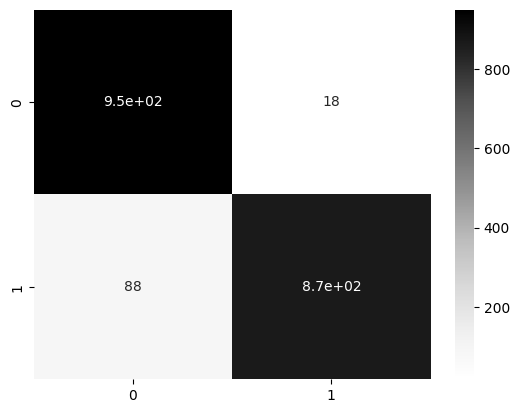

,Predicted: 0,Predicted: 1
Actual: 0,949,18
Actual: 1,88,868


In [1144]:
estimator=gridcv.best_estimator_
pred=estimator.predict(x_test)

print(classification_report(y_test, pred))

# Check the confusion matrix of the model
cm1 = confusion_matrix(y_test, pred)
sns.heatmap(cm1, annot=True,cmap='Greys')
plt.show()

# Create a DataFrame to display the confusion matrix with predicted and actual axis labels
cm_df1 = pd.DataFrame(cm1, columns=['Predicted: 0', 'Predicted: 1'], index=['Actual: 0', 'Actual: 1'])
display(cm_df1)

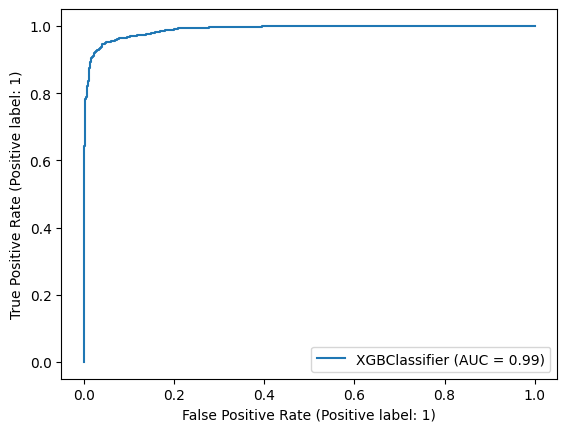

In [1145]:
RocCurveDisplay.from_estimator(estimator , x_test , y_test)


## 5-7.피처 중요도 

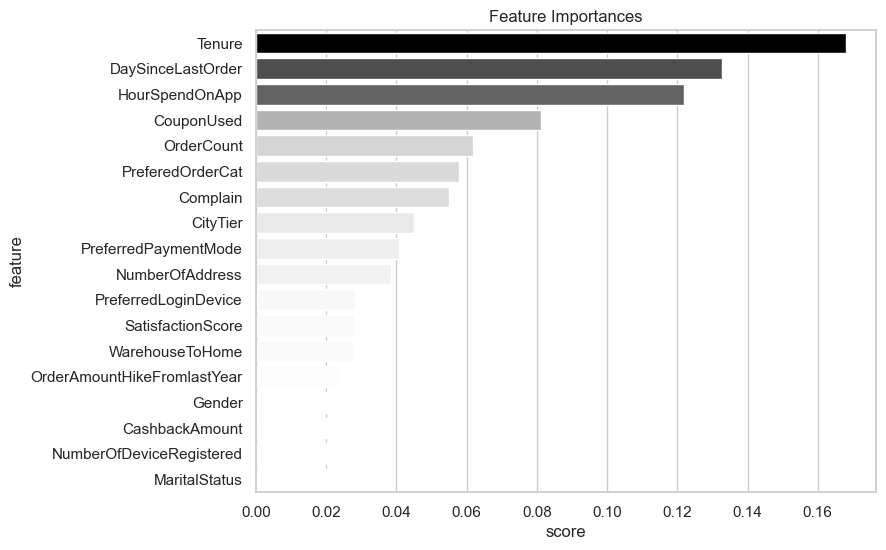

In [1413]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values =estimator.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index,palette='Greys',hue=ftr_top20,legend=False)
plt.xlabel('score')
plt.ylabel('feature')
plt.show()

## 5-8.SHAP VALUE

In [1415]:
explainer = shap.Explainer(estimator)
shap_values = explainer.shap_values(x_train)

/Users/jeongsuyeon/miniforge3/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning:

[21:46:54] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.



In [1423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   object 
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   object 
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   object 
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

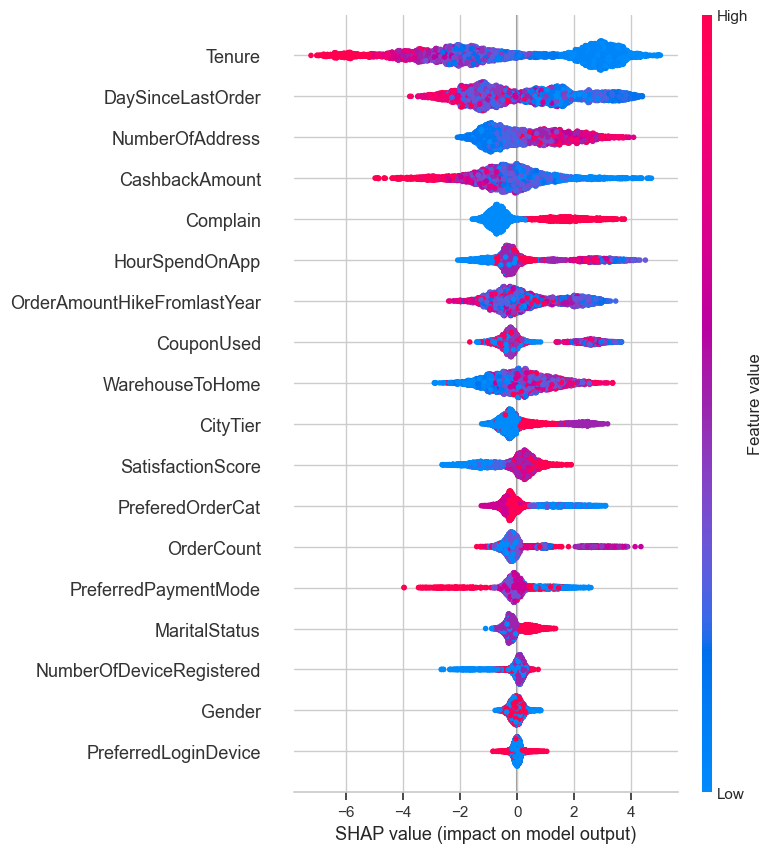

In [1416]:
shap.summary_plot(shap_values, x_train,show=True)


## 5-9.예측 결과 

In [1149]:
predic_proba=estimator.predict_proba(x_test)
predic_proba[:,1]

array([8.0188245e-01, 1.4138101e-04, 9.9530208e-01, ..., 2.9137102e-05,
       8.7961870e-01, 9.9943107e-01], dtype=float32)

In [1150]:

d={'CustomerID':id,'Predict':pred,'Predcit_proba':predic_proba[:,1]}
predict_churn=pd.DataFrame(d)
predict_churn=predict_churn.sort_values(by='Predcit_proba',ascending=False).reset_index(drop=True)

In [1151]:
predict_churn['Predcit_proba']=predict_churn['Predcit_proba']*100

In [1152]:
predict_churn

,CustomerID,Predict,Predcit_proba
0,53410,1,100.000000
1,50940,1,100.000000
2,54168,1,100.000000
3,55186,1,100.000000
4,54167,1,100.000000
...,...,...,...
1918,54443,0,0.000018
1919,55286,0,0.000015
1920,50410,0,0.000012
1921,51036,0,0.000004


# 5-10.이탈 등급 

In [1153]:
predict_churn['rank']=0
predict_churn.loc[(predict_churn['Predcit_proba']>-0.1)&(predict_churn['Predcit_proba']<=33.333),'rank']=3
predict_churn.loc[(predict_churn['Predcit_proba']>33.333)&(predict_churn['Predcit_proba']<=66.667),'rank']=2
predict_churn.loc[(predict_churn['Predcit_proba']>66.667)&(predict_churn['Predcit_proba']<=100.0),'rank']=1


In [1154]:
pd.cut(predict_churn['Predcit_proba'],3)

0       (66.667, 100.0]
1       (66.667, 100.0]
2       (66.667, 100.0]
3       (66.667, 100.0]
4       (66.667, 100.0]
             ...       
1918     (-0.1, 33.333]
1919     (-0.1, 33.333]
1920     (-0.1, 33.333]
1921     (-0.1, 33.333]
1922     (-0.1, 33.333]
Name: Predcit_proba, Length: 1923, dtype: category
Categories (3, interval[float64, right]): [(-0.1, 33.333] < (33.333, 66.667] < (66.667, 100.0]]

In [ ]:
high_risk_customer=predict_churn[predict_churn['rank']==1]['CustomerID'].to_list()


In [1350]:
df[df['CustomerID'].isin(high_risk_customer)]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile,3,6.0,Debit Card,Female,3.0,3,Laptop,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Mobile,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Mobile,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Mobile,3,15.0,Debit Card,Male,2.0,4,Laptop,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Mobile,1,12.0,Credit Card,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5549,55550,0,5.0,Web,1,8.0,Debit Card,Male,3.0,6,Laptop,5,Married,3,0,22.0,7.0,9.0,8.0,175.03
5555,55556,1,1.0,Web,3,33.0,E wallet,Male,4.0,4,Laptop,1,Married,3,1,12.0,1.0,2.0,9.0,181.17
5556,55557,1,17.0,Mobile,3,31.0,Debit Card,Male,4.0,4,Fashion,5,Single,8,1,14.0,1.0,3.0,NaN,229.48
5598,55599,1,1.0,Web,3,16.0,E wallet,Male,3.0,4,Mobile,5,Married,3,0,20.0,2.0,2.0,1.0,142.90
